In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#to display all columns
pd.options.display.max_columns=500
pd.options.display.max_rows=500
pd.options.display.float_format = '{:,.6f}'.format

%matplotlib inline

#ignoring warnings
from warnings import filterwarnings
filterwarnings('ignore')

#multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#scaling
from sklearn.preprocessing import StandardScaler

#imputer
from sklearn.impute import KNNImputer

from mlxtend.feature_selection import SequentialFeatureSelector

#sklearn
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.model_selection import cross_val_score,GridSearchCV

import statsmodels.api as sm

from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,GradientBoostingRegressor,AdaBoostRegressor,StackingRegressor

%matplotlib inline

Loading the Dataset

In [21]:
df_full=pd.read_csv("barcelona_listings.csv")
df_full.head()

id                         listing_url       scrape_id last_scraped  \
0  18666  https://www.airbnb.com/rooms/18666  20190710134514   2019-07-10   
1  18674  https://www.airbnb.com/rooms/18674  20190710134514   2019-07-10   
2  21605  https://www.airbnb.com/rooms/21605  20190710134514   2019-07-10   
3  23197  https://www.airbnb.com/rooms/23197  20190710134514   2019-07-10   
4  25786  https://www.airbnb.com/rooms/25786  20190710134514   2019-07-10   

                                              name  \
0                          Flat with Sunny Terrace   
1  Huge flat for 8 people close to Sagrada Familia   
2                        Nice and sunny duble room   
3     FORUM DELUXE 5 MINS WALK  CCIB CENTER & SEA!   
4       NICE ROOM AVAILABLE IN THE HEART OF GRACIA   

                                             summary  \
0  Apartment located near the "Plaza de las Glori...   
1  110m2 apartment to rent in Barcelona. Located ...   
2  The flat is in Poblenou district, and the room...   
3  I do not accept groups of young people under 2...   
4  JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...   

                                               space  \
0  Nice apartment situated on the penthouse floor...   
1  Apartment with 110 m2 located in the 6th floor...   
2  L'apartament està al barri de Poblenou, i l'ha...   
3  Elegant spacious apartment suitable for 6. Amp...   
4  Room available for rent.-  PEDRO PEREZ.  Share...   

                                         description experiences_offered  \
0  Apartment located near the "Plaza de las Glori...                none   
1  110m2 apartment to rent in Barcelona. Located ...                none   
2  The flat is in Poblenou district, and the room...                none   
3  I do not accept groups of young people under 2...                none   
4  JUST GO THROUGH THE MANY REVIEWS I GOT THROUGH...                none   

                               neighborhood_overview  \
0  Apartment in Barcelona near to the Plaza de la...   
1  Apartment in Barcelona located in the heart of...   
2  Poblenou as one of the few areas that has grow...   
3  Strategically located in the area of Parc del ...   
4  Solo decir que a menudo ni salgo del barrio. M...   

                                               notes  \
0                                                NaN   
1                                                NaN   
2  Tingues en compte que vivim amb gats, assegura...   
3  I do not accept groups of young people under 2...   
4  No dudes en perdir una cita para un masaje rel...   

                                             transit  \
0  Good transports connections, 50 m from the met...   
1  Good transport connection,  150 m from metro “...   
2  By metro, tram, bus, taxi, bicycle. See more i...   
3  Tram stop Line T4  Campus Diagonal- Besos just...   
4  Metro con las principales estaciones. A pie. E...   

                                              access  \
0  Free Wifi - air conditioning. We will provide ...   
1  Free Wifi - air conditioning. We will provide ...   
2  The kitchen is fully equipped and can use the ...   
3      You book the entire apartment for yourselves.   
4  All access with respect. Kitchen facilities ne...   

                                         interaction  \
0  We can provide you all kind of entrance and ti...   
1  We can provide you all kind of entrance and ti...   
2  My husband and I will be available in person o...   
3  Please do contact Tony, your check-in manager,...   
4  Available for interaction. Nonproblem feel fre...   

                                         house_rules  thumbnail_url  \
0  Cleaning fee: 40 euros (to pay at arrival) Tou...            NaN   
1  Tourist tax at arrival: 2.48 Eur/person/night ...            NaN   
2  If you open it - Close it If you turn it on - ...            NaN   
3  I do not accept groups of young people under 2...            NaN   
4  Clean Bathroom after use and quick shower At

Shape of dataframe

In [55]:
print('The main dataframe has',df_full.shape[0],'rows')
print('The main dataframe has',df_full.shape[1],'columns')

The main dataframe has 19833 rows
The main dataframe has 106 columns


In [23]:
df_full.info(max_cols=150)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19833 entries, 0 to 19832
Data columns (total 106 columns):
 #    Column                                        Non-Null Count  Dtype  
---   ------                                        --------------  -----  
 0    id                                            19833 non-null  int64  
 1    listing_url                                   19833 non-null  object 
 2    scrape_id                                     19833 non-null  int64  
 3    last_scraped                                  19833 non-null  object 
 4    name                                          19816 non-null  object 
 5    summary                                       18823 non-null  object 
 6    space                                         14599 non-null  object 
 7    description                                   19472 non-null  object 
 8    experiences_offered                           19833 non-null  object 
 9    neighborhood_overview                         13

- We have a lot of features in this dataset that we will not be using for our analysis. Hence they have been dropped

Reduced Dataset

In [56]:
df_original= pd.read_csv("barcelona_airbnb_complete.csv")
df_original.head().T

0  \
id                                                             531195   
host_id                                                       2608724   
host_name                                     Hector Antonella Alvaro   
host_since                                                 11-06-2012   
host_response_time                                     within an hour   
host_response_rate                                                90%   
host_is_superhost                                                   t   
host_neighbourhood                                        Sant Antoni   
neighbourhood_group_cleansed                                 Eixample   
is_location_exact                                                   t   
property_type                                               Apartment   
room_type                                             Entire home/apt   
accommodates                                                       12   
bathrooms                                                    2.000000   
bedrooms                                                     4.000000   
beds                                                         8.000000   
bed_type                                                     Real Bed   
price                                                         $999.00   
security_deposit                                              $100.00   
cleaning_fee                                                    $0.00   
guests_included                                                    12   
extra_people                                                    $0.00   
minimum_nights                                                      3   
maximum_nights                                                     90   
has_availability                                                    t   
availability_365                                                  234   
number_of_reviews                                                  82   
number_of_reviews_ltm                                              34   
review_scores_rating                                        97.000000   
review_scores_accuracy                                      10.000000   
review_scores_cleanliness                                   10.000000   
review_scores_checkin                                       10.000000   
review_scores_communication                                 10.000000   
review_scores_location                                      10.000000   
review_scores_value                                         10.000000   
instant_bookable                                                    t   
cancellation_policy                                   super_strict_30   
require_guest_profile_picture                                       f   
require_guest_phone_verification                                    f   
calculated_host_listings_count                                      3   
calculated_host_listings_count_entire_homes                         3   
calculated_host_listings_count_private_rooms                        0   
calculated_host_listings_count_shared_rooms                         0   

                                                                    1  \
id                                                             534550   
host_id                                                       2608724   
host_name                                     Hector Antonella Alvaro   
host_since                                                 11-06-2012   
host_response_time                                     within an hour   
host_response_rate                                                90%   
host_is_superhost                                                   t   
host_neighbourhood                                        Sant Antoni   
neighbourhood_group_cleansed                                 Eixample   
is_location_exact                                                   t   
property_type                                       

Shape of reduced dataframe

In [57]:
print('The main dataframe has',df_original.shape[0],'rows')
print('The main dataframe has',df_original.shape[1],'columns')

The main dataframe has 19833 rows
The main dataframe has 43 columns


In [58]:
df_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19833 entries, 0 to 19832
Data columns (total 43 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            19833 non-null  int64  
 1   host_id                                       19833 non-null  int64  
 2   host_name                                     19799 non-null  object 
 3   host_since                                    19799 non-null  object 
 4   host_response_time                            17315 non-null  object 
 5   host_response_rate                            17315 non-null  object 
 6   host_is_superhost                             19799 non-null  object 
 7   host_neighbourhood                            15953 non-null  object 
 8   neighbourhood_group_cleansed                  19833 non-null  object 
 9   is_location_exact                             19833 non-null 

Creating a copy Dataframe for analysis

In [59]:
df=df_original.copy()
df.head(5)

id  host_id                host_name  host_since host_response_time  \
0  531195  2608724  Hector Antonella Alvaro  11-06-2012     within an hour   
1  534550  2608724  Hector Antonella Alvaro  11-06-2012     within an hour   
2  721378  3724467                EasySleep  01-10-2012     within an hour   
3  721470  3724467                EasySleep  01-10-2012     within an hour   
4  721473  3724467                EasySleep  01-10-2012     within an hour   

  host_response_rate host_is_superhost host_neighbourhood  \
0                90%                 t        Sant Antoni   
1                90%                 t        Sant Antoni   
2                90%                 f            El Born   
3                90%                 f            El Born   
4                90%                 f            El Born   

  neighbourhood_group_cleansed is_location_exact property_type  \
0                     Eixample                 t     Apartment   
1                     Eixample                 t     Apartment   
2                     Eixample                 t     Apartment   
3                     Eixample                 t     Apartment   
4                     Eixample                 t   Condominium   

         room_type  accommodates  bathrooms  bedrooms     beds  bed_type  \
0  Entire home/apt            12   2.000000  4.000000 8.000000  Real Bed   
1  Entire home/apt            10   2.000000  3.000000 7.000000  Real Bed   
2  Entire home/apt             6   2.000000  4.000000 5.000000  Real Bed   
3  Entire home/apt             2   1.000000  1.000000 1.000000  Real Bed   
4  Entire home/apt             4   1.000000  2.000000 3.000000  Real Bed   

     price security_deposit cleaning_fee  guests_included extra_people  \
0  $999.00          $100.00        $0.00               12        $0.00   
1  $999.00          $100.00        $0.00                7        $0.00   
2  $999.00          $300.00        $0.00                2       $30.00   
3  $999.00          $300.00        $0.00                1       $30.00   
4  $999.00          $300.00        $0.00                1       $30.00   

   minimum_nights  maximum_nights has_availability  availability_365  \
0               3              90                t               234   
1               3              90                t               213   
2               3             365                t                 6   
3               3             365                t               169   
4               3             365                t                 8   

   number_of_reviews  number_of_reviews_ltm  review_scores_rating  \
0                 82                     34             97.000000   
1                 26                      9             99.000000   
2                  3                      2             93.000000   
3                 11                      8             93.000000   
4                  3                      0             87.000000   

   review_scores_accuracy  review_scores_cleanliness  review_scores_checkin  \
0               10.000000                  10.000000              10.000000   
1               10.000000                  10.000000              10.000000   
2               10.000000                   9.000000              10.000000   
3                9.000000                  10.000000              10.000000   
4                9.000000                   9.000000               7.000000   

   review_scores_communication  review_scores_location  review_scores_value  \
0                    10.000000               10.000000            10.000000   
1                    10.000000               10.000000            10.000000   
2                     8.000000                9.000000             9.000000   
3                    10.000000               10.000000             9.000000   
4                     7.000000                9.000000             8.000000   

  instant_bookable          cancellation_policy require_guest_profile_pict

Calculating five point summary

In [60]:
df.describe().T

count              mean  \
id                                           19,833.000000 20,958,770.420410   
host_id                                      19,833.000000 86,459,884.290980   
accommodates                                 19,833.000000          3.347502   
bathrooms                                    19,824.000000          1.317847   
bedrooms                                     19,830.000000          1.567574   
beds                                         19,799.000000          2.257690   
guests_included                              19,833.000000          1.863057   
minimum_nights                               19,833.000000          8.521303   
maximum_nights                               19,833.000000    217,270.087531   
availability_365                             19,833.000000        170.540009   
number_of_reviews                            19,833.000000         32.817980   
number_of_reviews_ltm                        19,833.000000         12.400847   
review_scores_rating                         14,986.000000         91.096890   
review_scores_accuracy                       14,978.000000          9.400788   
review_scores_cleanliness                    14,978.000000          9.256710   
review_scores_checkin                        14,973.000000          9.570627   
review_scores_communication                  14,982.000000          9.569216   
review_scores_location                       14,975.000000          9.589583   
review_scores_value                          14,976.000000          9.040198   
calculated_host_listings_count               19,833.000000         15.414057   
calculated_host_listings_count_entire_homes  19,833.000000         13.233147   
calculated_host_listings_count_private_rooms 19,833.000000          2.116069   
calculated_host_listings_count_shared_rooms  19,833.000000          0.064841   

                                                           std           min  \
id                                           11,409,686.368005 18,666.000000   
host_id                                      89,236,423.058074  3,073.000000   
accommodates                                          2.196285      1.000000   
bathrooms                                             0.643449      0.000000   
bedrooms                                              1.014817      0.000000   
beds                                                  1.881520      0.000000   
guests_included                                       1.569039      1.000000   
minimum_nights                                       17.964452      1.000000   
maximum_nights                               21,564,508.597675      1.000000   
availability_365                                    126.602977      0.000000   
number_of_reviews                                    58.318390      0.000000   
number_of_reviews_ltm                                17.901569      0.000000   
review_scores_rating                                  9.619533     20.000000   
review_scores_accuracy                                0.965765      2.000000   
review_scores_cleanliness                             1.040733      2.000000   
review_scores_checkin                                 0.895359      2.000000   
review_scores_communication                           0.886817      2.000000   
review_scores_location                                0.765803      2.000000   
review_scores_value                                   1.034749      2.000000   
calculated_host_listings_count                       32.776468      1.000000   
calculated_host_listings_count_entire_homes          32.370247      0.000000   
calculated_host_listings_count_private_rooms          8.069649      0.000000   
calculated_host_listings_count_shared_rooms           0.675771      0.000000   

                                                           25%  \
id                                           11,766,835.000000   
host_id                                       7,602,270.000000   
accommodates 

### BASIC PREPROCESSING

In [61]:
#dropping has_availability column since all values are same
df.drop('has_availability',axis=1,inplace=True)

#dropping host_neighbourhood
df.drop('host_neighbourhood',axis=1,inplace=True)

#converting cleaning fee to float
df['cleaning_fee']=df['cleaning_fee'].str.replace('$','')
df['cleaning_fee']=df['cleaning_fee'].str.replace(',','')
df['cleaning_fee']=df['cleaning_fee'].astype('float64')

#converting extra people to float
df['extra_people']=df['extra_people'].str.replace('$','')
df['extra_people']=df['extra_people'].str.replace(',','')
df['extra_people']=df['extra_people'].astype('flo at64')

#converting security deposit to float
df['security_deposit']=df['security_deposit'].str.replace('$','')
df['security_deposit']=df['security_deposit'].str.replace(',','')
df['security_deposit']=df['security_deposit'].astype('float64')

#converting price to float
df['price']=df['price'].str.replace('$','')
df['price']=df['price'].str.replace(',','')
df['price']=df['price'].astype('float64')

#converting host_repsonse rate to float
df['host_response_rate']=df['host_response_rate'].str.replace('%','')
df['host_response_rate']=df['host_response_rate'].astype('float')


In [62]:
# converting host since date from datetime to year format

df['host_since']=pd.to_datetime(df['host_since'],format='%d-%m-%Y')

- Has_availability feature has the value as true for all records so we have dropped it.

- Host_neighbourhood has been dropped since there is already another cleansed column for the same.

- Price,cleaning fee,security deposit,extra people and host_repsonse rate have special characters in them. They have been removed and converted to float format

- Host_since was in object format.We have converted it to a datetime format.

Seperating Numeric,Categorical and Datetime variables

In [63]:
df_num=df.select_dtypes(exclude=['object','datetime'])
df_cat=df.select_dtypes(include='object')
df_date=df.select_dtypes(include='datetime')

In [64]:
df_num.shape,df_cat.shape,df_date.shape

((19833, 28), (19833, 12), (19833, 1))

- We have 28 Numerical features, 12 categorical features and 1 datetime feature

### Basic Introduction

In [33]:
df['host_id'].nunique()

9743

In [34]:
len(df)

19833

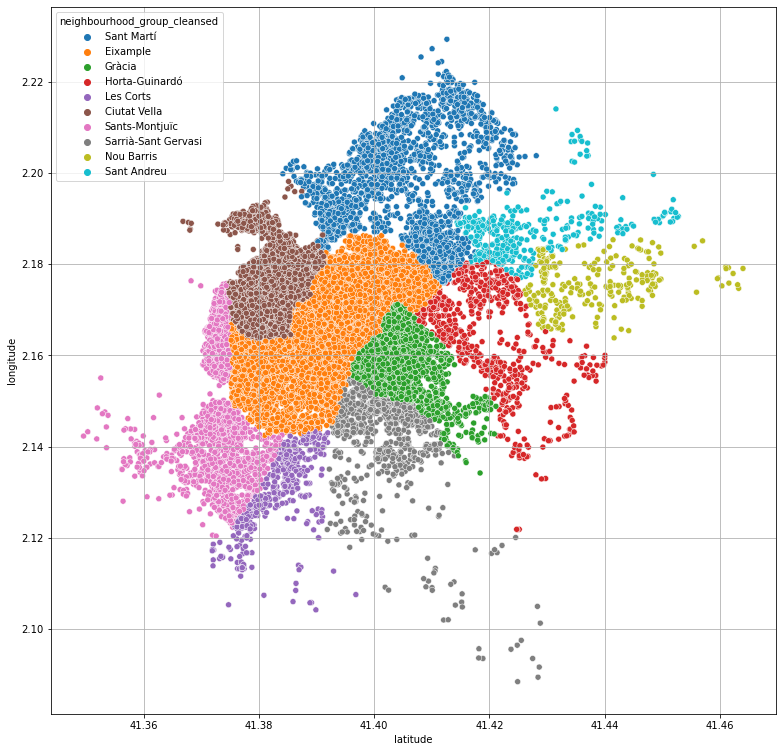

In [35]:
plt.figure(figsize=(13,13))
sns.scatterplot(df_full['latitude'],df_full['longitude'],hue=df_full['neighbourhood_group_cleansed'])
plt.grid()
plt.show()

In [20]:
# Split up of listings wrt to Neighbourhoods

neighbourhoods=pd.DataFrame(df['neighbourhood_group_cleansed'].value_counts(normalize=True)*100)
neighbourhoods=pd.DataFrame({'neighbourhood_name':list(neighbourhoods.index),'Number_of_properties':df['neighbourhood_group_cleansed'].value_counts(),'Number_of_properties(%)':neighbourhoods['neighbourhood_group_cleansed']}).drop('neighbourhood_name',axis=1)
neighbourhoods

Number_of_properties  Number_of_properties(%)
Eixample                             6622                33.388796
Ciutat Vella                         4559                22.986941
Sants-Montjuïc                       2302                11.606918
Sant Martí                           2195                11.067413
Gràcia                               1710                 8.621994
Sarrià-Sant Gervasi                   778                 3.922755
Horta-Guinardó                        645                 3.252155
Les Corts                             434                 2.188272
Sant Andreu                           345                 1.739525
Nou Barris                            243                 1.225231

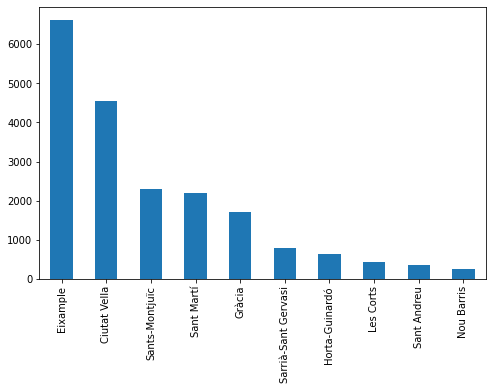

In [21]:
# Visualizing

plt.figure(figsize=(8,5))
neighbourhoods.Number_of_properties.plot(kind='bar')
plt.show()

In [22]:
roomtypes=pd.DataFrame({'number_of_rooms':df.room_type.value_counts().values,'number_of_rooms(%)':df.room_type.value_counts(normalize=True)*100})
roomtypes

number_of_rooms  number_of_rooms(%)
Private room               10147           51.162204
Entire home/apt             9475           47.773912
Shared room                  211            1.063883

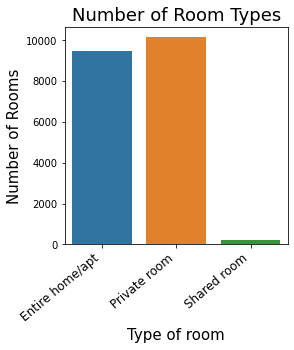

In [23]:
#Show the number of room types 
plt.figure(figsize = (4, 4))
ax = sns.countplot(x='room_type', data=df)
plt.title('Number of Room Types', fontsize=18)

#set the axes
ax.set_xlabel('Type of room', weight='normal', size=15)
ax.set_ylabel('Number of Rooms', weight='normal', size=15)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", size =12)

plt.show()

In [24]:
#percentage breakup of property type

properties=pd.DataFrame({'number_of_rooms':df['property_type'].value_counts().values,'number_of_rooms(%)':df['property_type'].value_counts(normalize=True)*100})
properties

number_of_rooms  number_of_rooms(%)
Apartment                         16843           84.924116
Serviced apartment                  688            3.468966
Loft                                466            2.349619
House                               380            1.915999
Condominium                         361            1.820199
Bed and breakfast                   221            1.114304
Hostel                              182            0.917662
Guest suite                         168            0.847073
Boutique hotel                      123            0.620178
Other                                69            0.347905
Hotel                                52            0.262189
Boat                                 52            0.262189
Aparthotel                           44            0.221852
Casa particular (Cuba)               39            0.196642
Guesthouse                           36            0.181516
Townhouse                            36            0.181516
Villa                                24            0.121010
Nature lodge                          8            0.040337
Tiny house                            8            0.040337
Camper/RV                             7            0.035295
Barn                                  7            0.035295
Dome house                            6            0.030253
Chalet                                5            0.025211
Earth house                           3            0.015126
Farm stay                             2            0.010084
Dorm                                  1            0.005042
Cottage                               1            0.005042
Cabin                                 1            0.005042

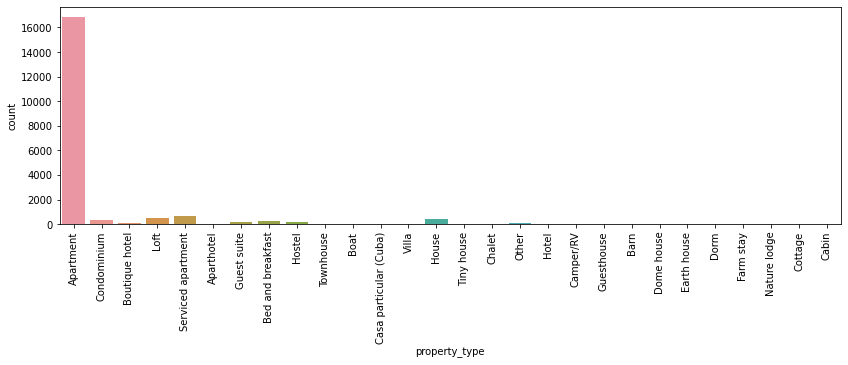

In [25]:
# Breakup of property type

plt.figure(figsize=(14,4))
sns.countplot(df['property_type'])
plt.tick_params(axis='x',labelrotation=90)
plt.show()

<AxesSubplot:xlabel='host_response_time', ylabel='count'>

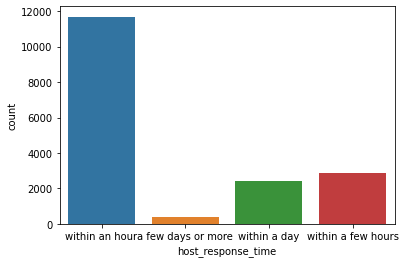

In [26]:
# Hosts response to guests

sns.countplot(df['host_response_time'])

- The city of Barcelona in Spain is split up into 6 districts using their respective latitudes and longitudes with the help of neighborhoods as defined by open or public digital shapefiles.


- The highly dense locations in Barcelona are Eixample(33%),Ciutat Vella(23%),Sants-Montjuïc(11%) and Gracia(8%) which collectively make up 87.67% of the total property inventory.


- The people/organizations running the properties under AirBnb are called hosts.


- There are totally 9743 hosts in Barcelona collectively operating 19833 properties in the city. 


- The options of room types for guests are Entire home/Apartment (51%) where the guests can get the entire places to themselves, Private room (47%) where the guests have a private room but share common places with other guests and shared room (1%) where the guests share all rooms with other guests. We can observe that the number of shared rooms is very less in comparison with the other room_types.


- We can observe that in 8 out of the 10 neighbourhoods,the number of private room properties exceed the number of entire_apartment type properties. This shows us that there is a high demand for lower priced properties where you get a private room but share common spaces like kitchen with other guests.


- There are totally 28 property types and the top 5 property types are Apartment(85%),Serviced apartment(3.5%), Loft(2.35%), House(1.91 %) and condominium (1.82%). There seems to be a lack of speciality accomodation like Cottages,Cabins,Farm stays,Nature Lodges,Guesthouses and Villas for which there are only 72 accomodation options in the city of Barcelona.

### HOST LOYALTY PROGRAM

### Top hosts with the Highest Number of Inventory

In [41]:
#getting the top hosts with their ID
top_inventory=pd.DataFrame(df.groupby('host_id').count()['id'].sort_values(ascending=False).iloc[0:50])
top_inventory=pd.DataFrame({'host_id':list(top_inventory.index),'Number_of_properties':top_inventory['id']}).drop('host_id',axis=1)
top_inventory['Number_of_properties(%)']=top_inventory['Number_of_properties']/len(df)*100

In [270]:
#getting names of top hosts
host_names=df[df['host_id'].isin(top_inventory.index)][['host_id','host_name']].drop_duplicates()

In [43]:
#Displaying details of top hosts

pd.merge(top_inventory,host_names,on='host_id')

host_id  Number_of_properties  Number_of_properties(%)  \
0     4459553                   193                 0.973126   
1   102947901                   148                 0.746231   
2   170716140                   130                 0.655473   
3   158023606                   129                 0.650431   
4   193618270                   120                 0.605052   
5   171236207                   114                 0.574800   
6      396363                    97                 0.489084   
7     1391607                    95                 0.479000   
8    36607755                    91                 0.458831   
9      299462                    84                 0.423537   
10    1447144                    80                 0.403368   
11    1503151                    79                 0.398326   
12   32037490                    76                 0.383200   
13      10704                    71                 0.357989   
14  157250994                    58                 0.292442   
15    5878688                    54                 0.272273   
16   10547296                    54                 0.272273   
17    6099660                    49                 0.247063   
18  128959838                    47                 0.236979   
19   47171261                    47                 0.236979   
20    2439400                    47                 0.236979   
21    7843388                    46                 0.231937   
22   43565515                    43                 0.216810   
23    8130906                    43                 0.216810   
24   10380563                    42                 0.211768   
25    2320210                    42                 0.211768   
26    3376710                    41                 0.206726   
27     136853                    41                 0.206726   
28    5614931                    40                 0.201684   
29   21873399                    39                 0.196642   
30    3911721                    39                 0.196642   
31    1432835                    38                 0.191600   
32  170513081                    37                 0.186558   
33  157746231                    36                 0.181516   
34  134698146                    36                 0.181516   
35   86551441                    35                 0.176474   
36  139063900                    35                 0.176474   
37  163379623                    34                 0.171431   
38    3744544                    33                 0.166389   
39    3039107                    31                 0.156305   
40    5264883                    31                 0.156305   
41      71615                    31                 0.156305   
42    9784103                    31                 0.156305   
43    9478280                    31                 0.156305   
44   26828317                    29                 0.146221   
45    1275637                    28                 0.141179   
46    3775349                    28                 0.141179   
47    2819397                    28                 0.141179   
48   63048416                    28                 0.141179   
49   10693680                    28                 0.141179   

                          host_name  
0                               Eva  
1                           Claudia  
2                      Robbie & Kay  
3          Sito, Habitat Apartments  
4                              Alba  
5               Apartment Barcelona  
6                   Oscar And Diego  
7                             Aline  
8                              Igor  
9                      Stay U-Nique  
10              Acomodis Apartments  
11                             Laia  
12                         SweetInn  
13                        Weflating  
14                Apartment Barcino  
15                            Yaiza  
16                    María & Oscar  
17                Barcelona Bedroom  
18                 

In [44]:
sum(top_inventory['Number_of_properties'])

2887

In [45]:
sum(top_inventory['Number_of_properties']/len(df)*100)

14.556547168859971

SUMMARY

- The top 50 hosts with respect to amount of inventory owned can be seen above

- Collectively they run 2887 or 14.55% of the total AirBnb properties in Barcelona

- They can be classified as important hosts in the city of Barcelona

- They can be consulted for feedback on any existing or future policies of Airbnb

In [56]:
#Dataframe of top 50 hosts
top_50_df=df[df['host_id'].isin(top_inventory.index)]
top_50_df.head()

id   host_id      host_name host_response_time host_response_rate  \
30     852195   3039107         Manuel     within an hour               100%   
51    3732820   1432835          Angel     within an hour               100%   
94   18080572  10380563       Tendency     within an hour               100%   
108  25154594  10547296  María & Oscar     within an hour                96%   
125  29819343   3039107         Manuel     within an hour               100%   

    host_is_superhost               host_neighbourhood  \
30                  f           Sant Gervasi - Galvany   
51                  f  L'Antiga Esquerra de l'Eixample   
94                  f              Dreta de l'Eixample   
108                 f              Dreta de l'Eixample   
125                 f           Sant Gervasi - Galvany   

    neighbourhood_group_cleansed is_location_exact property_type  \
30                      Eixample                 t     Apartment   
51                      Eixample                 t     Apartment   
94                      Eixample                 t     Apartment   
108                     Eixample                 t     Apartment   
125                     Eixample                 t     Apartment   

           room_type  accommodates  bathrooms  bedrooms     beds  bed_type  \
30   Entire home/apt             9   2.500000  5.000000 6.000000  Real Bed   
51   Entire home/apt             6   1.000000  2.000000 2.000000  Real Bed   
94   Entire home/apt             6   2.000000  3.000000 5.000000  Real Bed   
108  Entire home/apt             5   2.000000  4.000000 5.000000  Real Bed   
125  Entire home/apt             9   2.500000  5.000000 6.000000  Real Bed   

        price  security_deposit  cleaning_fee  guests_included  extra_people  \
30  99.000000        300.000000     75.000000                6     25.000000   
51  99.000000        175.000000     65.000000                4     10.000000   
94  99.000000        200.000000    100.000000                6      0.000000   
108 99.000000        800.000000     85.000000                1      0.000000   
125 99.000000        200.000000     75.000000                5     10.000000   

     minimum_nights  maximum_nights  availability_365  number_of_reviews  \
30                2            1122               122                159   
51                3            1125                89                170   
94                3             150                61                 44   
108              32              46                52                  0   
125               3              59               205                  3   

     number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
30                      30             91.000000                9.000000   
51                      46             89.000000               10.000000   
94                      28             82.000000                9.000000   
108                      0                   NaN                     NaN   
125                      3             93.000000                9.000000   

     review_scores_cleanliness  review_scores_checkin  \
30                    9.000000              10.000000   
51                    9.000000               9.000000   
94                    9.000000               9.000000   
108                        NaN                    NaN   
125                   9.000000               9.000000   

     review_scores_communication  review_scores_location  review_scores_value  \
30                     10.000000               10.000000             9.000000   
51                     10.000000               10.000000             9.000000   
94                      9.000000               10.000000             8.000000   
108                          NaN                     NaN                  NaN   
125                     9.000000                9.000000             9.000000   

    instant_bookable          cancellation_policy  \
30                 t     

In [62]:
top_50_df.describe().T.round()

count              mean  \
id                                           2,887.000000 20,505,233.000000   
host_id                                      2,887.000000 57,223,617.000000   
accommodates                                 2,887.000000          5.000000   
bathrooms                                    2,886.000000          2.000000   
bedrooms                                     2,887.000000          2.000000   
beds                                         2,883.000000          3.000000   
price                                        2,887.000000        216.000000   
security_deposit                             2,838.000000        355.000000   
cleaning_fee                                 2,800.000000         76.000000   
guests_included                              2,887.000000          3.000000   
extra_people                                 2,887.000000          7.000000   
minimum_nights                               2,887.000000         12.000000   
maximum_nights                               2,887.000000        647.000000   
availability_365                             2,887.000000        222.000000   
number_of_reviews                            2,887.000000         17.000000   
number_of_reviews_ltm                        2,887.000000          9.000000   
review_scores_rating                         2,006.000000         87.000000   
review_scores_accuracy                       2,004.000000          9.000000   
review_scores_cleanliness                    2,003.000000          9.000000   
review_scores_checkin                        2,003.000000          9.000000   
review_scores_communication                  2,005.000000          9.000000   
review_scores_location                       2,002.000000          9.000000   
review_scores_value                          2,003.000000          9.000000   
calculated_host_listings_count               2,887.000000         81.000000   
calculated_host_listings_count_entire_homes  2,887.000000         75.000000   
calculated_host_listings_count_private_rooms 2,887.000000          6.000000   
calculated_host_listings_count_shared_rooms  2,887.000000          0.000000   
host_since_year                              2,887.000000      2,014.000000   

                                                           std           min  \
id                                            9,923,102.000000 18,666.000000   
host_id                                      70,216,131.000000 10,704.000000   
accommodates                                          2.000000      1.000000   
bathrooms                                             1.000000      1.000000   
bedrooms                                              1.000000      0.000000   
beds                                                  2.000000      0.000000   
price                                               583.000000      9.000000   
security_deposit                                    474.000000      0.000000   
cleaning_fee                                         59.000000      0.000000   
guests_included                                       2.000000      1.000000   
extra_people                                         10.000000      0.000000   
minimum_nights                                       18.000000      1.000000   
maximum_nights                                      477.000000      5.000000   
availability_365                                    110.000000      0.000000   
number_of_reviews                                    28.000000      0.000000   
number_of_reviews_ltm                                12.000000      0.000000   
review_scores_rating                                 11.000000     20.000000   
review_scores_accuracy                                1.000000      2.000000   
review_scores_cleanliness                             1.000000      2.000000   
review_scores_checkin                                 1.000000      2.000000   
review_scores_communication                           1.000000      2.000000   


In [70]:
#avaialbility of lisitngs for the top 50 hosts
df_full[df_full['host_id'].isin(top_inventory.index)][['availability_30','availability_60','availability_90','availability_365','calendar_last_scraped']].describe()

availability_30  availability_60  availability_90  availability_365
count     2,887.000000     2,887.000000     2,887.000000      2,887.000000
mean          8.730516        23.989262        41.480776        221.874264
std           8.673334        17.579506        26.160724        109.931897
min           0.000000         0.000000         0.000000          0.000000
25%           2.000000         9.000000        20.000000        133.000000
50%           6.000000        21.000000        40.000000        257.000000
75%          13.000000        37.000000        62.000000        316.000000
max          30.000000        60.000000        90.000000        365.000000

SOME IMPORTANT OBSERVATIONS FOR TOP 50 hosts by Inventory


- Accomodates is the maximum capacity of a listing and we have the average number for top 50 hosts with highest inventory is 5.

- On average there are 2 bedrooms and 2 bathrooms per listing.

- The median per night price for a listing is 105 dollars.

- The median security deposit charged is 250 dollars.

- The median cleaning fee charged is 70 dollars.

- depending on the property,anywhere from 1 to 16 guests might be allowed and the charge for an extra person might vary from 0 to 110 dollars

- The minimum number of nights to be booked varies from 1 night to 192 nights with the median being 3 nights. 

- The maximum number of nights that can be booked varies from 5 to 1125 nights with median being 365 nights.

- Availability 30 is the number of nights the listing is available for the next 30 days and the mid 50 percentile of properties are available from 2 to 13 days

- Availability 60 is the number of nights the listing is available for the next 30 days and the mid 50 percentile of properties are available from 9 to 37 days

- Availability 90 is the number of nights the listing is available for the next 90 days and the mid 50 percentile of properties are available from 20 to 62 days

- Availability 365 is the number of nights the listing is available for the next 365 days and the mid 50 percentile of properties are available from 133 to 316 days

- The number of reviews the mid 50 percentile of properties have gotten so far range from 0 to 23

- The review scores rating is a scale from 0 to 100 for rating the properties and the mid 50 percentile of properties have ratings ranging from 82 to 94

- The most common type of room_type listed by the top 50 hosts is Entire Home/apartment.

### Top 50 Hosts by Property ratings

In [232]:
df['number_of_reviews_scaled']=(df['number_of_reviews']-df['number_of_reviews'].min())/(df['number_of_reviews'].max()-df['number_of_reviews'].min())
df['review_scores_rating_scaled']=(df['review_scores_rating']-df['review_scores_rating'].min())/(df['review_scores_rating'].max()-df['review_scores_rating'].min())

In [233]:
df['ratings_score']=(df['number_of_reviews_scaled'] * df['review_scores_rating_scaled'])

In [280]:
top_rated_properties=df.sort_values(by='ratings_score',ascending=False)
top_rated_properties_50=top_rated_properties.groupby('host_id')['ratings_score'].sum().sort_values(ascending=False).iloc[0:50]                                                                                                    

#### The Top 50 Properties

In [317]:
top_rated_properties.iloc[0:50,:]

id   host_id        host_name  host_response_time  \
1072    988917   5428204            David      within an hour   
7262   1098571   5223863         Mercedes      within an hour   
3767    959880   5223863         Mercedes      within an hour   
17630  3763410  13772145            Magda      within an hour   
17890   297066   1541784              Aga      within an hour   
17573  1060614   5472538          Lobsang      within an hour   
3766    959840   5223863         Mercedes      within an hour   
659    2131287   5756325  Jacques & Aline      within an hour   
14330   674461   3424464            Ramon      within an hour   
18448  1036032   2426746     Joel Giraldo      within an hour   
10463  1064989   5157936    Ricardo Rubén      within an hour   
2225    866315   4427588            David      within an hour   
12996  4795262  24711930         Cristina      within an hour   
10469  1670235   5157936    Ricardo Rubén      within an hour   
12590   950784   5157936    Ricardo Rubén      within an hour   
3449    590503   6057270             Alex      within an hour   
12786  5066661  24711930         Cristina      within an hour   
14004   763176   3424464            Ramon      within an hour   
1077   2469678   8164313            Jordi      within an hour   
13170  1181739   3424464            Ramon      within an hour   
19256  1670427   8843962           Eduard      within an hour   
7263   1193941   6524683             Flor      within an hour   
323    4028518  20886062             Mari      within an hour   
7465   1851161   6524683             Flor      within an hour   
252    1342549   7281684           Arturo  within a few hours   
18150  3144104   6944520             Flor      within an hour   
7457    270050   1414100           Xavier  within a few hours   
17614  1482060   6166581             Koni      within an hour   
19275  2536314   8843962           Eduard      within an hour   
42     1867951   9737137            Marta      within an hour   
2466   1530586   8164313            Jordi      within an hour   
3770   1224736   6680972           Esther      within an hour   
5831   2987956  14458726           Montse      within an hour   
10513  6289283  32695481         Mercedes      within an hour   
8897   2240875   6988795         Federico      within an hour   
2978    563971   2773231    Arama & Jordi  within a few hours   
7598    744153   3899934            Lluís      within an hour   
652    1910850   9915110            María      within an hour   
15327   490853   2426746     Joel Giraldo      within an hour   
7814   1478299   7906740          Angeles      within an hour   
4418    906559   1820272             Rosa      within an hour   
18706   330957    893805   Phil And Fiona  within a few hours   
5225   2929363  14458726           Montse      within an hour   
15227   519631   1009636          Charles        within a day   
7458    380421   1414100           Xavier  within a few hours   
19261  1891083   7263547             Marc      within an hour   
6318   1304470   7091581         Fabrizio      within an hour   
7813   1477381   7906740          Angeles      within an hour   
7267   1677706   8876390    Enric & Packo      within an hour   
2986   1260018   6862183           Mireya      within an hour   

       host_response_rate host_is_superhost               host_neighbourhood  \
1072           100.000000                 t   La Nova Esquerra de l'Eixample   
7262           100.000000                 f                         El Gòtic   
3767           100.000000                 f                         El Gòtic   
17630          100.000000                 t              Dreta de l'Eixample   
17890          100.000000                 f                     El Poble-sec   
17573          100.000000                 t                    el Fort Pienc   
3766           100.000000                 f                         El Gòtic   
659            100.000000                 t             

In [316]:
# Split up of properties by host_is_superhost

top_rated_properties.iloc[0:50,:]['host_is_superhost'].value_counts(normalize=True)*100

t   76.000000
f   24.000000
Name: host_is_superhost, dtype: float64

In [318]:
# split up of top 50 properties by host_response_time

top_rated_properties.iloc[0:50,:]['host_response_time'].value_counts(normalize=True)*100

within an hour       88.000000
within a few hours   10.000000
within a day          2.000000
Name: host_response_time, dtype: float64

In [321]:
# Split up of top 50 properties by neighbourhood wise

top_rated_properties.iloc[0:50,:]['neighbourhood_group_cleansed'].value_counts(normalize=True)*100

Eixample         50.000000
Ciutat Vella     32.000000
Sants-Montjuïc   16.000000
Gràcia            2.000000
Name: neighbourhood_group_cleansed, dtype: float64

In [322]:
# Split up of top 50 properties by property_type wise

top_rated_properties.iloc[0:50,:]['property_type'].value_counts(normalize=True)*100

Apartment           76.000000
Loft                16.000000
Bed and breakfast    6.000000
Guest suite          2.000000
Name: property_type, dtype: float64

In [323]:
# Split up of top 50 properties by room_type wise

top_rated_properties.iloc[0:50,:]['room_type'].value_counts(normalize=True)*100

Entire home/apt   54.000000
Private room      46.000000
Name: room_type, dtype: float64

In [324]:
#type of bed
top_rated_properties.iloc[0:50,:]['bed_type'].value_counts(normalize=True)*100

Real Bed   98.000000
Futon       2.000000
Name: bed_type, dtype: float64

In [325]:
#whether instant_bookable
top_rated_properties.iloc[0:50,:]['instant_bookable'].value_counts(normalize=True)*100

t   64.000000
f   36.000000
Name: instant_bookable, dtype: float64

In [326]:
#Cancellation policy
top_rated_properties.iloc[0:50,:]['cancellation_policy'].value_counts(normalize=True)*100

strict_14_with_grace_period   60.000000
moderate                      36.000000
flexible                       4.000000
Name: cancellation_policy, dtype: float64

In [327]:
# whether require_guest_profile_picture
top_rated_properties.iloc[0:50,:]['require_guest_profile_picture'].value_counts(normalize=True)*100

f   94.000000
t    6.000000
Name: require_guest_profile_picture, dtype: float64

In [328]:
# whether require_guest_phone_verification
top_rated_properties.iloc[0:50,:]['require_guest_phone_verification'].value_counts(normalize=True)*100

f   92.000000
t    8.000000
Name: require_guest_phone_verification, dtype: float64

In [329]:
# Mean host response rate

top_rated_properties.iloc[0:50,:]['host_response_rate'].mean()

98.98

In [331]:
# Mean review_scores_rating
top_rated_properties.iloc[0:50,:]['review_scores_rating'].mean()

94.98

In [332]:
# mean number_of_reviews
top_rated_properties.iloc[0:50,:]['number_of_reviews'].mean()

437.56

In [333]:
# Mean minimum_nights to be booked
top_rated_properties.iloc[0:50,:]['minimum_nights'].mean()

1.9

In [340]:
# Mean Price

top_rated_properties.iloc[0:50,:]['price'].mean()

68.7

In [337]:
# Mean security deposit 

top_rated_properties.iloc[0:50,:]['security_deposit'].mean()

116.92307692307692

In [338]:
# Mean cleaning_fee

top_rated_properties.iloc[0:50,:]['cleaning_fee'].mean()

26.055555555555557

In [339]:
# Mean charge for extra person

top_rated_properties.iloc[0:50,:]['extra_people'].mean()

11.06

SOME IMPORTANT OBSERVATIONS ABOUT TOP 50 Properties

- Above we can see the details of the top rated listings where id is the unique id of each listing. We can give special badges to these properties which will help the customers know that these properties are top rated and they can have a top experience when staying here.


- Some observations are :

    - 76% of the hosts are super_hosts
    - 88% of the hosts reposnd within one hour and 98% within a few hours
    - 50% of the properties are in Eixample,32% in Cuitat Vella,16% in Sants-Montjuïc and the remaining 2% in Gràcia       
    - 56% of the properties are Entire homes and the remianing are all Private rooms
    - 98% of the properties use a real bed and remianing 2% use a futon
    - 64% of the properties are instantly bookable 
    - The  cancellation policy for 60% of the properties are strict_14 day,whereas 36% are moderate and 4 % are flexible
    - 94% of the properties do not require their guests to share their profile pictures for getting a booking.
    - 92% of the properties do not require guest phone verification for making a booking
    - The mean host_response rate is almost 99%
    - The mean review_scores_rating is 95%
    - The mean total number of reviews recieved is 437
    - On average,These properties need to be booked for a minimum of 2 nights
    - The mean price for these properties is 68.7 dollars and this is around the median of all prices.
    - Some of these properties do not require any security_deposit but the ones that do have a mean security_deposit of 117 dollars which is most times higher than the per night price of the property itself
    - The average cleaning fee for the top 50 properties is 26 dollars
    - On average the cost for accomodating an extra person is 11 dollars

#### The top 50 Hosts

In [279]:
top_50_host_names_ratings=df[df['host_id'].isin(top_rated_properties_50.index)][['host_id','host_name']].drop_duplicates()

In [286]:
top_50_hosts_rating=pd.merge(top_rated_properties_50,top_50_host_names_ratings,on='host_id')

In [287]:
number_listings_operated=df[df['host_id'].isin(top_rated_properties_50.index)].groupby('host_id')['id'].count()

In [298]:
top_rated_hosts=pd.merge(top_50_hosts_rating,number_listings_operated,on='host_id')
top_rated_hosts

host_id  ratings_score                            host_name   id
0      299462       6.665039                         Stay U-Nique   84
1     1432835       6.134767                                Angel   38
2   158023606       4.862093             Sito, Habitat Apartments  129
3     4459553       4.413508                                  Eva  193
4    32037490       3.960988                             SweetInn   76
5   102947901       3.832946                              Claudia  148
6     4101093       3.461686                             Eli&Agus   12
7     5878688       3.413353                                Yaiza   54
8     6057270       3.158895                                 Alex    9
9      131794       3.090310                               Damien   24
10    4006184       2.919787                    Vanesa And Daniel   16
11     893805       2.891337                       Phil And Fiona    7
12   54820821       2.794709                               Albert   20
13    1275637       2.788372                          Jerome & Co   28
14    3744544       2.764826                           Marta+Paul   33
15     136853       2.763140                              Fidelio   41
16    1820272       2.650078                                 Rosa    6
17    1391607       2.645349                                Aline   95
18    5223863       2.475349                             Mercedes    3
19    2688205       2.429593                               Mònica   15
20    6166581       2.375078                                 Koni    5
21    8843962       2.347326                               Eduard    5
22    7053689       2.231899                         Alain & Lana   27
23    4269183       2.195271                                 Alba    6
24    6099660       2.104767                    Barcelona Bedroom   49
25    5157936       2.045078                        Ricardo Rubén    4
26    3479346       2.020019                            Ewa & Pau   15
27   10380563       2.000736                             Tendency   42
28    3424464       1.987791                                Ramon    3
29  114338664       1.919225                                 Joan   18
30   40676061       1.861764                              Michele   20
31    2426746       1.798353                         Joel Giraldo    4
32    4064440       1.792655                  En Ville Apartments   11
33   17532317       1.768605  Hospitality Apartment Management Sl    9
34    8164313       1.738682                                Jordi    4
35   10547296       1.677519                        María & Oscar   54
36     383697       1.661240                                 Anna   20
37    3399123       1.653605            Eberhard&Aurélie@Es-Flats   15
38    7906740       1.627500                              Angeles    5
39    4212095       1.616977                        Elio / Wilken   19
40   11170203       1.604671              Kerrisdale Holdings SLU    8
41    2603961       1.602054                       Jessy Y Gladys    6
42     135703       1.588663                                  NaN   13
43    1228590       1.558934                              Antonio    6
44    3901019       1.558023               Dorothee & Jerome Team   18
45    2041901       1.553178                                 Dani   15
46  134698146       1.539690                                 Luis   36
47  139063900       1.523178            Deco Apartments Barcelona   35
48    6709450       1.521066                           Alessandro    6
49   15705357       1.507171                               Alexia    6

SUMMARY

- We can see the top 50 hosts which we have obtained by adding the score of all properties under each host


- The score of a property is obtained as the number of reviews scaled multiplied by the review_ratings_score scaled


- So we can say that the hosts in the above list have the best standards of customer experience since their properties have equally gained more number of reviews and higher ratings

### Exploratory Data Analysis

In [44]:
# Accommodates:

data['accommodates'].describe()

count    19833.000000
mean         3.347502
std          2.196285
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         18.000000
Name: accommodates, dtype: float64

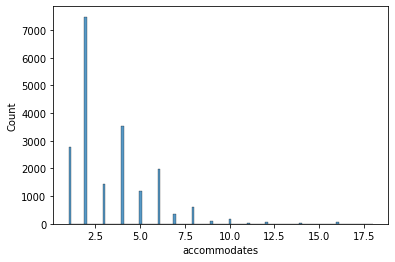

In [45]:
sns.histplot(data['accommodates'])
plt.show()

In [47]:
# Bedrooms:

data['bedrooms'].describe()

count    19830.000000
mean         1.567574
std          1.014817
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max         16.000000
Name: bedrooms, dtype: float64

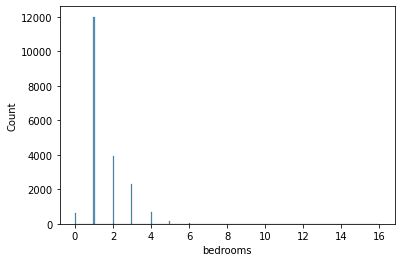

In [48]:
sns.histplot(data['bedrooms'])
plt.show()

In [50]:
# Bathrooms:

data['bathrooms'].describe()

count    19824.000000
mean         1.317847
std          0.643449
min          0.000000
25%          1.000000
50%          1.000000
75%          1.500000
max         16.000000
Name: bathrooms, dtype: float64

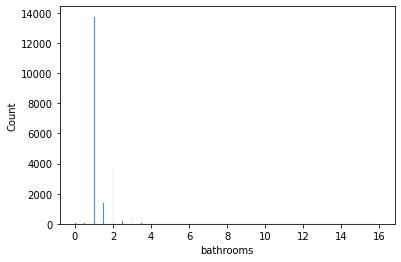

In [51]:
sns.histplot(data['bathrooms'])
plt.show()

In [100]:
# Beds:

data['beds'].describe()

count    19799.00000
mean         2.25769
std          1.88152
min          0.00000
25%          1.00000
50%          2.00000
75%          3.00000
max         40.00000
Name: beds, dtype: float64

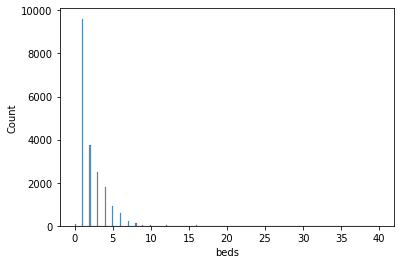

In [101]:
sns.histplot(data['beds'])
plt.show()

- INFERENCE:


- Accomodates:
- The maximum capacity can accommodate range from 1 to 18 persons with average of 3 persons and middle 50% range from 2 to 4 persons as per overall listings.
- From histogram, it is found that maximum capacity lies in the range from 1 to 6 persons as per overall listings.


- Bedrooms:

- The number of bedrooms range from 0 to 16 with average of 2 beds and middle 50% range from 1 to 2 as per overall listings.
- From histogram, it is found that maximum number of bedrooms lie in the range from 1 to 4 as per overall listings.


- Bathrooms:

- The number of bathrooms range from 0 to 16 with average of 1 bathroom and middle 50% range from 1 to 1.5 bathrooms as per overall lisitngs.
- From histogram, it is found that maximum number of bedrooms lie in the range from 1 to 2 as per overall listings.


- Beds:

- The number of beds range from 0 to 40 with average of 2 beds and middle 50% range from 1 to 3 beds as per overall lisitngs.
- From histogram, it is found that maximum number of beds lie in the range from 1 to 5 as per overall listings.

'Price' Column

In [38]:
data['price'].describe()

count    19833.000000
mean       129.624716
std        423.999470
min          7.000000
25%         40.000000
50%         65.000000
75%        113.000000
max       9120.000000
Name: price, dtype: float64

In [84]:
out_pri = data[data['price'] < data['price'].quantile(0.99)]

<AxesSubplot:xlabel='price', ylabel='Count'>

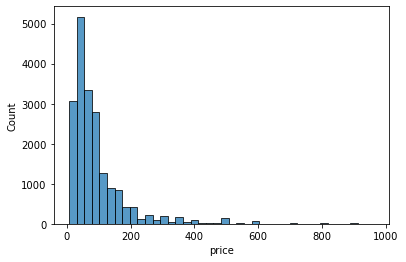

In [41]:
sns.histplot(out_pri['price'], bins = 40)

In [42]:
mean_price_for_listing = out_pri.groupby('id').mean()['price']

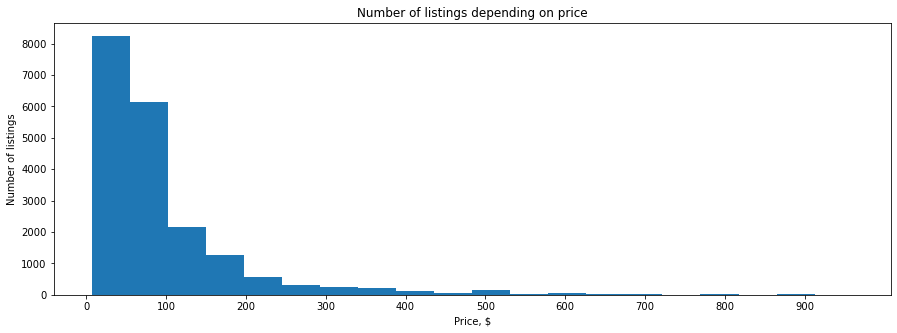

In [45]:
#Number of listings depending on Price

plt.figure(figsize=(15,5))
plt.hist(mean_price_for_listing, bins=20)
plt.xticks(np.arange(0, 1000, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Price, $')
plt.title('Number of listings depending on price')

plt.show()

In [46]:
min_price = data['price'].min()
max_price = data['price'].max()
mean_price = data['price'].mean()

print('Minimum price per listing is %d$.' % (min_price))
print('Maximum price per listing is %d$' % (max_price))
print('Average price per listing is %d$.' % (mean_price))

Minimum price per listing is 7$.
Maximum price per listing is 9120$
Average price per listing is 129$.


Inference:

- Most of the listings(Around 75%) are available in the price range of 40 to 113 dollars. 

- Median Price of all the listings are around 65 dollars.
- Minimum, Mean and Maximum price of the listing is 7, 129 and 9120 dollars respectively.

2. 'Security_deposit' Column:

In [48]:
data['security_deposit'].describe()

count    14102.000000
mean       251.110623
std        429.110669
min          0.000000
25%          0.000000
50%        150.000000
75%        300.000000
max       4455.000000
Name: security_deposit, dtype: float64

In [49]:
data['security_deposit'].quantile(0.99)

2024.7499999999945

In [85]:
out_sec = data[data['security_deposit'] < data['security_deposit'].quantile(0.99)]

In [88]:
mean_sec_for_listing = out_sec.groupby('id').mean()['security_deposit']

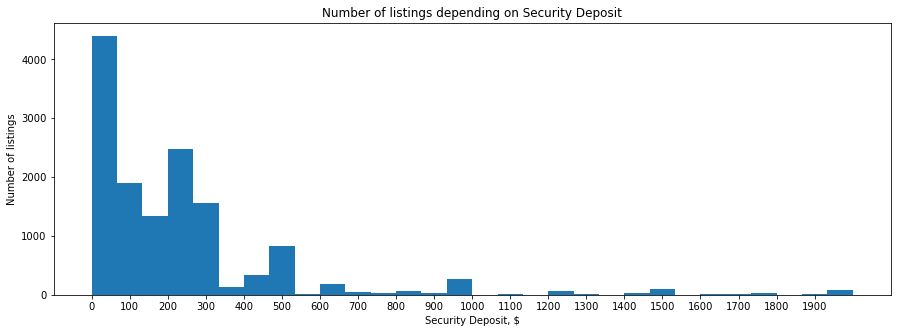

In [52]:
#Number of listings depending on Security Deposit

plt.figure(figsize=(15,5))
plt.hist(mean_sec_for_listing, bins=30)
plt.xticks(np.arange(0, 2000, step=100))
plt.ylabel('Number of listings')
plt.xlabel('Security Deposit, $')
plt.title('Number of listings depending on Security Deposit')

plt.show()

In [53]:
min_sec = data['security_deposit'].min()
max_sec = data['security_deposit'].max()
mean_sec = data['security_deposit'].mean()

print('Minimum price per listing is %d$.' % (min_sec))
print('Maximum price per listing is %d$' % (max_sec))
print('Average price per listing is %d$.' % (mean_sec))

Minimum price per listing is 0$.
Maximum price per listing is 4455$
Average price per listing is 251$.


<AxesSubplot:xlabel='security_deposit', ylabel='Count'>

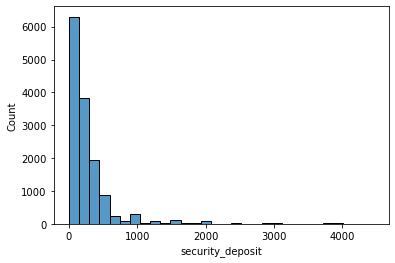

In [54]:
sns.histplot(data['security_deposit'], bins = 30)

Inference:

- Most of the listings(Around 75%) are available in the security deposit range of 0 to 300 dollars. 
- Median security deposit for all the listings are around 150 dollars.
- Minimum, Mean and Maximum security deposit is 0, 251 and 4455 dollars respectively. 

3. 'Cleaning_fee' Column

In [55]:
data['cleaning_fee'].describe()

count     15764
unique      140
top       $0.00
freq       2232
Name: cleaning_fee, dtype: object

In [59]:
data['cleaning_fee'].quantile(0.99)

180.0

In [86]:
out_cle = data[data['cleaning_fee'] < data['cleaning_fee'].quantile(0.99)]

In [89]:
mean_cle_for_listing = out_cle.groupby('id').mean()['cleaning_fee']

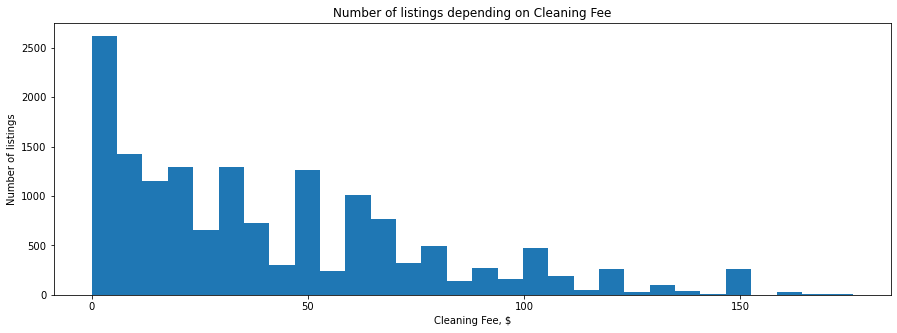

In [62]:
#Number of listings depending on Cleaning Fee

plt.figure(figsize=(15,5))
plt.hist(mean_cle_for_listing, bins=30)
plt.xticks(np.arange(0, 200, step=50))
plt.ylabel('Number of listings')
plt.xlabel('Cleaning Fee, $')
plt.title('Number of listings depending on Cleaning Fee')

plt.show()

<AxesSubplot:xlabel='cleaning_fee', ylabel='Count'>

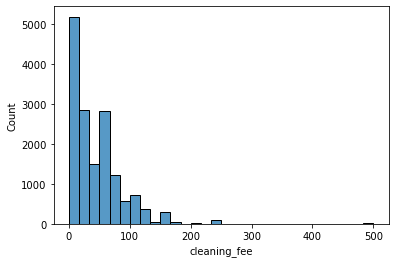

In [63]:
sns.histplot(data['cleaning_fee'], bins = 30)

In [64]:
min_cle = data['cleaning_fee'].min()
max_cle = data['cleaning_fee'].max()
mean_cle = data['cleaning_fee'].mean()

print('Minimum price per listing is %d$.' % (min_cle))
print('Maximum price per listing is %d$' % (max_cle))
print('Average price per listing is %d$.' % (mean_cle))

Minimum price per listing is 0$.
Maximum price per listing is 500$
Average price per listing is 43$.


Inference:

1. Most of the listings(Around 75%) are available with the cleaning fee range of 10 to 60 dollars. 
2. Median security deposit for all the listings are around 30 dollars.
3. Minimum, Mean and Maximum security deposit is 0, 43 and 500 dollars respectively. 

4. 'Extra_people' Column

In [65]:
data['extra_people'].describe()

count    19833.000000
mean         8.713256
std         14.829314
min          0.000000
25%          0.000000
50%          0.000000
75%         15.000000
max        260.000000
Name: extra_people, dtype: float64

In [90]:
mean_ext_for_listing = data.groupby('id').mean()['extra_people']

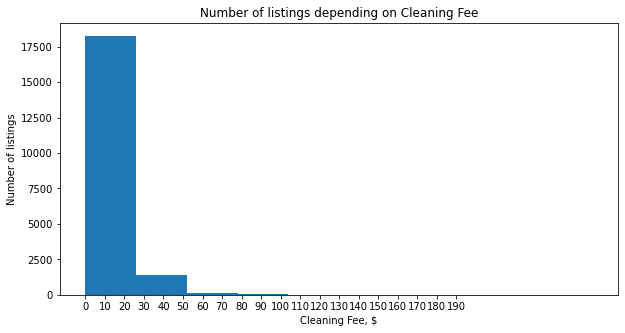

In [67]:
#Number of listings depending on Extra People

plt.figure(figsize=(10,5))
plt.hist(mean_ext_for_listing, bins=10)
plt.xticks(np.arange(0, 200, step=10))
plt.ylabel('Number of listings')
plt.xlabel('Cleaning Fee, $')
plt.title('Number of listings depending on Cleaning Fee')

plt.show()

<AxesSubplot:xlabel='extra_people', ylabel='Count'>

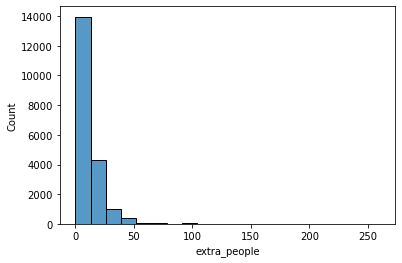

In [68]:
sns.histplot(data['extra_people'], bins = 20)

In [69]:
min_ext = data['extra_people'].min()
max_ext = data['extra_people'].max()
mean_ext = data['extra_people'].mean()

print('Minimum price per listing is %d$.' % (min_ext))
print('Maximum price per listing is %d$' % (max_ext))
print('Average price per listing is %d$.' % (mean_ext))

Minimum price per listing is 0$.
Maximum price per listing is 260$
Average price per listing is 8$.


Inference:

1. Most of the listings(Around 75%) are available with a fee for accomodating extra people in the range of 0 to 15 dollars. 
2. Median security deposit for all the listings are around 0 dollars.
3. Minimum, Mean and Maximum security deposit is 0, 8 and 260 dollars respectively. 

Review scores rating

count    14986.000000
mean        91.096890
std          9.619533
min         20.000000
25%         88.000000
50%         93.000000
75%         97.000000
max        100.000000
Name: review_scores_rating, dtype: float64


<AxesSubplot:xlabel='review_scores_rating', ylabel='Count'>

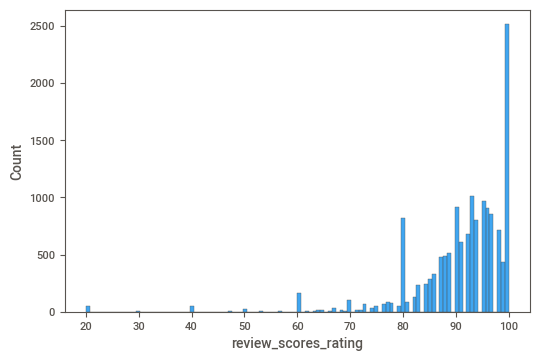

In [108]:
print(reviews['review_scores_rating'].describe())
sns.histplot(reviews['review_scores_rating'])

Review scores accuracy

count    14978.000000
mean         9.400788
std          0.965765
min          2.000000
25%          9.000000
50%         10.000000
75%         10.000000
max         10.000000
Name: review_scores_accuracy, dtype: float64


<AxesSubplot:xlabel='review_scores_accuracy'>

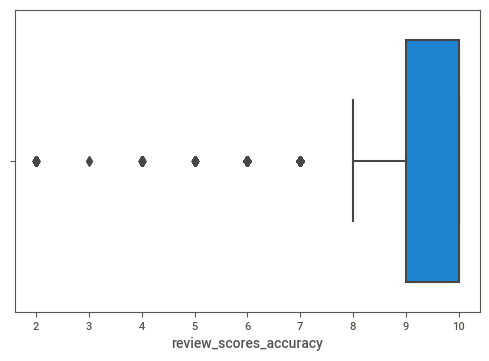

In [109]:
print(reviews['review_scores_accuracy'].describe())
sns.boxplot(reviews['review_scores_accuracy'])

Review scores Cleanliness

count    14978.000000
mean         9.256710
std          1.040733
min          2.000000
25%          9.000000
50%         10.000000
75%         10.000000
max         10.000000
Name: review_scores_cleanliness, dtype: float64


<AxesSubplot:xlabel='review_scores_cleanliness'>

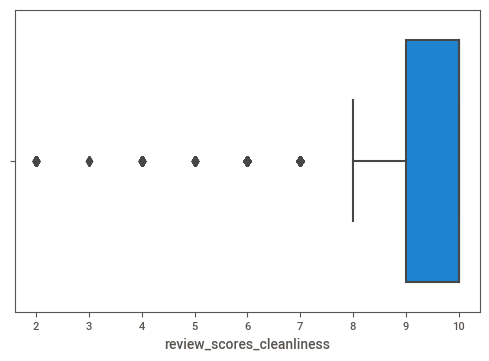

In [110]:
print(reviews['review_scores_cleanliness'].describe())
sns.boxplot(reviews['review_scores_cleanliness'])

Review scores Checkin

count    14973.000000
mean         9.570627
std          0.895359
min          2.000000
25%          9.000000
50%         10.000000
75%         10.000000
max         10.000000
Name: review_scores_checkin, dtype: float64


<AxesSubplot:xlabel='review_scores_checkin'>

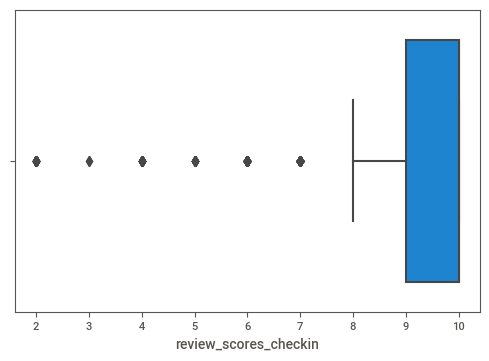

In [112]:
print(reviews['review_scores_checkin'].describe())
sns.boxplot(reviews['review_scores_checkin'])

Review scores communication

count    14982.000000
mean         9.569216
std          0.886817
min          2.000000
25%          9.000000
50%         10.000000
75%         10.000000
max         10.000000
Name: review_scores_communication, dtype: float64


<AxesSubplot:xlabel='review_scores_communication'>

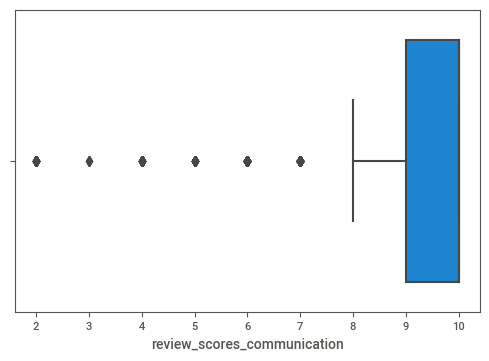

In [113]:
print(reviews['review_scores_communication'].describe())
sns.boxplot(reviews['review_scores_communication'])

Review Scores location

count    14975.000000
mean         9.589583
std          0.765803
min          2.000000
25%          9.000000
50%         10.000000
75%         10.000000
max         10.000000
Name: review_scores_location, dtype: float64


<AxesSubplot:xlabel='review_scores_location'>

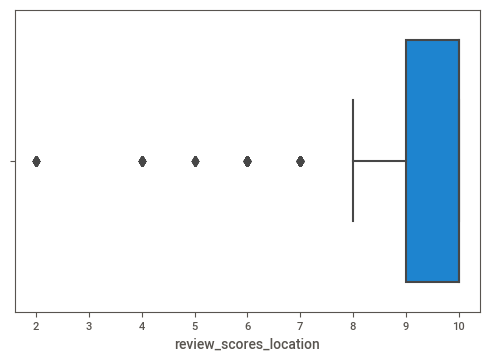

In [114]:
print(reviews['review_scores_location'].describe())
sns.boxplot(reviews['review_scores_location'])

Review Scores Value

count    14976.000000
mean         9.040198
std          1.034749
min          2.000000
25%          9.000000
50%          9.000000
75%         10.000000
max         10.000000
Name: review_scores_value, dtype: float64


<AxesSubplot:xlabel='review_scores_value'>

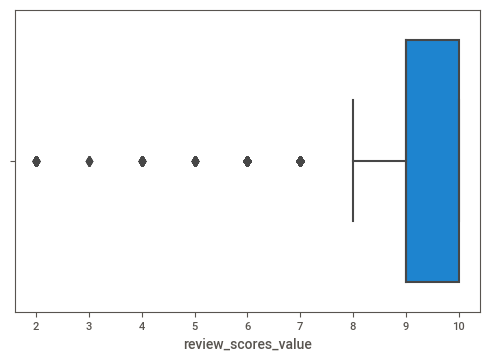

In [115]:
print(reviews['review_scores_value'].describe())
sns.boxplot(reviews['review_scores_value'])

- Inference:

- For all the  review columns we have the following 

- min          =2.000000
- 25%          =9.000000
- 50%          =9.000000
- 75%         =10.000000
- max         =10.000000

### Bi-Variate Analysis

In [148]:
# 1. neighbourhood_group_cleansed :

d_persons_dist=data.groupby('neighbourhood_group_cleansed')['accommodates'].median().reset_index().sort_values(by='accommodates',ascending=False)
d_persons_dist

neighbourhood_group_cleansed  accommodates
1                     Eixample           4.0
9          Sarrià-Sant Gervasi           3.0
0                 Ciutat Vella           2.0
2                       Gràcia           2.0
3               Horta-Guinardó           2.0
4                    Les Corts           2.0
5                   Nou Barris           2.0
6                  Sant Andreu           2.0
7                   Sant Martí           2.0
8               Sants-Montjuïc           2.0

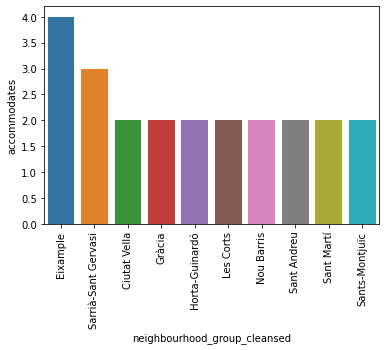

In [149]:
sns.barplot(d_persons_dist['neighbourhood_group_cleansed'],d_persons_dist['accommodates'])
plt.xticks(rotation=90)
plt.show()

In [156]:
# INFERENCE:

# The 'Eixample' and 'Sarrià-Sant Gervasi' districts holds maximum number of accommodates as it can be located in the city centre and with favourable resources.

In [157]:
# 2. property_type:

d_persons_prop=data.groupby('property_type')['accommodates'].median().reset_index().sort_values(by='accommodates',ascending=False)
d_persons_prop

property_type  accommodates
27                   Villa           6.0
22            Nature lodge           6.0
4                     Boat           6.0
26               Townhouse           4.0
24      Serviced apartment           4.0
0               Aparthotel           4.0
9                   Chalet           3.0
7                Camper/RV           3.0
6                    Cabin           2.0
18                  Hostel           2.0
2                     Barn           2.0
25              Tiny house           2.0
3        Bed and breakfast           2.0
23                   Other           2.0
5           Boutique hotel           2.0
21                    Loft           2.0
20                   House           2.0
19                   Hotel           2.0
17              Guesthouse           2.0
16             Guest suite           2.0
15               Farm stay           2.0
1                Apartment           2.0
13                    Dorm           2.0
10             Condominium           2.0
8   Casa particular (Cuba)           2.0
14             Earth house           2.0
12              Dome house           1.5
11                 Cottage           1.0

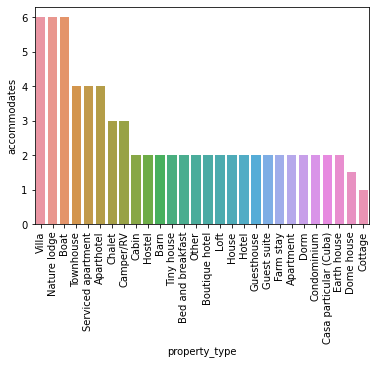

In [158]:
sns.barplot(d_persons_prop['property_type'],d_persons_prop['accommodates'])
plt.xticks(rotation=90)
plt.show()

In [152]:
# INFERENCE:

# The 'Villa', 'Nature lodge','Boat' that includes back yard holds maximum number of accommodates as it is preferred by most of the guests to live peacefully with family.
# The Cottage holds minimum number of accommodates as it is small in size and it is not preferred by most of the guests.

In [163]:
# 3. room_type:

d_persons_room=data.groupby('room_type')['accommodates'].median().reset_index().sort_values(by='accommodates',ascending=False)
d_persons_room

room_type  accommodates
0  Entire home/apt           4.0
1     Private room           2.0
2      Shared room           1.0

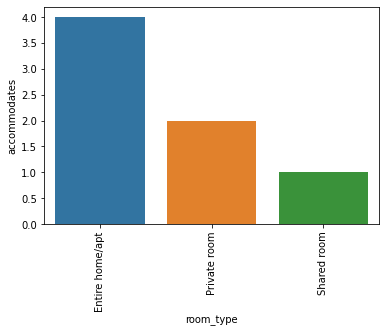

In [164]:
sns.barplot(d_persons_room['room_type'],d_persons_room['accommodates'])
plt.xticks(rotation=90)
plt.show()

In [68]:
# INFERENCE:

# The Entire room/ Apartment holds maximum number of accommodates as it is large to fit more number of persons.
# Private and Shared rooms are not preferred due to some privacy and lack of enjoyment with family.

Against 'bedrooms':

In [165]:
# 1. neighbourhood_group_cleansed :

d_bedrooms_dist=data.groupby('neighbourhood_group_cleansed')['bedrooms'].median().reset_index().sort_values(by='bedrooms',ascending=False)
d_bedrooms_dist

neighbourhood_group_cleansed  bedrooms
0                 Ciutat Vella       1.0
1                     Eixample       1.0
2                       Gràcia       1.0
3               Horta-Guinardó       1.0
4                    Les Corts       1.0
5                   Nou Barris       1.0
6                  Sant Andreu       1.0
7                   Sant Martí       1.0
8               Sants-Montjuïc       1.0
9          Sarrià-Sant Gervasi       1.0

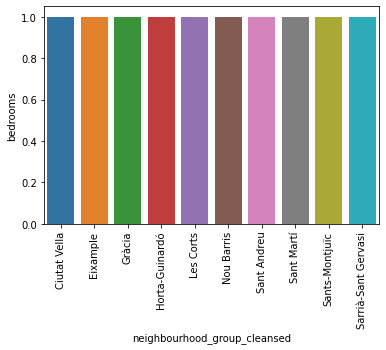

In [166]:
sns.barplot(d_bedrooms_dist['neighbourhood_group_cleansed'],d_bedrooms_dist['bedrooms'])
plt.xticks(rotation=90)
plt.show()

In [73]:
# INFERENCE:

# All the districts hold maximum number of bedrooms because of south-west part of city as it is good for health and prosperity.
# So it is recommended to construct bedrooms in suitable areas where there is no disturbance and according to traditional rules.

In [167]:
# 2. property_type :

d_bedrooms_prop=data.groupby('property_type')['bedrooms'].median().reset_index().sort_values(by='bedrooms',ascending=False)
d_bedrooms_prop

property_type  bedrooms
4                     Boat       3.0
22            Nature lodge       3.0
26               Townhouse       2.0
24      Serviced apartment       2.0
9                   Chalet       2.0
27                   Villa       1.5
15               Farm stay       1.0
25              Tiny house       1.0
23                   Other       1.0
21                    Loft       1.0
20                   House       1.0
19                   Hotel       1.0
18                  Hostel       1.0
17              Guesthouse       1.0
16             Guest suite       1.0
0               Aparthotel       1.0
1                Apartment       1.0
13                    Dorm       1.0
12              Dome house       1.0
11                 Cottage       1.0
10             Condominium       1.0
8   Casa particular (Cuba)       1.0
7                Camper/RV       1.0
6                    Cabin       1.0
5           Boutique hotel       1.0
3        Bed and breakfast       1.0
2                     Barn       1.0
14             Earth house       1.0

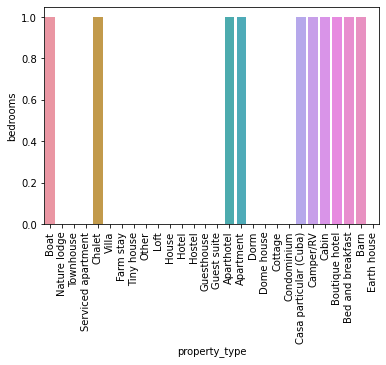

In [168]:
sns.barplot(d_bedrooms_prop['property_type'],d_bedrooms_dist['bedrooms'])
plt.xticks(rotation=90)
plt.show()

In [169]:
# INFERENCE:

# The Villa, Boat, Chalet and Apartments hold maximum number of bedrooms.
# This is because they have more living space with more facilities like parking place and well-architecture.
# There are some 'one and half' bedrooms where there will not be any attached bathrooms and amenities so individual persons can stay.

In [170]:
# 3. room_type :

d_bedrooms_room=data.groupby('room_type')['bedrooms'].median().reset_index().sort_values(by='bedrooms',ascending=False)
d_bedrooms_room

room_type  bedrooms
0  Entire home/apt       2.0
1     Private room       1.0
2      Shared room       1.0

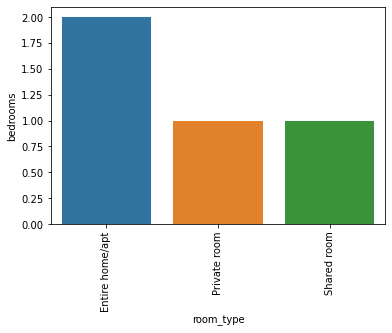

In [171]:
sns.barplot(d_bedrooms_room['room_type'],d_bedrooms_room['bedrooms'])
plt.xticks(rotation=90)
plt.show()

In [172]:
# INFERENCE:

# The Entire home/Apartment holds maximum number of bedrooms because of presence of double bedrooms needed to stay for family guests.
# The Private and Shared rooms are not preferred mostly because only single bedroom is sufficient for individuals.

Against 'bathrooms':

In [173]:
# 1. neighbourhood_group_cleansed :

d_bathrooms_dist=data.groupby('neighbourhood_group_cleansed')['bathrooms'].median().reset_index().sort_values(by='bathrooms',ascending=False)
d_bathrooms_dist

neighbourhood_group_cleansed  bathrooms
0                 Ciutat Vella        1.0
1                     Eixample        1.0
2                       Gràcia        1.0
3               Horta-Guinardó        1.0
4                    Les Corts        1.0
5                   Nou Barris        1.0
6                  Sant Andreu        1.0
7                   Sant Martí        1.0
8               Sants-Montjuïc        1.0
9          Sarrià-Sant Gervasi        1.0

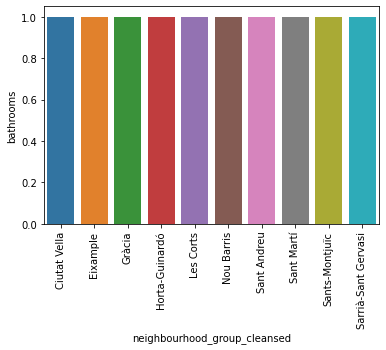

In [174]:
sns.barplot(d_bathrooms_dist['neighbourhood_group_cleansed'],d_bathrooms_dist['bathrooms'])
plt.xticks(rotation=90)
plt.show()

In [175]:
# INFERENCE:

# All the districts hold maximum number of bathrooms.
# This is because of expensive and commercial districts and with more utilities such as 'toilet', 'sink', 'tub' and 'shower'.

In [176]:
# 2. property_type :

d_bathrooms_prop=data.groupby('property_type')['bathrooms'].median().reset_index().sort_values(by='bathrooms',ascending=False)
d_bathrooms_prop

property_type  bathrooms
2                     Barn       4.00
27                   Villa       2.00
4                     Boat       2.00
24      Serviced apartment       2.00
22            Nature lodge       2.00
9                   Chalet       2.00
26               Townhouse       1.25
16             Guest suite       1.00
25              Tiny house       1.00
23                   Other       1.00
21                    Loft       1.00
20                   House       1.00
19                   Hotel       1.00
18                  Hostel       1.00
17              Guesthouse       1.00
0               Aparthotel       1.00
15               Farm stay       1.00
1                Apartment       1.00
13                    Dorm       1.00
12              Dome house       1.00
11                 Cottage       1.00
10             Condominium       1.00
8   Casa particular (Cuba)       1.00
6                    Cabin       1.00
5           Boutique hotel       1.00
3        Bed and breakfast       1.00
14             Earth house       1.00
7                Camper/RV       0.00

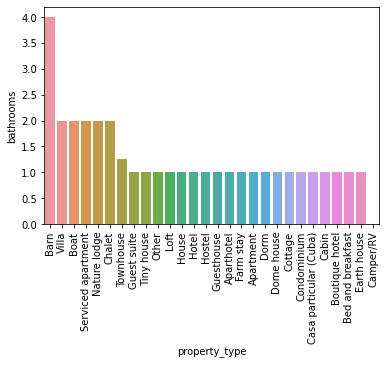

In [177]:
sns.barplot(d_bathrooms_prop['property_type'],d_bathrooms_prop['bathrooms'])
plt.xticks(rotation=90)
plt.show()

In [178]:
# INFERENCE:

# The 'Barn', 'Villa', 'Boat', 'Serviced Apartment', 'Natural lodge', 'Chalet' have maximum number of bathrooms.
# This is because of more living space and more luxury in nature to have new experience with family guests.

In [179]:
# 3. room_type :

d_bathrooms_room=data.groupby('room_type')['bathrooms'].median().reset_index().sort_values(by='bathrooms',ascending=False)
d_bathrooms_room

room_type  bathrooms
0  Entire home/apt        1.0
1     Private room        1.0
2      Shared room        1.0

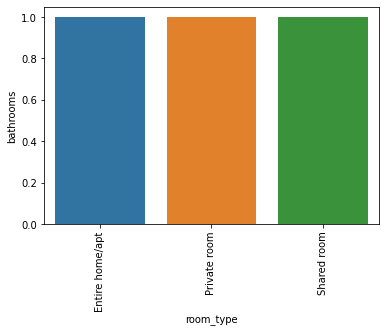

In [180]:
sns.barplot(d_bathrooms_room['room_type'],d_bathrooms_room['bathrooms'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# INFERENCE:

# All the room types have maximum number of bathrooms.
# Generally, shared rooms are preferred because of common bathrooms, separate shower and toilet are present and can be used by other guests.

Against 'beds':

In [181]:
# 1. neighbourhood_group_cleansed :

d_beds_dist=data.groupby('neighbourhood_group_cleansed')['beds'].median().reset_index().sort_values(by='beds',ascending=False)
d_beds_dist

neighbourhood_group_cleansed  beds
1                     Eixample   2.0
7                   Sant Martí   2.0
8               Sants-Montjuïc   2.0
9          Sarrià-Sant Gervasi   2.0
0                 Ciutat Vella   1.0
2                       Gràcia   1.0
3               Horta-Guinardó   1.0
4                    Les Corts   1.0
5                   Nou Barris   1.0
6                  Sant Andreu   1.0

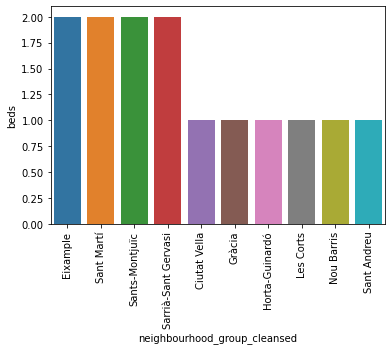

In [182]:
sns.barplot(d_beds_dist['neighbourhood_group_cleansed'],d_beds_dist['beds'])
plt.xticks(rotation=90)
plt.show()

In [183]:
# INFERENCE:

# The districts 'Eixample', 'Sarrià-Sant Gervasi', 'Sants-Montjuïc' and 'Sant Martí' have maximum number of beds on an average of 2 to 2.5 beds.
# This is because they have quality beds where mostly 3 people of two adults and one child can sleep.

In [184]:
# 2. property_type :

d_beds_prop=data.groupby('property_type')['beds'].median().reset_index().sort_values(by='beds',ascending=False)
d_beds_prop

property_type  beds
4                     Boat   4.0
27                   Villa   3.0
26               Townhouse   3.0
24      Serviced apartment   3.0
22            Nature lodge   3.0
9                   Chalet   2.0
18                  Hostel   2.0
1                Apartment   2.0
10             Condominium   2.0
0               Aparthotel   2.0
17              Guesthouse   1.5
8   Casa particular (Cuba)   1.0
20                   House   1.0
2                     Barn   1.0
25              Tiny house   1.0
3        Bed and breakfast   1.0
23                   Other   1.0
5           Boutique hotel   1.0
21                    Loft   1.0
19                   Hotel   1.0
11                 Cottage   1.0
6                    Cabin   1.0
16             Guest suite   1.0
15               Farm stay   1.0
7                Camper/RV   1.0
13                    Dorm   1.0
12              Dome house   1.0
14             Earth house   1.0

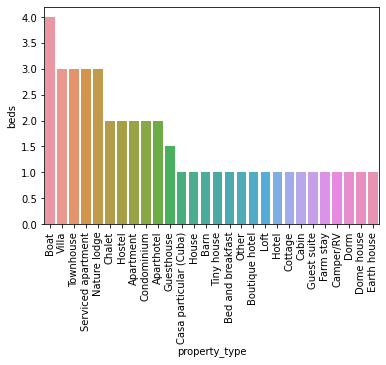

In [185]:
sns.barplot(d_beds_prop['property_type'],d_beds_prop['beds'])
plt.xticks(rotation=90)
plt.show()

In [186]:
# INFERENCE:

# The property types 'Villa', 'Boat', 'Chalet', 'Townhouse', 'Serviced Apartment', 'Apartment', 'Hostel', 'Natural lodge', 'Condominium' and 'Aparthotel' have maximum number on an average of 2 to 5.5 beds.
# These types have more living space and many floors so that sufficient beds can be occupied.

In [187]:
# 3. room_type :

d_beds_room=data.groupby('room_type')['beds'].median().reset_index().sort_values(by='beds',ascending=False)
d_beds_room

room_type  beds
0  Entire home/apt   3.0
1     Private room   1.0
2      Shared room   1.0

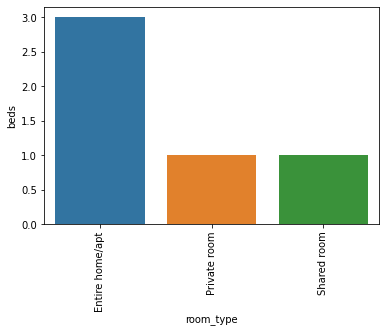

In [188]:
sns.barplot(d_beds_room['room_type'],d_beds_room['beds'])
plt.xticks(rotation=90)
plt.show()

In [ ]:
# INFERENCE:

# The room types 'Entire home/Apartment' have maximum number of beds whereas Private rooms have only 1 bed and Shared rooms have average number of beds.
# These Entire home/Apartment has more persons to be occupied as they have large area which is preferable by more guests and Private room has small area and only individuals can be occupied and not preferable mostly.

In [189]:
# 4. Bed Type:

d_beds_bed_type=data.groupby('bed_type')['beds'].median().reset_index().sort_values(by='beds',ascending=False)
d_beds_bed_type

bed_type  beds
0         Airbed   4.0
4       Real Bed   2.0
1          Couch   1.0
2          Futon   1.0
3  Pull-out Sofa   1.0

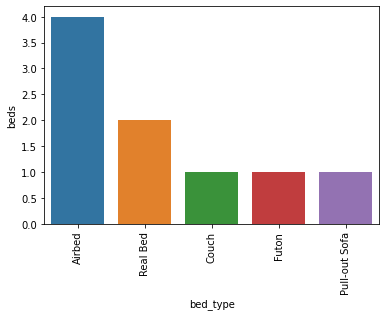

In [190]:
sns.barplot(d_beds_bed_type['bed_type'],d_beds_bed_type['beds'])
plt.xticks(rotation=90)
plt.show()

In [191]:
# INFERENCE:

# The bed type 'Airbed' holds maximum number of beds as it is comfortable with guests to sleep.
# The bed type 'Real bed' holds average number of beds as it is soft and luxurious in cost.
# The other bed types holds minimum number of beds gradually as it is not much comfortable when compared to other bed types.

WITH NUMERICAL COLUMNS:

Against 'accommodates':

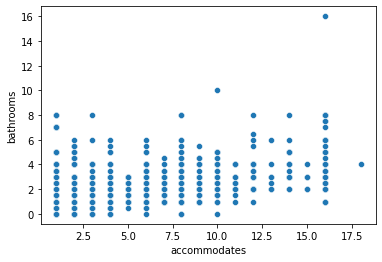

In [109]:
# 1. bathrooms:

sns.scatterplot(data['accommodates'],data['bathrooms'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in accommodates increases the number of bathrooms.
# This change in effect leads to more bathrooms as the capacity of persons crossing 10.

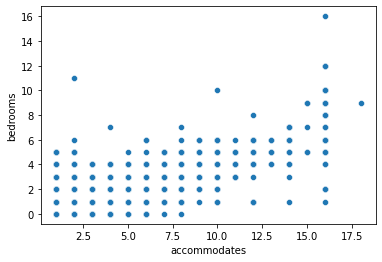

In [110]:
# 2. bedrooms:

sns.scatterplot(data['accommodates'],data['bedrooms'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in accommodates increases the number of bedrooms.
# This change in effect leads to more bedrooms as the capacity of persons crossing 10 especially with children.

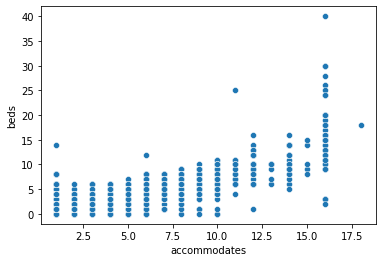

In [111]:
# 3. beds:

sns.scatterplot(data['accommodates'],data['beds'])
plt.show()

In [112]:
# INFERENCE:

# The increase in accommodates increases the number of beds.
# This change in effect leads to more bedrooms as the capacity of persons crossing 10.

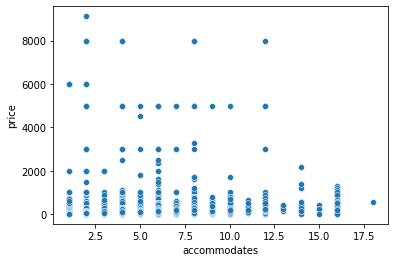

In [113]:
# 4. price:

sns.scatterplot(data['accommodates'],data['price'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in accommodates increases the daily price.
# This change in effect leads to high price as the capacity of persons are high but maintained at medium price when crossing 12 persons.

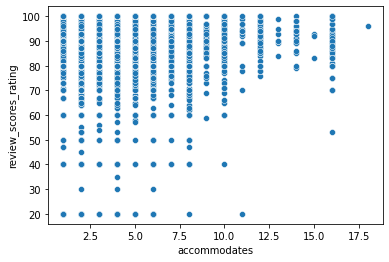

In [114]:
# 5. review_scores_rating:

sns.scatterplot(data['accommodates'],data['review_scores_rating'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in accommodates increases the review score rapidly.
# This change in effect leads to low and high review score as the capacity of persons is high but high score is maintained when accommodates crossed 10.

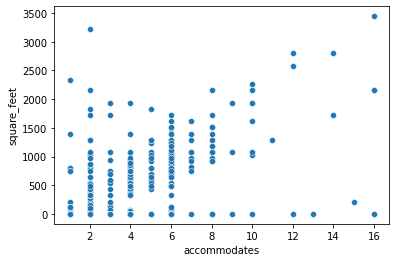

In [115]:
# 6. square feet:

sns.scatterplot(data['accommodates'],data['square_feet'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in accommodates increases the square_feet of listing area rapidly.
# This change in effect leads to high square_feet as the capacity of persons is high.

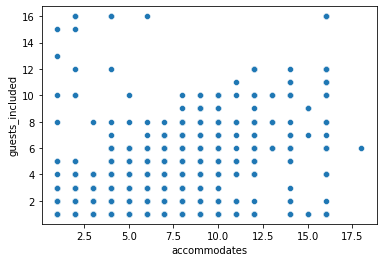

In [116]:
# 7. guests_included:

sns.scatterplot(data['accommodates'],data['guests_included'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in accommodates increases the guests_included of listing area rapidly.
# This change in effect leads to more guests included as the maximum capacity of persons is high.

Against 'bathrooms':

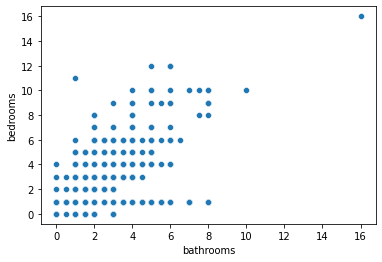

In [117]:
# 1. bedrooms:

sns.scatterplot(data['bathrooms'],data['bedrooms'])
plt.show()

In [118]:
# INFERENCE:

# The increase in number of bathrooms increases the number of bedrooms.
# This tells that the the high number of bathrooms which limit to 10 as the number of bedrooms needed attached rest rooms.

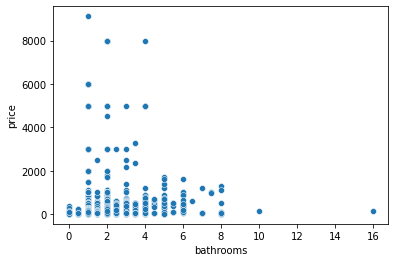

In [120]:
# 2. price:

sns.scatterplot(data['bathrooms'],data['price'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in number of bathrooms increases the price.
# This tells that the the high number of bathrooms which limit to 10 approximately as the price is high due to high utilities.

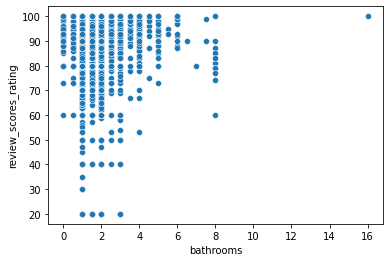

In [121]:
# 3. review_scores_rating:

sns.scatterplot(data['bathrooms'],data['review_scores_rating'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in number of bathrooms increases the review scores rapidly..
# This tells that the the high number of bathrooms which limit to 10 approximately as the review_score is high because of quality .

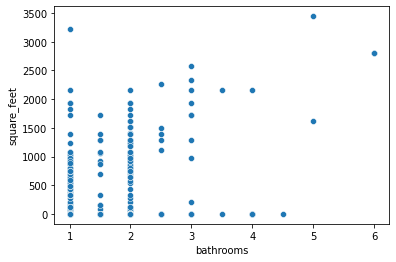

In [123]:
# 4. square_feet:

sns.scatterplot(data['bathrooms'],data['square_feet'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in number of bathrooms increases the square feet gradually.
# This tells that the the high number of bathrooms which limit to 6 approximately as the square_feet is high because of space needed. .

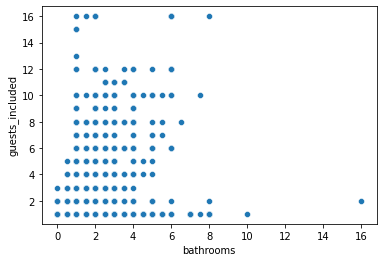

In [124]:
# 5. guests_included:

sns.scatterplot(data['bathrooms'],data['guests_included'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in number of bathrooms increases the guests .
# This tells that the the high number of bathrooms which limit to 10 approximately as the guests is high because of more persons.

Against 'bedrooms':

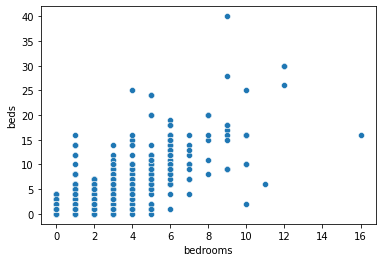

In [125]:
# 1. beds:

sns.scatterplot(data['bedrooms'],data['beds'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in number of bedrooms increases the beds .
# This tells that the the high number of bedrooms which limit to 12 approximately as the beds is high because of space and persons.

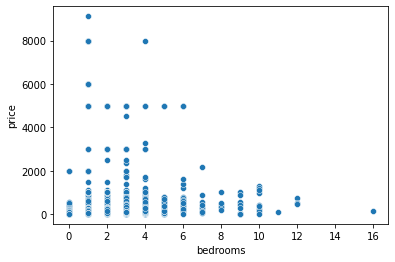

In [126]:
# 2. price:

sns.scatterplot(data['bedrooms'],data['price'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in number of bedrooms increases the price limit to 8000 .
# This tells that the the high number of bedrooms which limit to 12 approximately as the price is high because of more utilties such as lamp, tube lights etc and more persons.

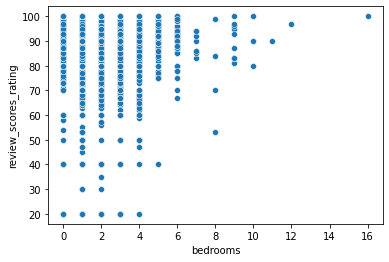

In [127]:
# 3. review_scores_rating:

sns.scatterplot(data['bedrooms'],data['review_scores_rating'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in number of bedrooms increases the review scores limit to 100 .
# This tells that the the high number of bedrooms which limit to 12 approximately as the review scores is high because of more utilties such as lamp, tube lights etc and quality of beds.

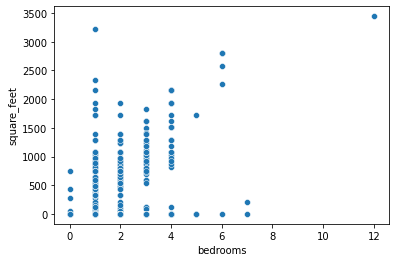

In [128]:
# 4. square_feet:

sns.scatterplot(data['bedrooms'],data['square_feet'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in number of bedrooms increases the square feet limit to 3500 ft.
# This tells that the the high number of bedrooms which limit to 7 approximately as the square feet is high because of more space needed

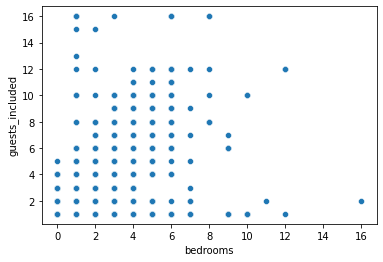

In [129]:
# 5. guests_included:

sns.scatterplot(data['bedrooms'],data['guests_included'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in number of bedrooms increases the guests limit to 16 persons.
# This tells that the the high number of bedrooms which limit to 12 approximately as the number of guests is high because of more persons involved.

Against 'beds':

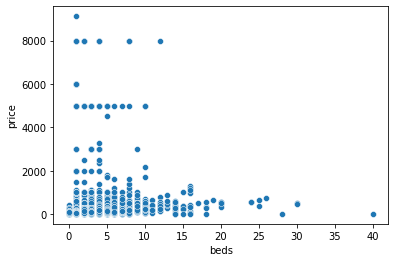

In [130]:
# 1. price:

sns.scatterplot(data['beds'],data['price'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in number of beds increases the price limit to 8000 dollars.
# This tells that the the high number of beds which limit to 30 approximately as the price is high because of resources of beds of best quality involved.

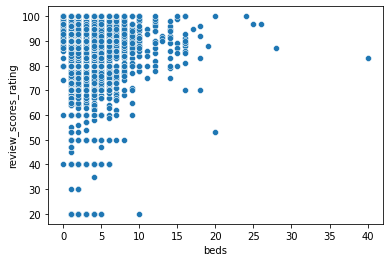

In [131]:
# 2. review_scores_rating:

sns.scatterplot(data['beds'],data['review_scores_rating'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in number of beds increases the review scores limit to 100 .
# This tells that the the high number of beds which limit to 30 approximately as the review score is high because of best quality involved.

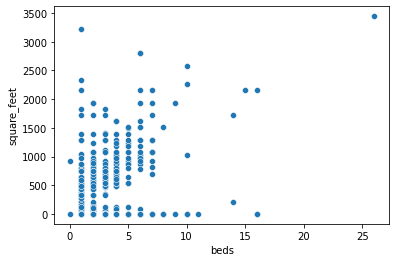

In [132]:
# 3. square_feet:

sns.scatterplot(data['beds'],data['square_feet'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in number of beds increases the square_feet limit to 3500 .
# This tells that the the high number of beds which limit to 16 approximately as the square feet is high because of more space needed.

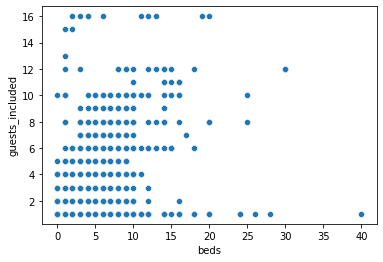

In [133]:
# 4. guests_included:

sns.scatterplot(data['beds'],data['guests_included'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in number of beds increases the number of guests limit to 16.
# This tells that the the high number of beds which limit to 32 approximately as the number of guests is high because of more persons needed.

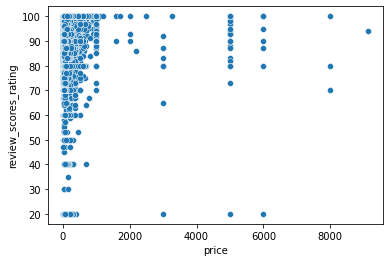

In [134]:
# review_scores_rating Vs price:

sns.scatterplot(data['price'],data['review_scores_rating'])
plt.show()

In [ ]:
# INFERENCE:

# The increase in price increases the review score limit to 100.
# This tells that the the high price which limit to 8000 approximately as the review score is high because of some quality
# But as the price crosses 1000, the review score is reduced because of expensive rate at which guests cannot tolerate to pay it.

In [195]:
# Taking the above mentioned columns as separate dataset:

columns=['accommodates','bedrooms','bathrooms','beds','price','review_scores_rating','square_feet','guests_included']
d_num=d_num[columns]

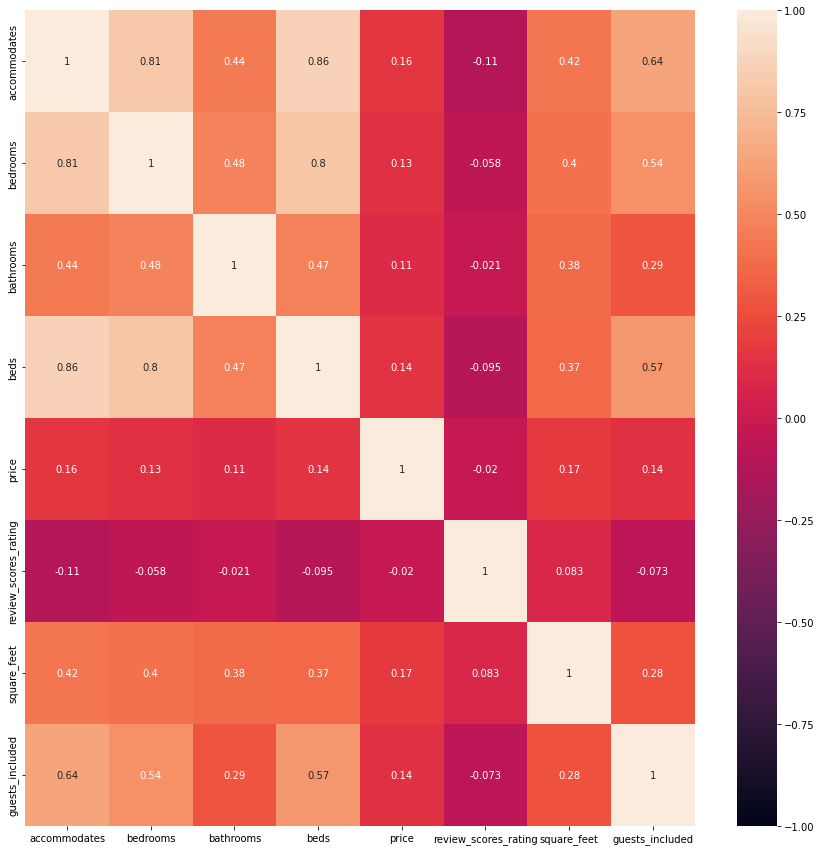

In [197]:
# Producing Heat map of those above mentioned columns:

plt.figure(figsize=(15,15))
sns.heatmap(d_num.corr(),vmin=-1,vmax=1,annot=True)
plt.show()

In [198]:
# INFERENCE:

# Positive correlation exists between columns such as 'accommodates', 'bedrooms', 'bathrooms', 'beds', 'price' and 'square_feet'.
# Negative correlation exists between columns such as 'review_scores_rating', 'guests_included' and 'price'.
# The columns 'accommodates', 'bedrooms', 'bathrooms' and 'beds' have more positive correlation whereas columns 'price', 'review_scores_rating', 'square_feet' and 'guests_included' have less positive and negative correlation.

CORRELATION MATRIX:

In [200]:
d_num.corr()

accommodates  bedrooms  bathrooms      beds     price  \
accommodates              1.000000  0.812551   0.438630  0.861523  0.160615   
bedrooms                  0.812551  1.000000   0.482955  0.800137  0.134599   
bathrooms                 0.438630  0.482955   1.000000  0.469190  0.107992   
beds                      0.861523  0.800137   0.469190  1.000000  0.141299   
price                     0.160615  0.134599   0.107992  0.141299  1.000000   
review_scores_rating     -0.109341 -0.058330  -0.021254 -0.094528 -0.019947   
square_feet               0.422985  0.404012   0.380192  0.372151  0.171885   
guests_included           0.638212  0.541599   0.286322  0.573648  0.137037   

                      review_scores_rating  square_feet  guests_included  
accommodates                     -0.109341     0.422985         0.638212  
bedrooms                         -0.058330     0.404012         0.541599  
bathrooms                        -0.021254     0.380192         0.286322  
beds                             -0.094528     0.372151         0.573648  
price                            -0.019947     0.171885         0.137037  
review_scores_rating              1.000000     0.082949        -0.072665  
square_feet                       0.082949     1.000000         0.276693  
guests_included                  -0.072665     0.276693         1.000000

In [ ]:
# INFERENCE:

# The following columns have more positive correlation:


# Against accommodates:

# bedrooms - 0.81
# bathrooms - 0.43
# beds - 0.86
# guests_included - 0.63
# square_feet - 0.42

# Against bedrooms:

# bathrooms - 0.48
# beds - 0.80
# square_feet - 0.40
# guests_included - 0.54

# bathrooms and beds - 0.46
# bathrooms and square_feet - 0.38
# beds and guests_included - 0.57

# The following columns have less positive and negative correlation:


# Against price:

# accommodates - 0.16
# bedrooms - 0.13
# bathrooms - 0.10
# beds - 0.14
# review_scores_rating: -0.01
# square_feet: 0.17
# guests_included: 0.13

# Against review_scores_rating:

# accommodates: -0.01
# bedrooms: -0.05
# bathrooms: -0.02
# beds: -0.09
# square_feet: -0.08
# guests_included: -0.07

# square_feet and guests_included: 0.27

'Price' with 'Host_response_time'

In [73]:
a = out_pri.groupby('host_response_time')['price'].mean().sort_values(ascending = False) 
a

host_response_time
within an hour        102.927599
within a few hours     89.963290
a few days or more     88.349862
within a day           83.608586
Name: price, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



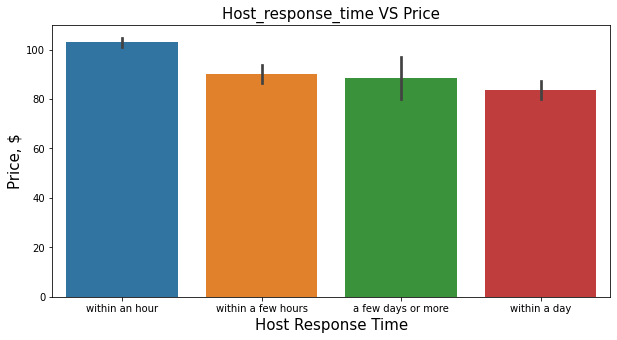

In [74]:
plt.figure(figsize=(10,5))
sns.barplot(out_pri['host_response_time'], out_pri['price'], order = a.index)
plt.ylabel('Price, $', size = 15)
plt.xlabel('Host Response Time', size = 15)
plt.title('Host_response_time VS Price', size = 15)
plt.show()

'Price' with 'Neighborhood'

In [75]:
a1 = out_pri.groupby('neighbourhood_group_cleansed')['price'].mean().sort_values(ascending = False)
a1

neighbourhood_group_cleansed
Eixample                117.002611
Sarri��-Sant Gervasi    102.316406
Sant Mart��              91.211405
Gr��cia                  87.154896
Ciutat Vella             80.937143
Sants-Montju��c          80.179711
Les Corts                77.597674
Horta-Guinard��          68.965732
Sant Andreu              46.882698
Nou Barris               44.636364
Name: price, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



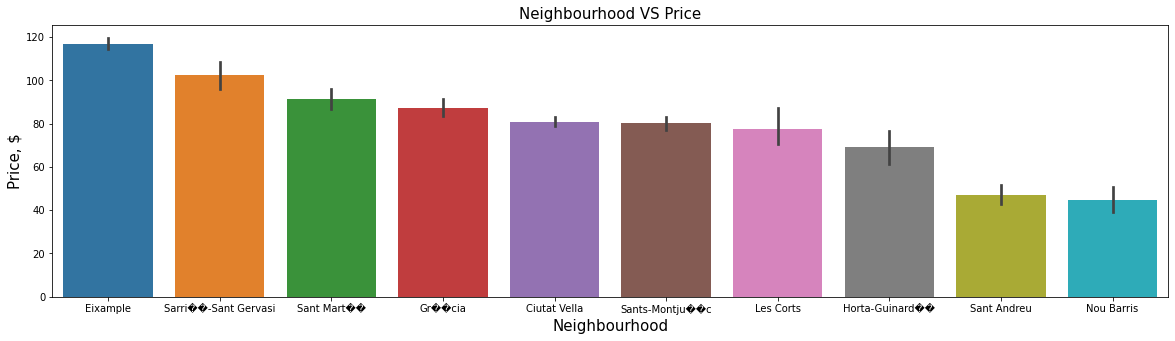

In [76]:
plt.figure(figsize=(20,5))
sns.barplot(out_pri['neighbourhood_group_cleansed'], out_pri['price'], order = a1.iloc[:10].index)
plt.xlabel('Neighbourhood', size = 15)
plt.ylabel('Price, $', size = 15)
plt.title('Neighbourhood VS Price', size = 15)
plt.show()

Price Vs Host_response_Rate

In [91]:
data['host_response_rate']=data['host_response_rate'].replace('%','')
#data['price']=data['price'].str.replace(',','')

#converting
data['host_response_rate']=data['host_response_rate'].astype('float64')
data['host_response_rate']

0         90.0
1         90.0
2         90.0
3         90.0
4         90.0
         ...  
19828    100.0
19829     58.0
19830    100.0
19831    100.0
19832    100.0
Name: host_response_rate, Length: 19833, dtype: float64

In [92]:
a2 = out_pri.groupby('host_response_rate')['price'].mean().sort_values(ascending = False)
a2

host_response_rate
89.0     215.384615
99.0     210.043478
70.0     165.596154
77.0     157.789474
11.0     150.000000
21.0     148.208333
95.0     142.325000
42.0     134.051282
57.0     130.320755
71.0     127.990991
93.0     119.852308
88.0     114.767677
98.0     109.292978
97.0     109.014085
20.0     107.620690
94.0     107.243750
62.0     104.100000
80.0     103.394231
96.0      98.332579
76.0      97.400000
83.0      96.044248
60.0      94.245283
78.0      93.208333
90.0      91.056122
65.0      89.533333
75.0      88.454545
100.0     87.941550
73.0      87.846154
86.0      87.803419
0.0       85.357143
67.0      83.562500
56.0      81.437500
87.0      81.375000
50.0      80.075862
92.0      75.844961
40.0      75.388889
84.0      74.589041
82.0      70.421053
58.0      69.800000
53.0      68.500000
47.0      68.000000
85.0      67.780000
13.0      67.500000
33.0      66.961538
81.0      66.600000
27.0      65.000000
91.0      63.839080
25.0      63.000000
69.0      59.416667
4

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



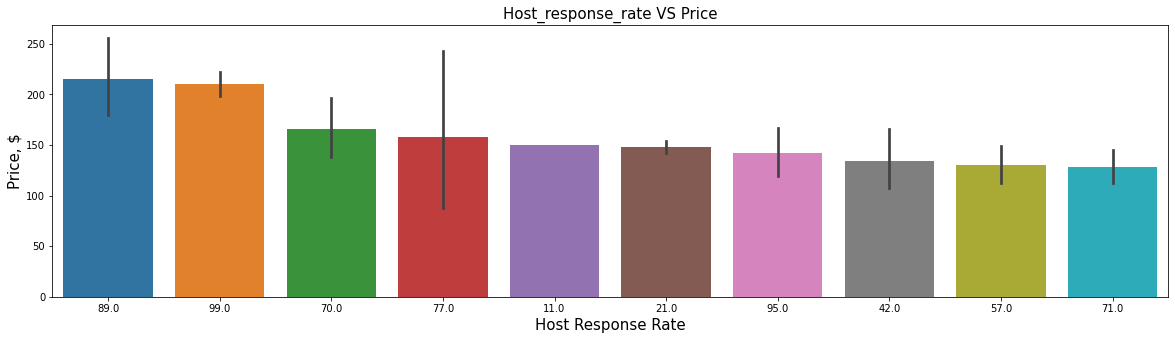

In [93]:
plt.figure(figsize=(20,5))
sns.barplot(out_pri['host_response_rate'], out_pri['price'], order=a2.iloc[:10].index)
plt.title('Host_response_rate VS Price', size = 15)
plt.xlabel('Host Response Rate', size = 15)
plt.ylabel('Price, $', size = 15)
plt.show()

'Price' with 'Superhost'

In [94]:
a3 = out_pri.groupby('host_is_superhost')['price'].mean().sort_values(ascending = False)
a3

host_is_superhost
t    97.772141
f    92.791865
Name: price, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



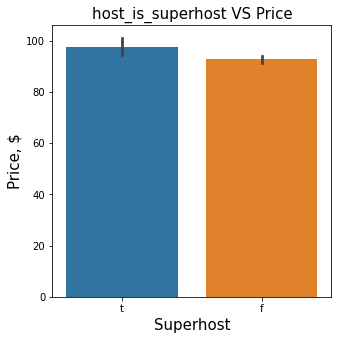

In [424]:
plt.figure(figsize=(5,5))
sns.barplot(out_pri['host_is_superhost'], out_pri['price'], order = a3.index)
plt.title('host_is_superhost VS Price', size = 15)
plt.xlabel('Superhost', size = 15)
plt.ylabel('Price, $', size = 15)
plt.show()

'Price' with 'Property_type':

In [96]:
a3 = out_pri.groupby('property_type')['price'].mean().sort_values(ascending = False)
a3

property_type
Hotel                     282.384615
Boat                      240.826087
Boutique hotel            227.387755
Villa                     209.782609
Serviced apartment        170.004471
Chalet                    136.600000
Townhouse                 119.685714
Aparthotel                118.181818
Hostel                    108.685393
Condominium                91.272222
Loft                       90.582796
Apartment                  90.361659
Camper/RV                  83.857143
Tiny house                 80.875000
House                      80.063660
Farm stay                  77.500000
Other                      73.205882
Dorm                       64.000000
Guest suite                63.059524
Earth house                61.666667
Bed and breakfast          59.164251
Casa particular (Cuba)     55.351351
Barn                       52.500000
Guesthouse                 46.111111
Cottage                    39.000000
Dome house                 35.000000
Cabin                   

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



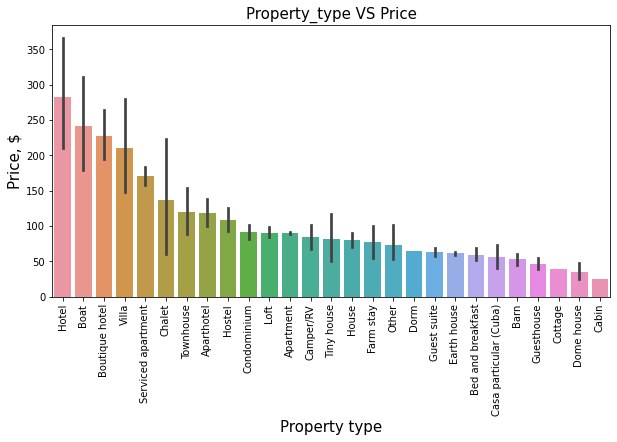

In [97]:
plt.figure(figsize=(10,5))
sns.barplot(out_pri['property_type'], out_pri['price'], order = a3.index)
plt.title('Property_type VS Price', size = 15)
plt.xlabel('Property type', size = 15)
plt.xticks(rotation=90)
plt.ylabel('Price, $', size = 15)
plt.show()

'Price' with 'Room_type':

In [121]:
out_pri.groupby('room_type')['price'].mean().sort_values(ascending = False)

room_type
Entire home/apt    137.341014
Private room        54.431052
Shared room         48.787129
Name: price, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



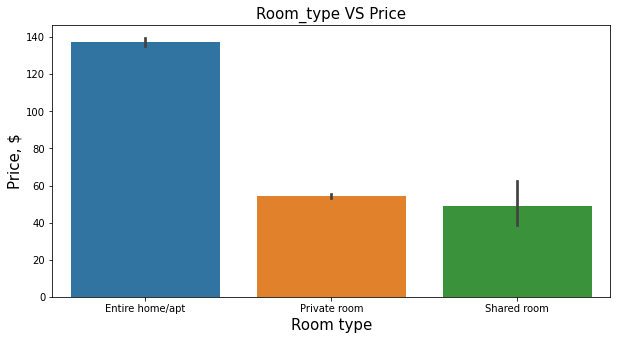

In [99]:
plt.figure(figsize=(10,5))
sns.barplot(out_pri['room_type'], out_pri['price'], order = a3.index)
plt.title('Room_type VS Price', size = 15)
plt.xlabel('Room type', size = 15)
plt.ylabel('Price, $', size = 15)
plt.show()

'Price' with 'Bed_type':

In [100]:
a3 = out_pri.groupby('bed_type')['price'].mean().sort_values(ascending = False)
a3

bed_type
Airbed           224.333333
Couch            178.571429
Real Bed          93.959454
Pull-out Sofa     67.738636
Futon             47.064516
Name: price, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



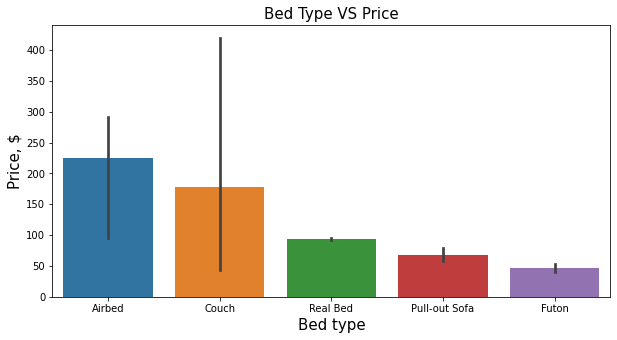

In [101]:
plt.figure(figsize=(10,5))
sns.barplot(out_pri['bed_type'], out_pri['price'], order = a3.index)
plt.title('Bed Type VS Price', size = 15)
plt.xlabel('Bed type', size = 15)
plt.ylabel('Price, $', size = 15)
plt.show()

'Price' with 'Instant_Bookable':

In [102]:
a3 = out_pri.groupby('instant_bookable')['price'].mean().sort_values(ascending = False)
a3

instant_bookable
t    106.616158
f     77.667512
Name: price, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



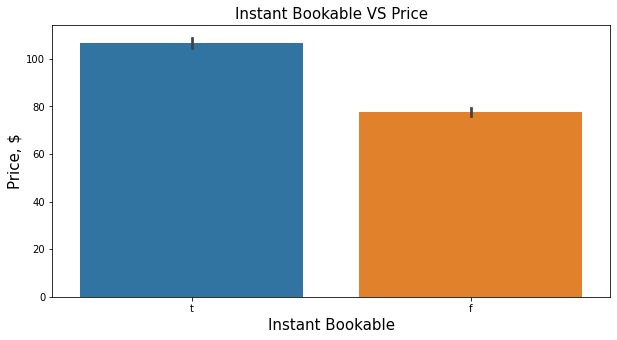

In [103]:
plt.figure(figsize=(10,5))
sns.barplot(out_pri['instant_bookable'], out_pri['price'])
plt.title('Instant Bookable VS Price', size = 15)
plt.xlabel('Instant Bookable', size = 15)
plt.ylabel('Price, $', size = 15)
plt.show()

'Price' with 'Cancellation Policy':

In [104]:
a3 = out_pri.groupby('cancellation_policy')['price'].mean().sort_values(ascending = False)
a3

cancellation_policy
super_strict_60                190.000000
super_strict_30                162.146597
strict_14_with_grace_period     99.839818
moderate                        98.952929
flexible                        73.197100
strict                          40.000000
Name: price, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



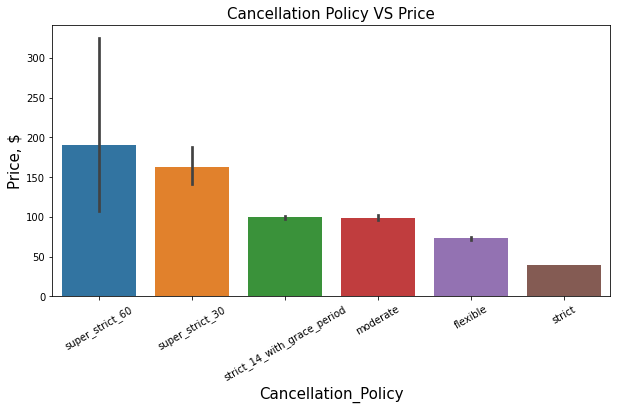

In [105]:
plt.figure(figsize=(10,5))
sns.barplot(out_pri['cancellation_policy'], out_pri['price'], order = a3.index)
plt.title('Cancellation Policy VS Price', size = 15)
plt.xlabel('Cancellation_Policy', size = 15)
plt.ylabel('Price, $', size = 15)
plt.xticks(rotation=30)
plt.show()

'Price' with 'Guest_profile_picture':

In [106]:
a3 = out_pri.groupby('require_guest_profile_picture')['price'].mean().sort_values(ascending = False)
a3

require_guest_profile_picture
f    93.998295
t    80.384615
Name: price, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



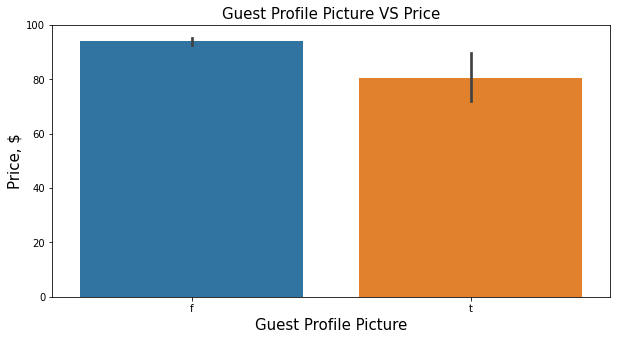

In [108]:
plt.figure(figsize=(10,5))
sns.barplot(out_pri['require_guest_profile_picture'], out_pri['price'], order = a3.index)
plt.title('Guest Profile Picture VS Price', size = 15)
plt.xlabel('Guest Profile Picture', size = 15)
plt.ylabel('Price, $', size = 15)
plt.xticks(rotation=0)
plt.show()

2. 'Security_deposit' Column

'Security_deposit' with 'Host_response_time'

In [615]:
a = out_sec.groupby('host_response_time')['security_deposit'].mean().sort_values(ascending = False) 
a.head(100)

host_response_time
within a day          290.507271
a few days or more    267.194444
within a few hours    241.931423
within an hour        209.298888
Name: security_deposit, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



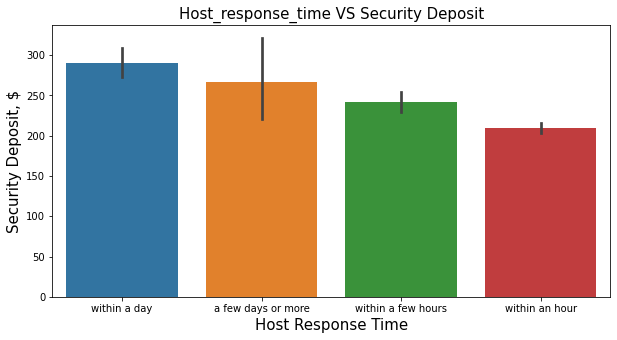

In [616]:
plt.figure(figsize=(10,5))
sns.barplot(out_sec['host_response_time'], out_sec['security_deposit'], order = a.index)
plt.ylabel('Security Deposit, $', size = 15)
plt.xlabel('Host Response Time', size = 15)
plt.title('Host_response_time VS Security Deposit', size = 15)
plt.show()

'Security Deposit' with 'Neighbourhood'

In [617]:
a1 = out_sec.groupby('neighbourhood_group_cleansed')['security_deposit'].mean().sort_values(ascending = False)
a1

neighbourhood_group_cleansed
Sarri��-Sant Gervasi    292.456261
Ciutat Vella            266.594349
Sant Mart��             214.925566
Eixample                211.490459
Sant Andreu             203.876289
Gr��cia                 198.263727
Les Corts               194.714286
Sants-Montju��c         182.392233
Nou Barris              177.073529
Horta-Guinard��         163.328841
Name: security_deposit, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



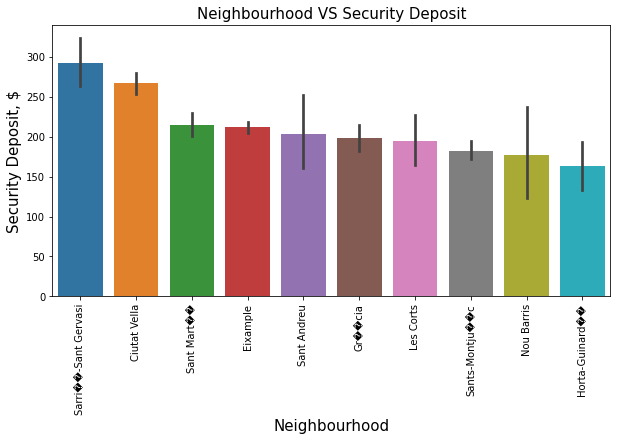

In [618]:
plt.figure(figsize=(10,5))
sns.barplot(out_sec['neighbourhood_group_cleansed'], out_sec['security_deposit'], order = a1.index)
plt.ylabel('Security Deposit, $', size = 15)
plt.xlabel('Neighbourhood', size = 15)
plt.title('Neighbourhood VS Security Deposit', size = 15)
plt.xticks(rotation=90)
plt.show()

Security_Deposit Vs Host_response_Rate

In [109]:
a1 = out_sec.groupby('host_response_rate')['security_deposit'].mean().sort_values(ascending = False)
a1

host_response_rate
20.0     725.925926
79.0     725.294118
84.0     520.000000
86.0     485.660377
97.0     437.213514
33.0     432.352941
31.0     400.000000
56.0     355.000000
83.0     354.512195
71.0     320.691489
21.0     307.407407
60.0     304.645161
47.0     300.000000
40.0     299.916667
70.0     299.416667
64.0     287.500000
67.0     286.071429
25.0     283.333333
53.0     280.000000
89.0     278.688525
96.0     262.253886
99.0     253.033333
30.0     243.750000
85.0     240.135135
50.0     227.500000
65.0     226.923077
90.0     218.818333
100.0    217.436983
92.0     208.394231
0.0      207.155172
98.0     204.667774
82.0     204.545455
94.0     201.580153
88.0     198.545455
93.0     196.405622
81.0     178.571429
75.0     163.389831
78.0     160.000000
80.0     123.927492
72.0     107.142857
95.0     102.298701
77.0     102.058824
73.0     100.000000
17.0     100.000000
11.0     100.000000
22.0     100.000000
91.0      95.098039
29.0      50.000000
63.0      42.857143
5

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



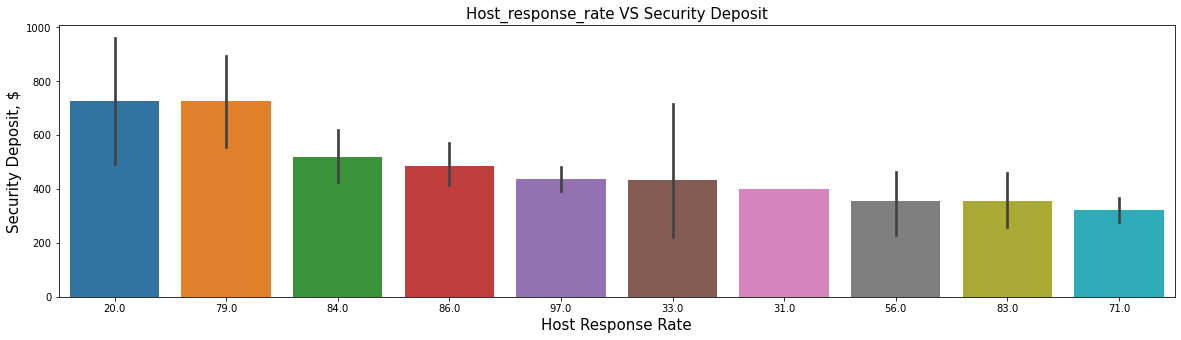

In [111]:
a1 = out_sec.groupby('host_response_rate')['security_deposit'].mean().sort_values(ascending = False)
a1

plt.figure(figsize=(20,5))
sns.barplot(out_sec['host_response_rate'], out_sec['security_deposit'], order=a1.iloc[:10].index)
plt.title('Host_response_rate VS Security Deposit', size = 15)
plt.xlabel('Host Response Rate', size = 15)
plt.ylabel('Security Deposit, $', size = 15)
plt.show()

'Security_Deposit' with 'Superhost'

In [117]:
a3 = out_sec.groupby('host_is_superhost')['security_deposit'].mean().sort_values(ascending = False)
a3

host_is_superhost
f    224.532292
t    209.058783
Name: security_deposit, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



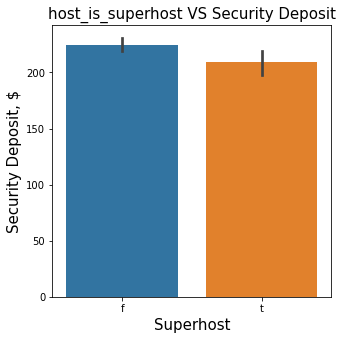

In [118]:
plt.figure(figsize=(5,5))
sns.barplot(out_sec['host_is_superhost'], out_sec['security_deposit'], order = a3.index)
plt.title('host_is_superhost VS Security Deposit', size = 15)
plt.xlabel('Superhost', size = 15)
plt.ylabel('Security Deposit, $', size = 15)
plt.show()

'Security_Deposit' with 'Property_type':

In [119]:
a3 = out_sec.groupby('property_type')['security_deposit'].mean().sort_values(ascending = False)
a3

property_type
Boat                      598.510638
Camper/RV                 430.000000
Serviced apartment        376.216312
Townhouse                 361.458333
Loft                      329.555556
Dorm                      300.000000
Chalet                    270.000000
Cottage                   250.000000
Casa particular (Cuba)    237.142857
House                     225.994536
Apartment                 213.646047
Villa                     212.272727
Other                     206.285714
Condominium               199.546218
Earth house               166.666667
Tiny house                155.000000
Guesthouse                137.727273
Farm stay                 100.000000
Aparthotel                100.000000
Guest suite                96.170732
Hotel                      95.833333
Cabin                      90.000000
Boutique hotel             87.142857
Bed and breakfast          75.952830
Hostel                     47.633333
Barn                       20.000000
Dome house              

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



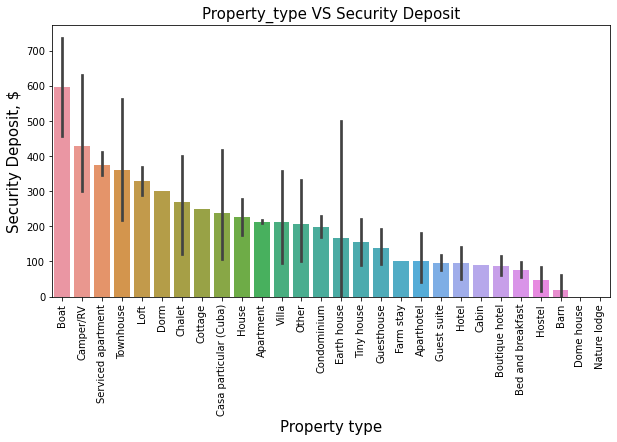

In [120]:
plt.figure(figsize=(10,5))
sns.barplot(out_sec['property_type'], out_sec['security_deposit'], order = a3.index)
plt.title('Property_type VS Security Deposit', size = 15)
plt.xlabel('Property type', size = 15)
plt.xticks(rotation=90)
plt.ylabel('Security Deposit, $', size = 15)
plt.show()

'Security_Deposit' with 'Room_type':

In [124]:
a1 = out_sec.groupby('room_type')['security_deposit'].mean().sort_values(ascending = False)

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



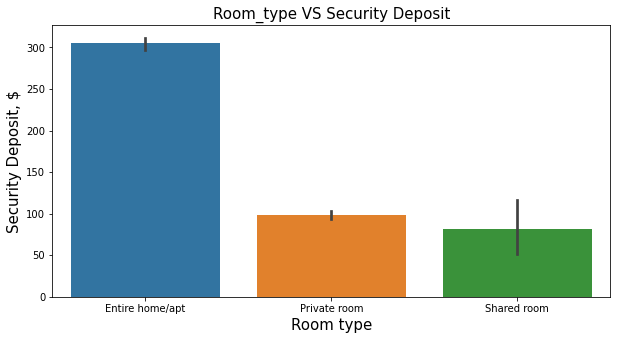

In [125]:
plt.figure(figsize=(10,5))
sns.barplot(out_sec['room_type'], out_sec['security_deposit'], order = a1.index)
plt.title('Room_type VS Security Deposit', size = 15)
plt.xlabel('Room type', size = 15)
plt.ylabel('Security Deposit, $', size = 15)
plt.show()

'Security_Deposit' with 'Bed Type':

In [126]:
a3 = out_sec.groupby('bed_type')['security_deposit'].mean().sort_values(ascending = False)
a3

bed_type
Futon            223.529412
Pull-out Sofa    223.026316
Real Bed         221.464103
Airbed           150.000000
Couch            106.833333
Name: security_deposit, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



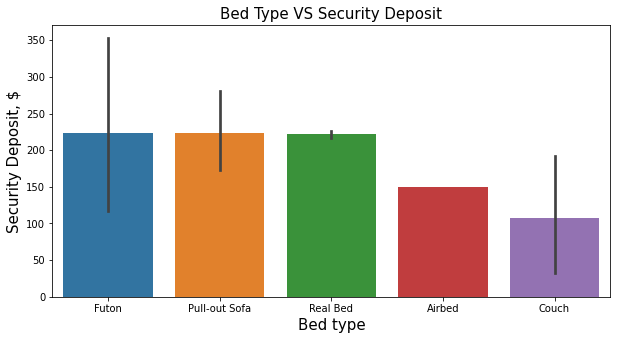

In [127]:
a3 = out_sec.groupby('bed_type')['security_deposit'].mean().sort_values(ascending = False)
a3

plt.figure(figsize=(10,5))
sns.barplot(out_sec['bed_type'], out_sec['security_deposit'], order = a3.index)
plt.title('Bed Type VS Security Deposit', size = 15)
plt.xlabel('Bed type', size = 15)
plt.ylabel('Security Deposit, $', size = 15)
plt.show()security_deposit

'Security_Deposity' with 'Instant Bookable':

In [132]:
a3 = out_sec.groupby('instant_bookable')['security_deposit'].mean().sort_values(ascending = False)
a3

instant_bookable
f    262.330240
t    190.258549
Name: security_deposit, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



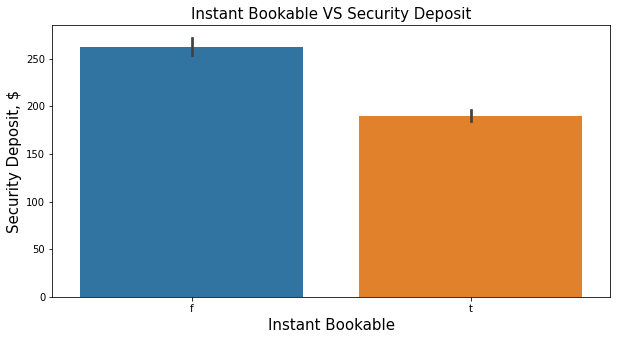

In [133]:
plt.figure(figsize=(10,5))
sns.barplot(out_sec['instant_bookable'], out_sec['security_deposit'], order = a3.index)
plt.title('Instant Bookable VS Security Deposit', size = 15)
plt.xlabel('Instant Bookable', size = 15)
plt.ylabel('Security Deposit, $', size = 15)
plt.show()

'Security_Deposity' with 'Cancellation Policy':

In [137]:
a3 = out_sec.groupby('cancellation_policy')['security_deposit'].mean().sort_values(ascending = False)
a3

cancellation_policy
super_strict_30                311.191710
strict_14_with_grace_period    250.666997
flexible                       205.451196
moderate                       160.535833
super_strict_60                154.545455
Name: security_deposit, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



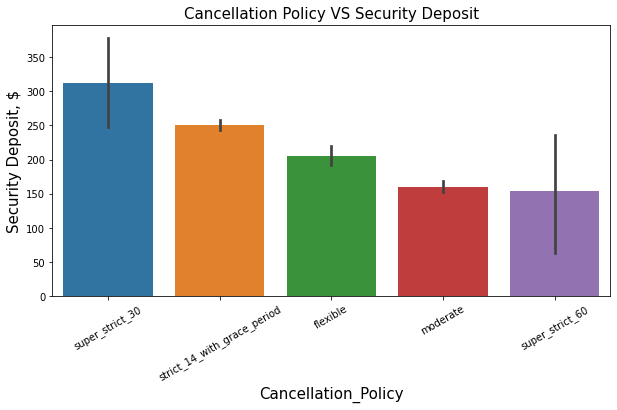

In [138]:
plt.figure(figsize=(10,5))
sns.barplot(out_sec['cancellation_policy'], out_sec['security_deposit'], order = a3.index)
plt.title('Cancellation Policy VS Security Deposit', size = 15)
plt.xlabel('Cancellation_Policy', size = 15)
plt.ylabel('Security Deposit, $', size = 15)
plt.xticks(rotation=30)
plt.show()

'Security_Deposity' with 'Guest_profile_picture':

In [135]:
a3 = out_sec.groupby('require_guest_profile_picture')['security_deposit'].mean().sort_values(ascending = False)
a3

require_guest_profile_picture
t    233.755556
f    221.213469
Name: security_deposit, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



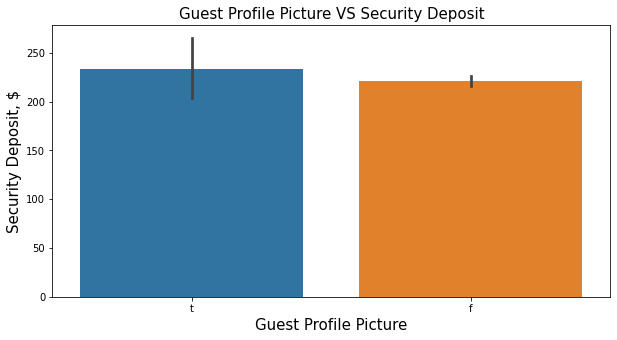

In [136]:
plt.figure(figsize=(10,5))
sns.barplot(out_sec['require_guest_profile_picture'], out_sec['security_deposit'], order = a3.index)
plt.title('Guest Profile Picture VS Security Deposit', size = 15)
plt.xlabel('Guest Profile Picture', size = 15)
plt.ylabel('Security Deposit, $', size = 15)
plt.xticks(rotation=0)
plt.show()

Inference:
1.
2.
3.
4.
5.
6.
7.
8.
9.

3. 'Cleaning_fee' Column

'Cleaning_Fee' with 'Host_response_time'

In [143]:
a = out_cle.groupby('host_response_time')['cleaning_fee'].mean().sort_values(ascending = False) 
a.head(100)

host_response_time
within a day          51.042873
within a few hours    42.431570
within an hour        40.925433
a few days or more    40.508264
Name: cleaning_fee, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



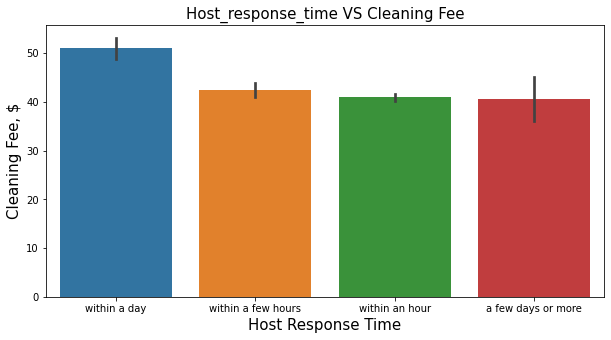

In [144]:
plt.figure(figsize=(10,5))
sns.barplot(out_cle['host_response_time'], out_cle['cleaning_fee'], order = a.index)
plt.ylabel('Cleaning Fee, $', size = 15)
plt.xlabel('Host Response Time', size = 15)
plt.title('Host_response_time VS Cleaning Fee', size = 15)
plt.show()

'Cleaning_Fee' with 'Neighbourhood'

In [146]:
a1 = out_cle.groupby('neighbourhood_group_cleansed')['cleaning_fee'].mean().sort_values(ascending = False)
a1

neighbourhood_group_cleansed
Sarri��-Sant Gervasi    51.957278
Eixample                44.674630
Gr��cia                 43.238169
Ciutat Vella            39.175443
Sant Mart��             38.245614
Sants-Montju��c         37.698931
Horta-Guinard��         33.087356
Les Corts               28.178886
Sant Andreu             24.916300
Nou Barris              17.049383
Name: cleaning_fee, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



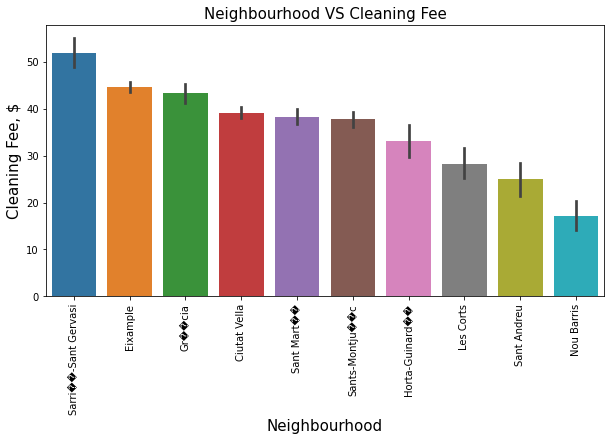

In [147]:
plt.figure(figsize=(10,5))
sns.barplot(out_cle['neighbourhood_group_cleansed'], out_cle['cleaning_fee'], order = a1.index)
plt.ylabel('Cleaning Fee, $', size = 15)
plt.xlabel('Neighbourhood', size = 15)
plt.title('Neighbourhood VS Cleaning Fee', size = 15)
plt.xticks(rotation=90)
plt.show()

Cleaning_Fee Vs Host_Response_Rate

In [148]:
a1 = out_cle.groupby('host_response_rate')['cleaning_fee'].mean().sort_values(ascending = False)
a1

host_response_rate
61.0     145.947368
84.0      77.596154
20.0      66.111111
42.0      65.454545
99.0      65.144986
80.0      64.588889
97.0      61.082687
30.0      54.375000
89.0      54.276923
57.0      53.107527
72.0      52.238095
92.0      50.623932
86.0      50.444444
79.0      48.529412
96.0      47.441527
53.0      46.875000
21.0      45.000000
83.0      44.378947
98.0      42.545198
77.0      40.411765
100.0     39.394596
85.0      38.360465
25.0      38.076923
90.0      37.838957
62.0      37.777778
47.0      37.500000
67.0      37.200000
81.0      36.500000
75.0      36.386667
64.0      36.000000
94.0      35.412162
68.0      35.000000
40.0      35.000000
63.0      31.857143
93.0      31.154930
88.0      30.576271
70.0      30.218978
91.0      30.159420
31.0      30.000000
0.0       29.867470
82.0      29.166667
78.0      28.687500
65.0      28.571429
73.0      28.125000
33.0      28.055556
60.0      26.552632
50.0      26.440476
71.0      23.125000
95.0      21.661765
6

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



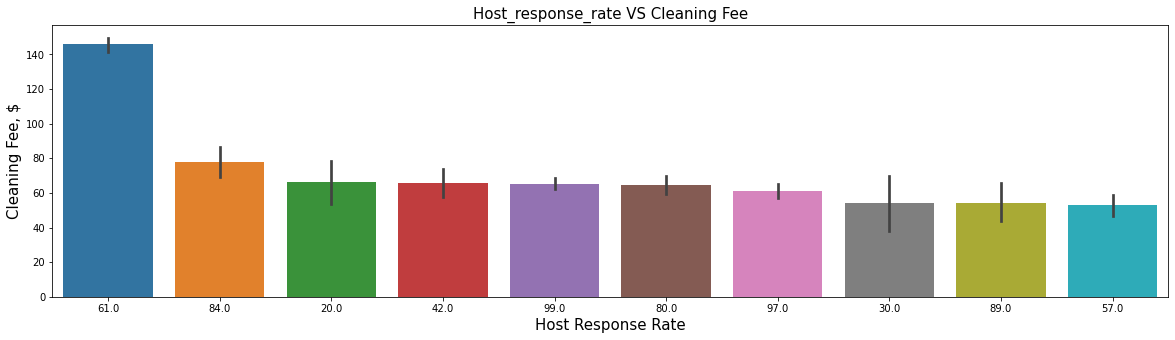

In [149]:
plt.figure(figsize=(20,5))
sns.barplot(out_cle['host_response_rate'], out_cle['cleaning_fee'], order=a1.iloc[:10].index)
plt.title('Host_response_rate VS Cleaning Fee', size = 15)
plt.xlabel('Host Response Rate', size = 15)
plt.ylabel('Cleaning Fee, $', size = 15)
plt.show()

'Cleaning_Fee' with 'SuperHosts'

In [150]:
a3 = out_cle.groupby('host_is_superhost')['cleaning_fee'].mean().sort_values(ascending = False)
a3

host_is_superhost
f    41.774167
t    36.939717
Name: cleaning_fee, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



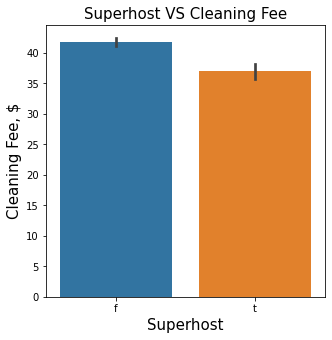

In [151]:
plt.figure(figsize=(5,5))
sns.barplot(out_cle['host_is_superhost'], out_cle['cleaning_fee'], order = a3.index)
plt.title('Superhost VS Cleaning Fee', size = 15)
plt.xlabel('Superhost', size = 15)
plt.ylabel('Cleaning Fee, $', size = 15)
plt.show()

'Cleaning_Fee' with 'Property_type'

In [153]:
a3 = out_cle.groupby('property_type')['cleaning_fee'].mean().sort_values(ascending = False)
a3

property_type
Boat                      79.342105
Serviced apartment        50.689655
Chalet                    49.600000
Loft                      45.749333
Villa                     43.409091
Apartment                 41.766082
Townhouse                 40.290323
Dorm                      40.000000
Condominium               37.872587
Guesthouse                30.000000
House                     28.105991
Camper/RV                 27.800000
Tiny house                27.714286
Guest suite               25.896296
Casa particular (Cuba)    25.588235
Other                     25.244444
Earth house               23.333333
Farm stay                 20.000000
Cottage                   19.000000
Aparthotel                16.000000
Barn                      14.200000
Dome house                12.500000
Bed and breakfast         11.008403
Hostel                     2.383838
Hotel                      0.000000
Nature lodge               0.000000
Cabin                      0.000000
Boutique hotel

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



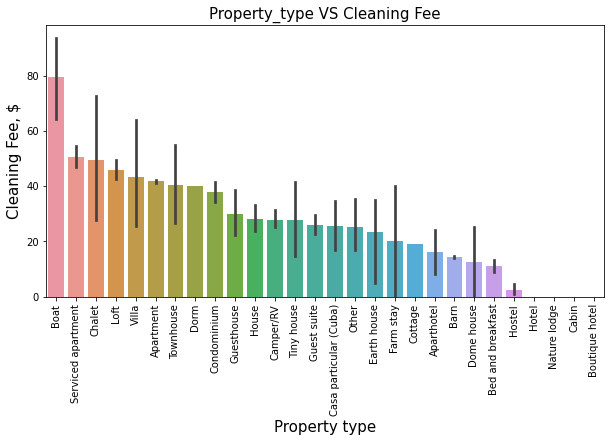

In [154]:
plt.figure(figsize=(10,5))
sns.barplot(out_cle['property_type'], out_cle['cleaning_fee'], order = a3.index)
plt.title('Property_type VS Cleaning Fee', size = 15)
plt.xlabel('Property type', size = 15)
plt.xticks(rotation=90)
plt.ylabel('Cleaning Fee, $', size = 15)
plt.show()

'Cleaning_fee' with 'Room_type':

In [160]:
a3 = out_cle.groupby('room_type')['cleaning_fee'].mean().sort_values(ascending = False)
a3

room_type
Entire home/apt    58.928990
Private room       19.010229
Shared room        10.566038
Name: cleaning_fee, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



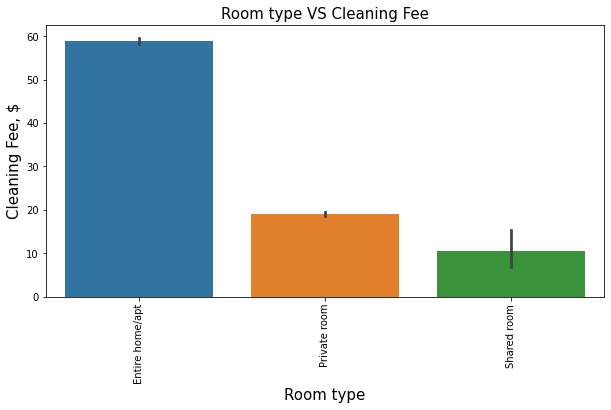

In [161]:
plt.figure(figsize=(10,5))
sns.barplot(out_cle['room_type'], out_cle['cleaning_fee'], order = a3.index)
plt.title('Room type VS Cleaning Fee', size = 15)
plt.xlabel('Room type', size = 15)
plt.xticks(rotation=90)
plt.ylabel('Cleaning Fee, $', size = 15)
plt.show()

'Cleaning_fee' with 'Bed_Type':

In [158]:
a3 = out_cle.groupby('bed_type')['cleaning_fee'].mean().sort_values(ascending = False)
a3

bed_type
Airbed           56.666667
Real Bed         40.876744
Couch            34.333333
Pull-out Sofa    33.569444
Futon            20.250000
Name: cleaning_fee, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



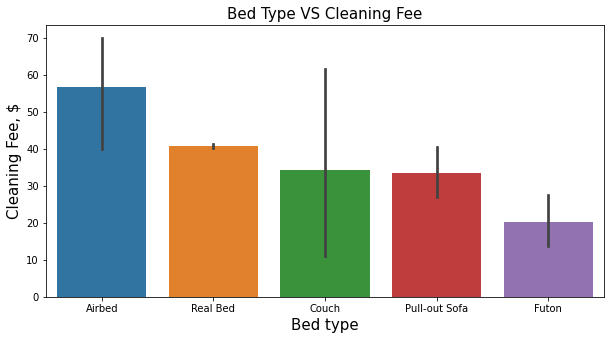

In [159]:
plt.figure(figsize=(10,5))
sns.barplot(out_cle['bed_type'], out_cle['cleaning_fee'], order = a3.index)
plt.title('Bed Type VS Cleaning Fee', size = 15)
plt.xlabel('Bed type', size = 15)
plt.ylabel('Cleaning Fee, $', size = 15)
plt.show()

'Cleaning_fee' with 'Instant Bookable':

In [162]:
a3 = out_cle.groupby('instant_bookable')['cleaning_fee'].mean().sort_values(ascending = False)
a3

instant_bookable
t    40.931248
f    40.658861
Name: cleaning_fee, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



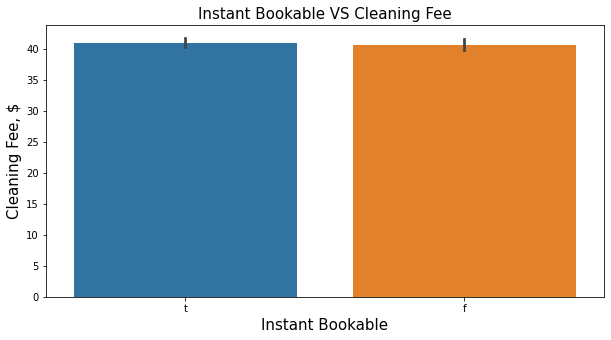

In [163]:
plt.figure(figsize=(10,5))
sns.barplot(out_cle['instant_bookable'], out_cle['cleaning_fee'], order = a3.index)
plt.title('Instant Bookable VS Cleaning Fee', size = 15)
plt.xlabel('Instant Bookable', size = 15)
plt.ylabel('Cleaning Fee, $', size = 15)
plt.show()

'Cleaning_fee' with 'Cancellation Policy':

In [164]:
a3 = out_cle.groupby('cancellation_policy')['cleaning_fee'].mean().sort_values(ascending = False)
a3

cancellation_policy
super_strict_60                45.384615
strict_14_with_grace_period    44.103302
moderate                       40.505841
super_strict_30                37.725000
flexible                       30.587719
strict                         10.000000
Name: cleaning_fee, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



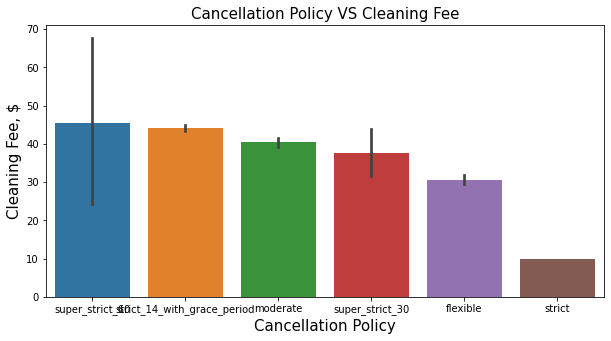

In [165]:
plt.figure(figsize=(10,5))
sns.barplot(out_cle['cancellation_policy'], out_cle['cleaning_fee'], order = a3.index)
plt.title('Cancellation Policy VS Cleaning Fee', size = 15)
plt.xlabel('Cancellation Policy', size = 15)
plt.ylabel('Cleaning Fee, $', size = 15)
plt.show()

'Cleaning_fee' with 'Guest_profile_picture':

In [166]:
a3 = out_cle.groupby('require_guest_profile_picture')['cleaning_fee'].mean().sort_values(ascending = False)
a3

require_guest_profile_picture
t    43.194570
f    40.782812
Name: cleaning_fee, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



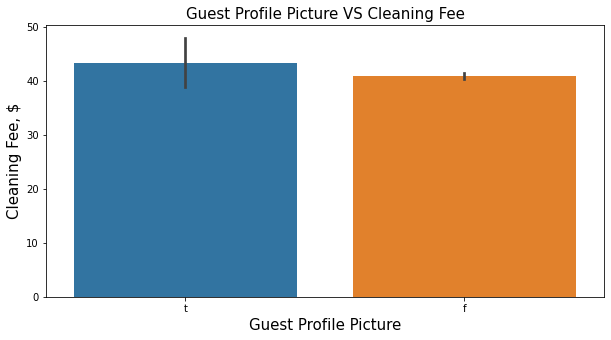

In [167]:
plt.figure(figsize=(10,5))
sns.barplot(out_cle['require_guest_profile_picture'], out_cle['cleaning_fee'], order = a3.index)
plt.title('Guest Profile Picture VS Cleaning Fee', size = 15)
plt.xlabel('Guest Profile Picture', size = 15)
plt.ylabel('Cleaning Fee, $', size = 15)
plt.show()

CORRELATION BETWEEN NUMERICAL FEATURES:

Relation between 'Price', 'security_deposit' and 'cleaning_fee' with 'accomodates', 'bathrooms', 'bedrooms' and 'beds' 

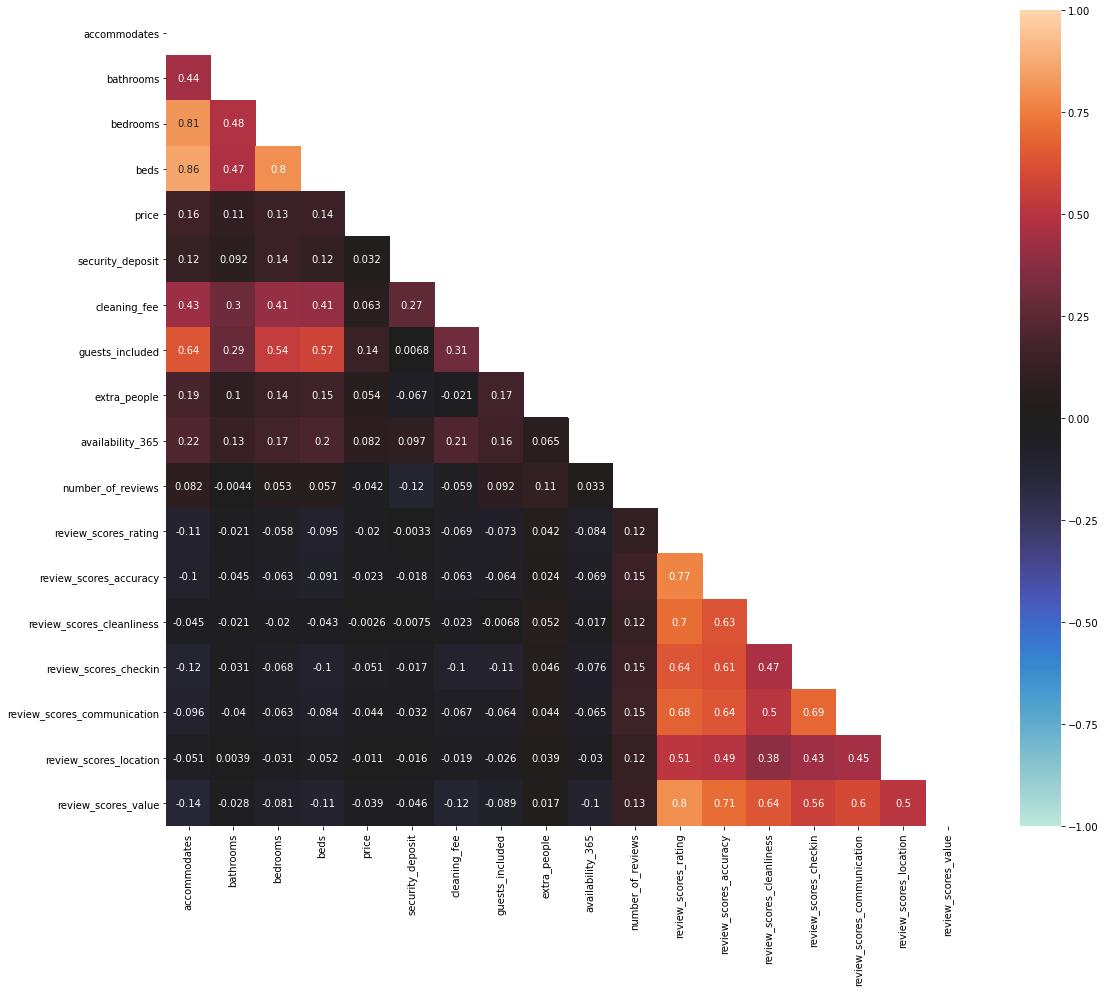

In [488]:
plt.figure(figsize=(18,15))
sns.heatmap(data = data_num1.corr(), annot= True, cmap= 'icefire', vmin= -1, vmax= 1, mask = mask1) 
plt.show()

In [572]:
data3 = data_num.copy()

In [574]:
data3.drop(['id', 'host_id', 'guests_included',
       'extra_people', 'minimum_nights', 'maximum_nights', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'review_scores_rating',
       'review_scores_accuracy', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',
       'calculated_host_listings_count',
       'calculated_host_listings_count_entire_homes',
       'calculated_host_listings_count_private_rooms',
       'calculated_host_listings_count_shared_rooms'], axis = 1, inplace = True)

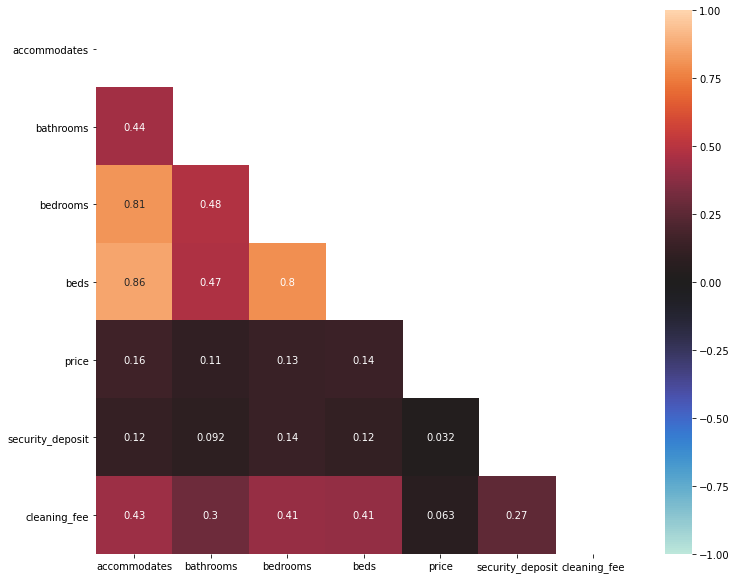

In [576]:
corr = data3.corr()
mask1= np.triu(np.ones_like(corr))

plt.figure(figsize=(12,10))

sns.heatmap(data = corr, annot= True, cmap= 'icefire', vmin= -1, vmax= 1, mask = mask1) 
plt.show()

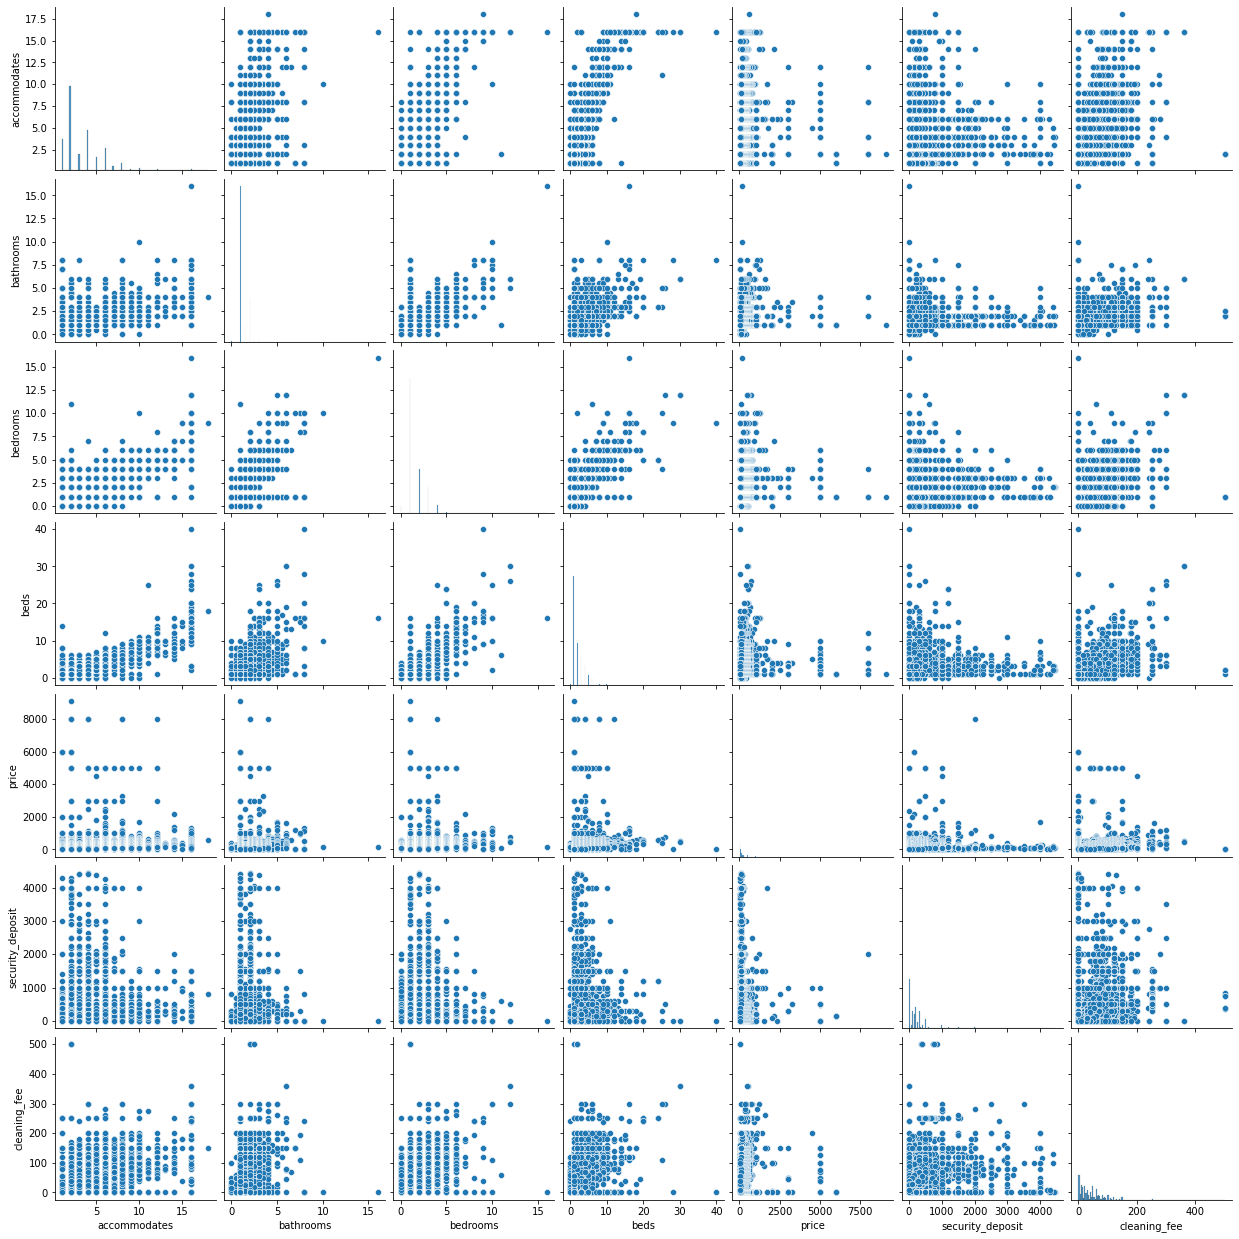

In [582]:
sns.pairplot(data3)

RELATION BETWEEN SUPERHOSTS AND OTHER FEATURES:

SuperHosts Vs Host_response_time:

In [71]:
a = pd.crosstab(df['host_response_time'], df['host_is_superhost'],normalize=True)*100
a

host_is_superhost          f         t
host_response_time                    
a few days or more  2.206180  0.005775
within a day       12.544037  1.282125
within a few hours 13.127346  3.349697
within an hour     51.267687 16.217153

In [68]:
df[df['host_is_superhost']=='t']['host_response_time'].value_counts(normalize=True)*100

within an hour       77.762393
within a few hours   16.062033
within a day          6.147881
a few days or more    0.027693
Name: host_response_time, dtype: float64

In [69]:
df[df['host_is_superhost']=='f']['host_response_time'].value_counts(normalize=True)*100

within an hour       64.776708
within a few hours   16.586398
within a day         15.849387
a few days or more    2.787507
Name: host_response_time, dtype: float64

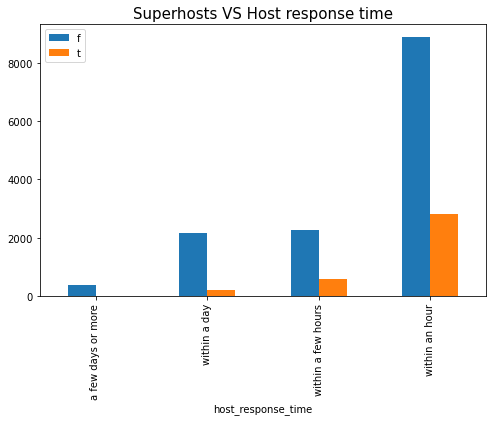

In [60]:
a.plot(kind = 'bar', figsize = (8,5))
plt.legend(loc='upper left')  
plt.xticks(rotation= 90)
plt.title('Superhosts VS Host response time', size = 15)
plt.show()

SuperHosts Vs Neighbourhood:

In [192]:
a = pd.crosstab(data['neighbourhood_group_cleansed'], data['host_is_superhost'])
a

host_is_superhost                f     t
neighbourhood_group_cleansed            
Ciutat Vella                  3784   770
Eixample                      5233  1376
Gr��cia                       1382   318
Horta-Guinard��                512   133
Les Corts                      365    68
Nou Barris                     210    33
Sant Andreu                    296    49
Sant Mart��                   1768   423
Sants-Montju��c               1895   407
Sarri��-Sant Gervasi           652   125

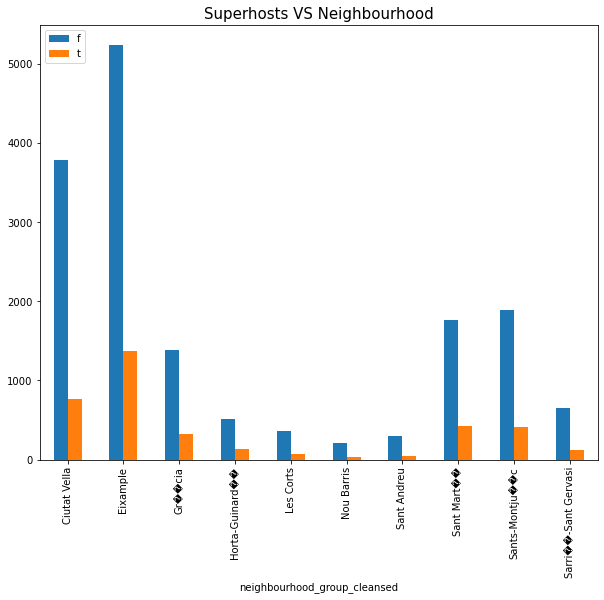

In [197]:
a.plot(kind = 'bar', figsize = (10,8))
plt.legend(loc='upper left')  
plt.xticks(rotation= 90)
plt.title('Superhosts VS Neighbourhood', size = 15)
plt.show()

SuperHosts Vs Host_Response_Rate:

In [237]:
a = data.groupby('host_is_superhost')['host_response_rate'].mean().sort_values(ascending = False)
a

host_is_superhost
t    98.614511
f    92.234603
Name: host_response_rate, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



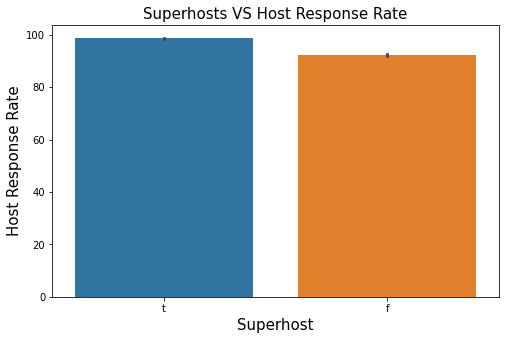

In [238]:
plt.figure(figsize=(8,5))
sns.barplot(data['host_is_superhost'], data['host_response_rate'], order = a.index)
plt.title('Superhosts VS Host Response Rate', size = 15)
plt.xlabel('Superhost', size = 15)
plt.ylabel('Host Response Rate', size = 15)
plt.show()

SuperHosts Vs Review_Scores_Rating:

In [223]:
a = data.groupby('host_is_superhost')['review_scores_rating'].mean().sort_values(ascending = False)
a

host_is_superhost
t    96.532694
f    89.471523
Name: review_scores_rating, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



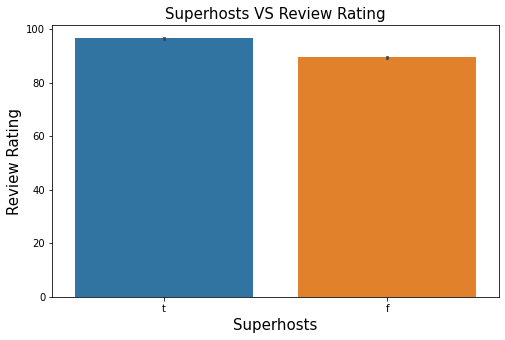

In [239]:
plt.figure(figsize=(8,5))
sns.barplot(data['host_is_superhost'],data['review_scores_rating'], order = a.index)
plt.title('Superhosts VS Review Rating', size = 15)
plt.xlabel('Superhosts', size = 15)
plt.ylabel('Review Rating', size = 15)
plt.show()

SuperHosts Vs Property_Type:

In [242]:
a = pd.crosstab(data['property_type'], data['host_is_superhost'])
a

host_is_superhost           f     t
property_type                      
Aparthotel                 44     0
Apartment               13825  2991
Barn                        7     0
Bed and breakfast         186    34
Boat                       41    11
Boutique hotel             89    34
Cabin                       1     0
Camper/RV                   7     0
Casa particular (Cuba)     36     3
Chalet                      3     2
Condominium               266    94
Cottage                     1     0
Dome house                  6     0
Dorm                        1     0
Earth house                 3     0
Farm stay                   2     0
Guest suite               129    39
Guesthouse                 31     5
Hostel                    164    18
Hotel                      52     0
House                     306    72
Loft                      345   119
Nature lodge                8     0
Other                      58    11
Serviced apartment        441   247
Tiny house                  6     2
Townhouse                  23    12
Villa                      16     8

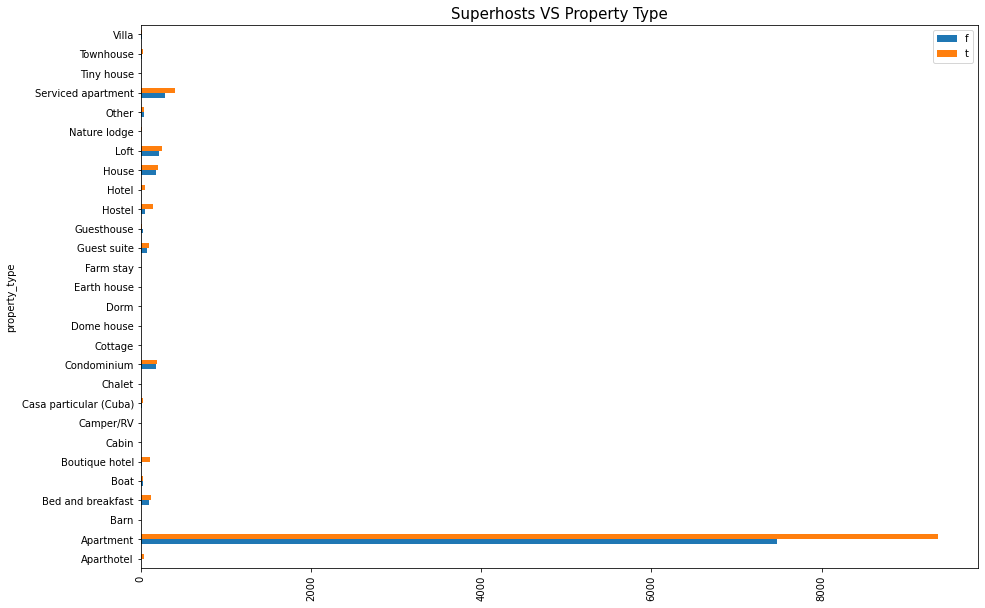

In [246]:
a.plot(kind = 'barh', figsize = (15,10))
plt.legend(loc='upper right')  
plt.xticks(rotation= 90)
plt.title('Superhosts VS Property Type', size = 15)
plt.show()

SuperHosts Vs Number_of_Reviews:

In [240]:
a = data.groupby('host_is_superhost')['number_of_reviews'].mean().sort_values(ascending = False)
a

host_is_superhost
t    66.756348
f    24.965273
Name: number_of_reviews, dtype: float64

C:\Users\New\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



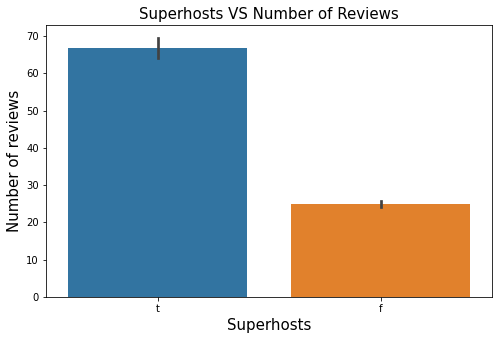

In [241]:
plt.figure(figsize=(8,5))
sns.barplot(data['host_is_superhost'],data['number_of_reviews'], order = a.index)
plt.title('Superhosts VS Number of Reviews', size = 15)
plt.xlabel('Superhosts', size = 15)
plt.ylabel('Number of reviews', size = 15)
plt.show()

SuperHosts Vs Instant_Bookable:

In [252]:
a = pd.crosstab(data['host_is_superhost'], data['instant_bookable'])
a

instant_bookable      f     t
host_is_superhost            
f                  6930  9167
t                  1757  1945

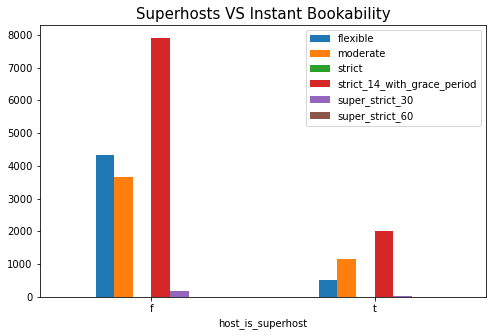

In [259]:
a.plot(kind = 'bar', figsize = (8,5))
plt.legend(loc='upper right')  
plt.xticks(rotation= 0)
plt.title('Superhosts VS Instant Bookability', size = 15)
plt.show()

SuperHosts Vs Cancellation Policy:

In [256]:
a = pd.crosstab(data['host_is_superhost'], data['cancellation_policy'])
a

cancellation_policy  flexible  moderate  strict  strict_14_with_grace_period  \
host_is_superhost                                                              
f                        4332      3661       1                         7903   
t                         509      1169       0                         1999   

cancellation_policy  super_strict_30  super_strict_60  
host_is_superhost                                      
f                                191                9  
t                                 21                4

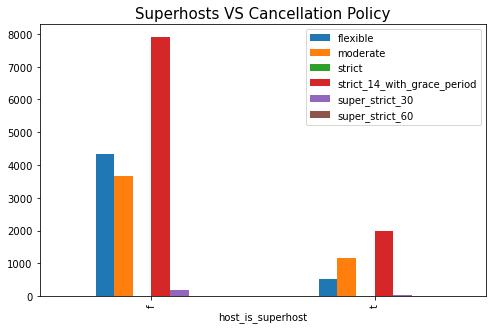

In [260]:
a.plot(kind = 'bar', figsize = (8,5))
plt.legend(loc='upper right')  
plt.xticks(rotation= 90)
plt.title('Superhosts VS Cancellation Policy', size = 15)
plt.show()

SuperHosts Vs Guest_Profile_Picture:

In [261]:
a = pd.crosstab(data['host_is_superhost'], data['require_guest_profile_picture'])
a

require_guest_profile_picture      f    t
host_is_superhost                        
f                              15939  158
t                               3589  113

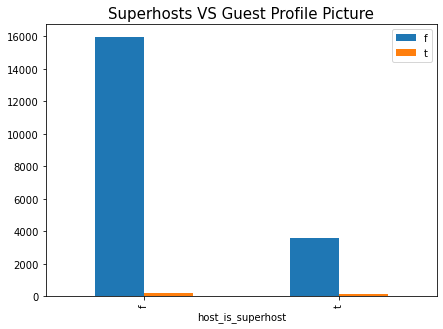

In [263]:
a.plot(kind = 'bar', figsize = (7,5))
plt.legend(loc='upper right')  
plt.xticks(rotation= 90)
plt.title('Superhosts VS Guest Profile Picture', size = 15)
plt.show()

SuperHosts Vs Review_Scores_Communication:

In [61]:
a = df.groupby('host_is_superhost')['review_scores_communication'].mean().sort_values(ascending = False)
a

host_is_superhost
t   9.935774
f   9.458920
Name: review_scores_communication, dtype: float64

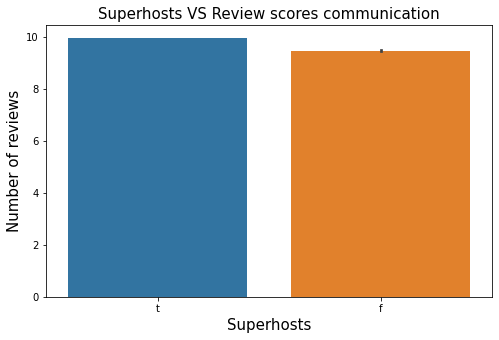

In [64]:
plt.figure(figsize=(8,5))
sns.barplot(df['host_is_superhost'],df['review_scores_communication'], order = a.index)
plt.title('Superhosts VS Review scores communication', size = 15)
plt.xlabel('Superhosts', size = 15)
plt.ylabel('Number of reviews', size = 15)
plt.show()

Host response time vs review_scores_rating

host_response_time
a few days or more    86.494186
within a day          90.370000
within a few hours    91.505510
within an hour        91.048449
Name: review_scores_rating, dtype: float64


<AxesSubplot:xlabel='host_response_time', ylabel='review_scores_rating'>

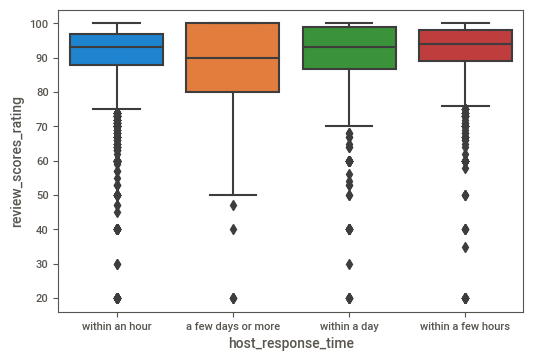

In [56]:
print(data.groupby('host_response_time')['review_scores_rating'].mean())
sns.boxplot(data['host_response_time'],data["review_scores_rating"])

- quicker response leads  to better review score rating

neighbourhood vs review_scores_rating

neighbourhood_group_cleansed
Nou Barris             92.356250
Sant Andreu            92.083682
Horta-Guinardó         91.876797
Gràcia                 91.753155
Eixample               91.434692
Sant Martí             91.375439
Sants-Montjuïc         90.990935
Les Corts              90.355346
Sarrià-Sant Gervasi    90.233840
Ciutat Vella           90.169887
Name: review_scores_rating, dtype: float64


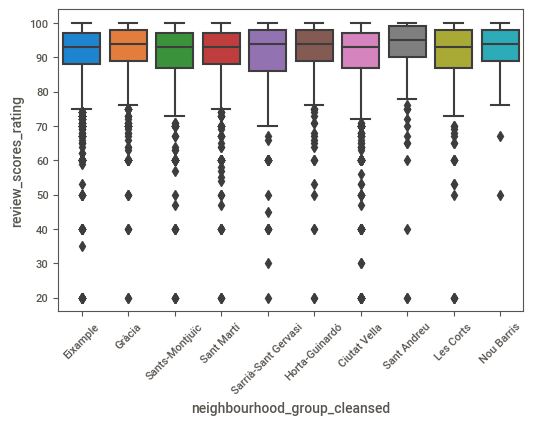

In [10]:
print(data.groupby('neighbourhood_group_cleansed')['review_scores_rating'].mean().sort_values(ascending=False))
sns.boxplot(data['neighbourhood_group_cleansed'],data["review_scores_rating"])
plt.tick_params(axis='x',labelrotation=45)

- Top 3 neighbourhood with highest review score rating on average :
- Nou Barris             92.356250
- Sant Andreu            92.083682
- Horta-Guinardó         91.876797

property_type vs review_scores_rating

property_type
Barn                      96.500000
Boutique hotel            95.734375
Farm stay                 95.000000
Other                     93.940000
Cabin                     93.000000
Chalet                    92.750000
Townhouse                 92.687500
Loft                      92.680672
Guest suite               92.661538
Condominium               92.401408
Boat                      92.380952
Casa particular (Cuba)    92.333333
Serviced apartment        92.065502
House                     91.441406
Apartment                 90.976463
Bed and breakfast         90.771242
Hostel                    89.837838
Villa                     89.000000
Hotel                     88.764706
Dorm                      87.000000
Guesthouse                86.909091
Tiny house                85.200000
Camper/RV                 85.000000
Nature lodge              83.428571
Dome house                82.666667
Aparthotel                82.160000
Cottage                         NaN
Earth house   

<AxesSubplot:xlabel='property_type', ylabel='review_scores_rating'>

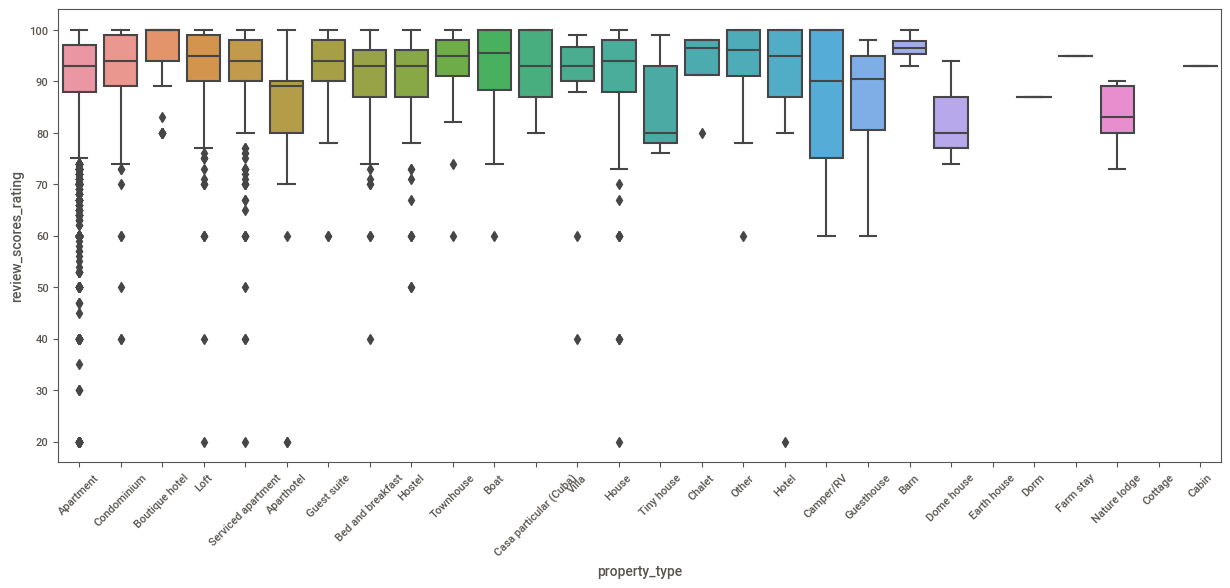

In [11]:
print(data.groupby('property_type')['review_scores_rating'].mean().sort_values(ascending=False))
plt.figure(figsize=(15,6))
plt.tick_params(axis='x',labelrotation=45)
sns.boxplot(data['property_type'],data["review_scores_rating"])

- Top 3 Expensive property with highest review score rating on average :
    
- Barn                      96.500000
- Boutique hotel            95.734375
- Farm stay                 95.000000

room_type vs review_scores_rating

room_type
Private room       94.0
Entire home/apt    92.0
Shared room        89.0
Name: review_scores_rating, dtype: float64


<AxesSubplot:xlabel='room_type', ylabel='review_scores_rating'>

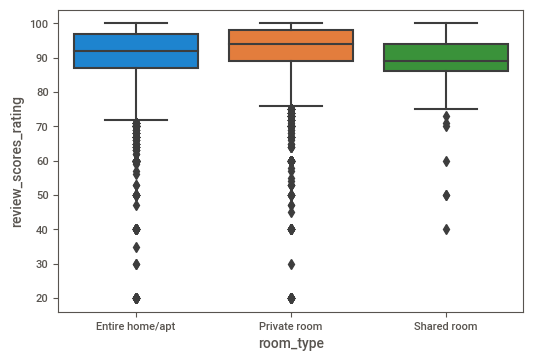

In [14]:
print(data.groupby('room_type')['review_scores_rating'].median().sort_values(ascending=False))
sns.boxplot(data['room_type'],data["review_scores_rating"])

- We can see that the review score rating of :
    
- Private room       94.0
- Entire home/apt    92.0
- Shared room        89.0

bed_type vs review_scores_rating

bed_type
Futon            94.629630
Couch            92.166667
Real Bed         91.091203
Pull-out Sofa    91.024390
Airbed           87.333333
Name: review_scores_rating, dtype: float64


<AxesSubplot:xlabel='bed_type', ylabel='review_scores_rating'>

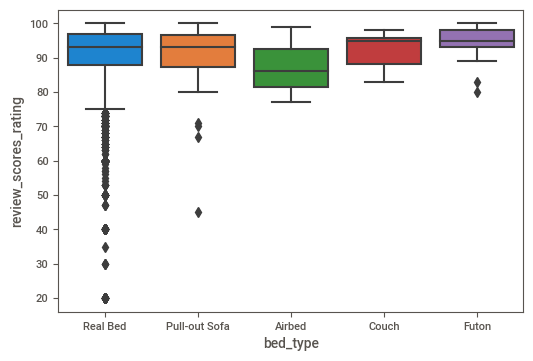

In [15]:
print(data.groupby('bed_type')['review_scores_rating'].mean().sort_values(ascending=False))
sns.boxplot(data['bed_type'],data['review_scores_rating'])

- We can see that the review score rating of bed types:

- Futon            94.629630
- Couch            92.166667
- Real Bed         91.091203
- Pull-out Sofa    91.024390
- Airbed           87.333333

cancellation_policy vs review_scores_rating

cancellation_policy
super_strict_60                93.250000
strict                         93.000000
moderate                       92.051245
flexible                       91.477240
strict_14_with_grace_period    90.487765
super_strict_30                89.020000
Name: review_scores_rating, dtype: float64


<AxesSubplot:xlabel='cancellation_policy', ylabel='review_scores_rating'>

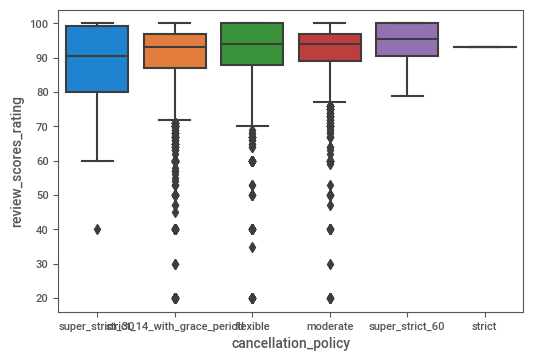

In [16]:
print(data.groupby('cancellation_policy')['review_scores_rating'].mean().sort_values(ascending=False))
sns.boxplot(data['cancellation_policy'],data['review_scores_rating'])

- We can see that the review score rating of different cancelation policy:
    
- super_strict_60                93.250000
- strict                         93.000000
- moderate                       92.051245
- flexible                       91.477240
- strict_14_with_grace_period    90.487765
- super_strict_30                89.020000

Correlation between different review columns

In [79]:
r=reviews.corr()
r.style.background_gradient(cmap='coolwarm')

<AxesSubplot:>

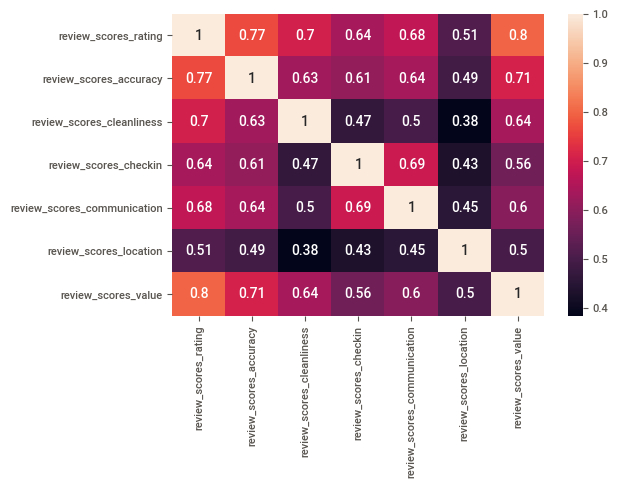

In [81]:
sns.heatmap(reviews.corr(),annot=True)

- We can clearly see that these reviews are highly corelated.There seems to be good correlation between:

- 1.review_scores_rating vs review_scores_checkin
- 2.review_scores_rating vs review_scores_accuracy	
- 3.review_scores_rating vs review_scores_cleanliness	
- 4.review_scores_rating vs review_scores_communication	
- 5.review_scores_rating vs review_scores_location	
- 6.review_scores_rating vs review_scores_value
- 7.review_score_acurracy vs review_scores_value
- 8.review_scores_checkin vs review_scores_communication



### DATA PREPROCESSING

In [65]:
df.head(2)

id  host_id                host_name host_since host_response_time  \
0  531195  2608724  Hector Antonella Alvaro 2012-06-11     within an hour   
1  534550  2608724  Hector Antonella Alvaro 2012-06-11     within an hour   

   host_response_rate host_is_superhost neighbourhood_group_cleansed  \
0           90.000000                 t                     Eixample   
1           90.000000                 t                     Eixample   

  is_location_exact property_type        room_type  accommodates  bathrooms  \
0                 t     Apartment  Entire home/apt            12   2.000000   
1                 t     Apartment  Entire home/apt            10   2.000000   

   bedrooms     beds  bed_type      price  security_deposit  cleaning_fee  \
0  4.000000 8.000000  Real Bed 999.000000        100.000000      0.000000   
1  3.000000 7.000000  Real Bed 999.000000        100.000000      0.000000   

   guests_included  extra_people  minimum_nights  maximum_nights  \
0               12      0.000000               3              90   
1                7      0.000000               3              90   

   availability_365  number_of_reviews  number_of_reviews_ltm  \
0               234                 82                     34   
1               213                 26                      9   

   review_scores_rating  review_scores_accuracy  review_scores_cleanliness  \
0             97.000000               10.000000                  10.000000   
1             99.000000               10.000000                  10.000000   

   review_scores_checkin  review_scores_communication  review_scores_location  \
0              10.000000                    10.000000               10.000000   
1              10.000000                    10.000000               10.000000   

   review_scores_value instant_bookable cancellation_policy  \
0            10.000000                t     super_strict_30   
1            10.000000                t     super_strict_30   

  require_guest_profile_picture require_guest_phone_verification  \
0                             f                                f   
1                             f                                f   

   calculated_host_listings_count  \
0                               3   
1                               3   

   calculated_host_listings_count_entire_homes  \
0                                            3   
1                                            3   

   calculated_host_listings_count_private_rooms  \
0                                             0   
1                                             0   

   calculated_host_listings_count_shared_rooms  
0                                            0  
1                                            0

In [66]:
#Dropping id and host_id features

df_num.drop('id',axis=1,inplace=True)

In [67]:
df_num.head(2)

host_id  host_response_rate  accommodates  bathrooms  bedrooms     beds  \
0  2608724           90.000000            12   2.000000  4.000000 8.000000   
1  2608724           90.000000            10   2.000000  3.000000 7.000000   

       price  security_deposit  cleaning_fee  guests_included  extra_people  \
0 999.000000        100.000000      0.000000               12      0.000000   
1 999.000000        100.000000      0.000000                7      0.000000   

   minimum_nights  maximum_nights  availability_365  number_of_reviews  \
0               3              90               234                 82   
1               3              90               213                 26   

   number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
0                     34             97.000000               10.000000   
1                      9             99.000000               10.000000   

   review_scores_cleanliness  review_scores_checkin  \
0                  10.000000              10.000000   
1                  10.000000              10.000000   

   review_scores_communication  review_scores_location  review_scores_value  \
0                    10.000000               10.000000            10.000000   
1                    10.000000               10.000000            10.000000   

   calculated_host_listings_count  \
0                               3   
1                               3   

   calculated_host_listings_count_entire_homes  \
0                                            3   
1                                            3   

   calculated_host_listings_count_private_rooms  \
0                                             0   
1                                             0   

   calculated_host_listings_count_shared_rooms  
0                                            0  
1                                            0

In [68]:
df_num.shape

(19833, 27)

- We have dropped id since are all unique for each record


- Total number of numeric columns is 27

In [69]:
df_cat.drop('host_name',axis=1,inplace=True)

In [70]:
df_cat.head(2)

host_response_time host_is_superhost neighbourhood_group_cleansed  \
0     within an hour                 t                     Eixample   
1     within an hour                 t                     Eixample   

  is_location_exact property_type        room_type  bed_type instant_bookable  \
0                 t     Apartment  Entire home/apt  Real Bed                t   
1                 t     Apartment  Entire home/apt  Real Bed                t   

  cancellation_policy require_guest_profile_picture  \
0     super_strict_30                             f   
1     super_strict_30                             f   

  require_guest_phone_verification  
0                                f  
1                                f

In [71]:
df_cat.shape

(19833, 11)

- We have dropped host_name since are already we have a host_id in numerical dataframe


- Total categorical features is 11

In [72]:
df_date.shape

(19833, 1)

- We have one datetime feature

#### Null Value treatment

In [73]:
df_num.isnull().sum()/len(df_num)*100

host_id                                         0.000000
host_response_rate                             12.696012
accommodates                                    0.000000
bathrooms                                       0.045379
bedrooms                                        0.015126
beds                                            0.171431
price                                           0.000000
security_deposit                               28.896284
cleaning_fee                                   20.516311
guests_included                                 0.000000
extra_people                                    0.000000
minimum_nights                                  0.000000
maximum_nights                                  0.000000
availability_365                                0.000000
number_of_reviews                               0.000000
number_of_reviews_ltm                           0.000000
review_scores_rating                           24.439066
review_scores_accuracy         

- We can observe that following numeric columns have null values :
  
  
- security_deposit(28.89%)
    
- review_scores_rating (24.43%)
    
- review_scores_accuracy (24.47%)
    
- review_scores_cleanliness (24.47%)
    
- review_scores_checkin (24.50%)
    
- review_scores_communication (24.45%)
    
- review_scores_location (24.49%)
    
- review_scores_value (24.48%)

NUMERIC COLUMNS

#### Doing model based imputation using K Nearest Neighbours Imputer

In order to impute the data using KNN imputer we need to normalize the values since the scales for each feature are different and KNN is a distance based imputation technique

Normalizing the data using Standard Scaler

In [74]:
scaler=StandardScaler()
df_num_scaled=pd.DataFrame(scaler.fit_transform(df_num),index=df_num.index,columns=df_num.columns)
df_num_scaled.head(3)

host_id  host_response_rate  accommodates  bathrooms  bedrooms     beds  \
0 -0.939675           -0.234284      3.939705   1.060178  2.396972 3.052029   
1 -0.939675           -0.234284      3.029053   1.060178  1.411547 2.520531   
2 -0.927172           -0.234284      1.207751   1.060178  2.396972 1.457534   

     price  security_deposit  cleaning_fee  guests_included  extra_people  \
0 2.050468         -0.352161     -1.004425         6.460770     -0.587585   
1 2.050468         -0.352161     -1.004425         3.274025     -0.587585   
2 2.050468          0.113936     -1.004425         0.087281      1.435487   

   minimum_nights  maximum_nights  availability_365  number_of_reviews  \
0       -0.307354       -0.010071          0.501265           0.843358   
1       -0.307354       -0.010071          0.335388          -0.116913   
2       -0.307354       -0.010059         -1.299686          -0.511309   

   number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
0               1.206581              0.613679                0.620474   
1              -0.189980              0.821596                0.620474   
2              -0.581017              0.197845                0.620474   

   review_scores_cleanliness  review_scores_checkin  \
0                   0.714223               0.479570   
1                   0.714223               0.479570   
2                  -0.246671               0.479570   

   review_scores_communication  review_scores_location  review_scores_value  \
0                     0.485780                0.535948             0.927602   
1                     0.485780                0.535948             0.927602   
2                    -1.769552               -0.769913            -0.038849   

   calculated_host_listings_count  \
0                       -0.378759   
1                       -0.378759   
2                       -0.073654   

   calculated_host_listings_count_entire_homes  \
0                                    -0.316136   
1                                    -0.316136   
2                                    -0.007203   

   calculated_host_listings_count_private_rooms  \
0                                     -0.262232   
1                                     -0.262232   
2                                     -0.262232   

   calculated_host_listings_count_shared_rooms  
0                                    -0.095954  
1                                    -0.095954  
2                                    -0.095954

In [75]:
df_num_scaled.describe().T

count      mean      std  \
host_id                                      19,833.000000 -0.000000 1.000025   
host_response_rate                           17,315.000000 -0.000000 1.000029   
accommodates                                 19,833.000000  0.000000 1.000025   
bathrooms                                    19,824.000000 -0.000000 1.000025   
bedrooms                                     19,830.000000 -0.000000 1.000025   
beds                                         19,799.000000 -0.000000 1.000025   
price                                        19,833.000000 -0.000000 1.000025   
security_deposit                             14,102.000000 -0.000000 1.000035   
cleaning_fee                                 15,764.000000  0.000000 1.000032   
guests_included                              19,833.000000  0.000000 1.000025   
extra_people                                 19,833.000000 -0.000000 1.000025   
minimum_nights                               19,833.000000  0.000000 1.000025   
maximum_nights                               19,833.000000  0.000000 1.000025   
availability_365                             19,833.000000 -0.000000 1.000025   
number_of_reviews                            19,833.000000  0.000000 1.000025   
number_of_reviews_ltm                        19,833.000000  0.000000 1.000025   
review_scores_rating                         14,986.000000 -0.000000 1.000033   
review_scores_accuracy                       14,978.000000  0.000000 1.000033   
review_scores_cleanliness                    14,978.000000  0.000000 1.000033   
review_scores_checkin                        14,973.000000  0.000000 1.000033   
review_scores_communication                  14,982.000000 -0.000000 1.000033   
review_scores_location                       14,975.000000 -0.000000 1.000033   
review_scores_value                          14,976.000000 -0.000000 1.000033   
calculated_host_listings_count               19,833.000000 -0.000000 1.000025   
calculated_host_listings_count_entire_homes  19,833.000000  0.000000 1.000025   
calculated_host_listings_count_private_rooms 19,833.000000 -0.000000 1.000025   
calculated_host_listings_count_shared_rooms  19,833.000000 -0.000000 1.000025   

                                                   min       25%       50%  \
host_id                                      -0.968876 -0.883715 -0.480694   
host_response_rate                           -6.148687  0.094294  0.422872   
accommodates                                 -1.068878 -0.613552 -0.613552   
bathrooms                                    -2.048151 -0.493987 -0.493987   
bedrooms                                     -1.544726 -0.559302 -0.559302   
beds                                         -1.199959 -0.668460 -0.136962   
price                                        -0.289217 -0.211385 -0.152421   
security_deposit                             -0.585209 -0.585209 -0.235637   
cleaning_fee                                 -1.004425 -0.772003 -0.307159   
guests_included                              -0.550068 -0.550068 -0.550068   
extra_people                                 -0.587585 -0.587585 -0.587585   
minimum_nights                               -0.418688 -0.418688 -0.363021   
maximum_nights                               -0.010076 -0.010073 -0.010023   
availability_365                             -1.347080 -0.960033 -0.083255   
number_of_reviews                            -0.562752 -0.545605 -0.442719   
number_of_reviews_ltm                        -0.692741 -0.692741 -0.469292   
review_scores_rating                         -7.391134 -0.321948  0.197845   
review_scores_accuracy                       -7.663393 -0.415009  0.620474   
review_scores_cleanliness                    -6.972927 -0.246671  0.714223   
review_scores_checkin                        -8.455695 -0.637338  0.479570   
review_scores_communication                  -8.535548 -0.641886  0.485780   
review_scores_location                       -9.910946 -0.769913  0.

- We can see that all the numerical features have been scaled and their values are the respective Z-scores

Imputing missing values

In [76]:
knn_imp=KNNImputer(n_neighbors=5,weights='distance')

df_num_imp=pd.DataFrame(knn_imp.fit_transform(df_num_scaled),index=df_num_scaled.index,columns=df_num_scaled.columns)

In [77]:
#showing the imputed dataframe
df_num_imp.head()

host_id  host_response_rate  accommodates  bathrooms  bedrooms      beds  \
0 -0.939675           -0.234284      3.939705   1.060178  2.396972  3.052029   
1 -0.939675           -0.234284      3.029053   1.060178  1.411547  2.520531   
2 -0.927172           -0.234284      1.207751   1.060178  2.396972  1.457534   
3 -0.927172           -0.234284     -0.613552  -0.493987 -0.559302 -0.668460   
4 -0.927172           -0.234284      0.297099  -0.493987  0.426123  0.394537   

     price  security_deposit  cleaning_fee  guests_included  extra_people  \
0 2.050468         -0.352161     -1.004425         6.460770     -0.587585   
1 2.050468         -0.352161     -1.004425         3.274025     -0.587585   
2 2.050468          0.113936     -1.004425         0.087281      1.435487   
3 2.050468          0.113936     -1.004425        -0.550068      1.435487   
4 2.050468          0.113936     -1.004425        -0.550068      1.435487   

   minimum_nights  maximum_nights  availability_365  number_of_reviews  \
0       -0.307354       -0.010071          0.501265           0.843358   
1       -0.307354       -0.010071          0.335388          -0.116913   
2       -0.307354       -0.010059         -1.299686          -0.511309   
3       -0.307354       -0.010059         -0.012164          -0.374128   
4       -0.307354       -0.010059         -1.283889          -0.511309   

   number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
0               1.206581              0.613679                0.620474   
1              -0.189980              0.821596                0.620474   
2              -0.581017              0.197845                0.620474   
3              -0.245842              0.197845               -0.415009   
4              -0.692741             -0.425907               -0.415009   

   review_scores_cleanliness  review_scores_checkin  \
0                   0.714223               0.479570   
1                   0.714223               0.479570   
2                  -0.246671               0.479570   
3                   0.714223               0.479570   
4                  -0.246671              -2.871154   

   review_scores_communication  review_scores_location  review_scores_value  \
0                     0.485780                0.535948             0.927602   
1                     0.485780                0.535948             0.927602   
2                    -1.769552               -0.769913            -0.038849   
3                     0.485780                0.535948            -0.038849   
4                    -2.897218               -0.769913            -1.005300   

   calculated_host_listings_count  \
0                       -0.378759   
1                       -0.378759   
2                       -0.073654   
3                       -0.073654   
4                       -0.073654   

   calculated_host_listings_count_entire_homes  \
0                                    -0.316136   
1                                    -0.316136   
2                                    -0.007203   
3                                    -0.007203   
4                                    -0.007203   

   calculated_host_listings_count_private_rooms  \
0                                     -0.262232   
1                                     -0.262232   
2                                     -0.262232   
3                                     -0.262232   
4                                     -0.262232   

   calculated_host_listings_count_shared_rooms  
0                                    -0.095954  
1                                    -0.095954  
2                                    -0.095954  
3                                    -0.095954  
4                                    -0.095954

In [78]:
#showing the count of null values
df_num_imp.isnull().sum()

host_id                                         0
host_response_rate                              0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0
beds                                            0
price                                           0
security_deposit                                0
cleaning_fee                                    0
guests_included                                 0
extra_people                                    0
minimum_nights                                  0
maximum_nights                                  0
availability_365                                0
number_of_reviews                               0
number_of_reviews_ltm                           0
review_scores_rating                            0
review_scores_accuracy                          0
review_scores_cleanliness                       0
review_scores_checkin                           0


- We can see that all the null values have been imputed using the KNN model based imputation technique

CATEGORICAL COLUMNS

In [79]:
df_cat.isnull().sum()/len(df_cat)*100

host_response_time                 12.696012
host_is_superhost                   0.171431
neighbourhood_group_cleansed        0.000000
is_location_exact                   0.000000
property_type                       0.000000
room_type                           0.000000
bed_type                            0.000000
instant_bookable                    0.000000
cancellation_policy                 0.000000
require_guest_profile_picture       0.000000
require_guest_phone_verification    0.000000
dtype: float64

- We can see that the following columns have null values:

    
- host_response_time(12.69%)
- host_is_superhost(0.17%)

Imputing Host_is_superhost column

<AxesSubplot:xlabel='host_is_superhost', ylabel='review_scores_rating'>

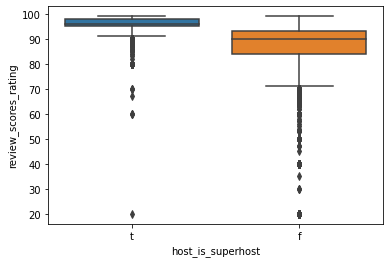

In [44]:
sns.boxplot(df['host_is_superhost'],df[df['review_scores_rating']<df['review_scores_rating'].quantile(0.99)]['review_scores_rating'])

In [332]:
df_cat[df_cat['host_is_superhost']=='t']['review_scores_rating'].describe()

count   3,441.000000
mean       96.532694
std         3.592813
min        20.000000
25%        95.000000
50%        97.000000
75%        99.000000
max       100.000000
Name: review_scores_rating, dtype: float64

In [333]:
df_cat[df_cat['host_is_superhost']=='f']['review_scores_rating'].describe()

count   11,518.000000
mean        89.471523
std         10.248125
min         20.000000
25%         86.000000
50%         91.000000
75%         96.000000
max        100.000000
Name: review_scores_rating, dtype: float64

- We can observe that around 75% percentage of the hosts that are super-hosts have their review scores rating below 96 and 25% of the hosts that are not super-hosts have their review scores rating below 95. There fore we are taking 95 as the cut off value for classifying whether a missing record is a super-hosts or not a super-host. There will be an approximated 25% misclassification error when using this technique

In [80]:
#Imputing host_is_superhost feature

ind=df_cat[df_cat['host_is_superhost'].isnull()].index

for i in ind:
    if df_num.loc[i,'review_scores_rating'] < 95:
        df_cat.loc[i,'host_is_superhost']='f'
    else:
        df_cat.loc[i,'host_is_superhost']='t'

In [81]:
df_cat['host_is_superhost'].isnull().sum()

0

- We have successfully imputed host_is_superhost column and removed all null values

Imputing Host_response_time column

In [82]:
df['host_response_time'].value_counts(normalize=True)*100

within an hour       67.484840
within a few hours   16.477043
within a day         13.826162
a few days or more    2.211955
Name: host_response_time, dtype: float64

In [83]:
# Most common category (MODE)

df_cat['host_response_time'].mode().values[0]

'within an hour'

In [84]:
# Doing mode imputation

ind_hrt=df_cat[df_cat['host_response_time'].isnull()].index

for i in ind_hrt:
        df_cat.loc[i,'host_response_time']=df_cat['host_response_time'].mode().values[0]

In [35]:
df_cat_copy.isnull().sum()

NameError: name 'df_cat_copy' is not defined

- We can see that all the null values in the categorical columns have been imputed

DATETIME COLUMNS

In [85]:
df_date.isnull().sum()

host_since    34
dtype: int64

- We have totally 34 null values in host_since column

In [86]:
# most common value
df_date['host_since'].mode().values[0]

numpy.datetime64('2012-12-21T00:00:00.000000000')

In [87]:
# Doing mode imputation

ind_dt=df_date[df_date['host_since'].isnull()].index

for i in ind_dt:
        df_date.loc[i,'host_since']=df_date['host_since'].mode().values[0]

In [88]:
df_date['host_since'].isnull().sum()

0

- We can see that the null values have been imputed for the datetime columns

### OUTLIER TREATMENT

Visualizing the outliers

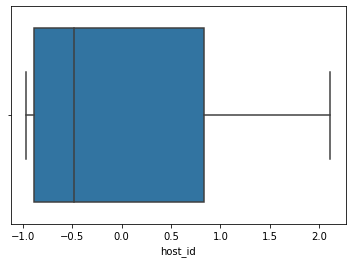

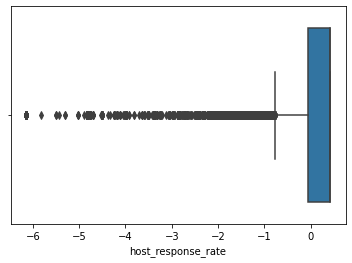

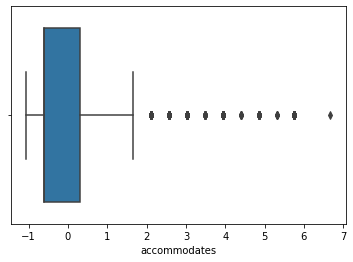

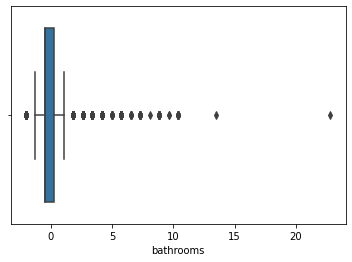

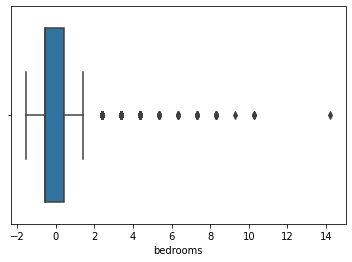

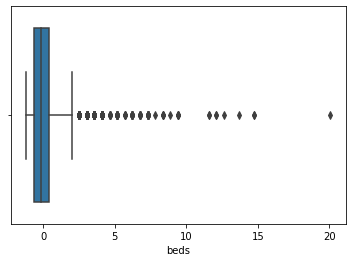

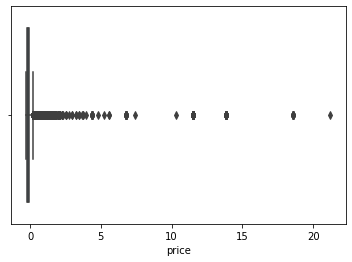

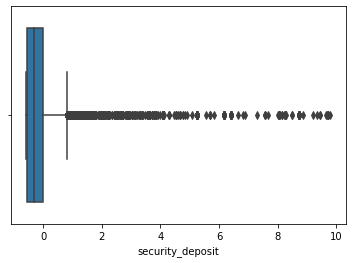

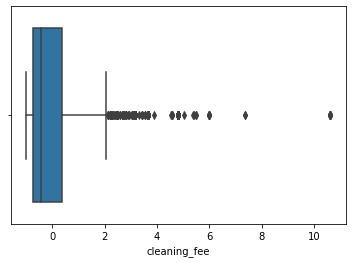

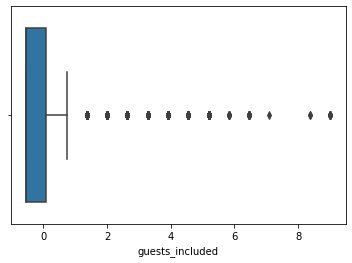

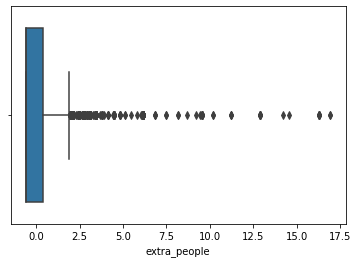

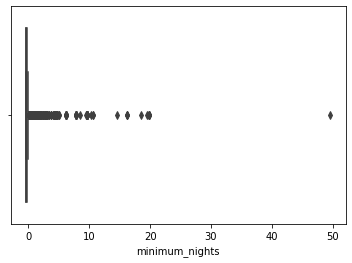

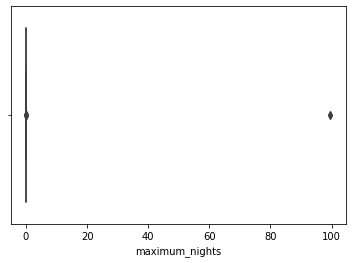

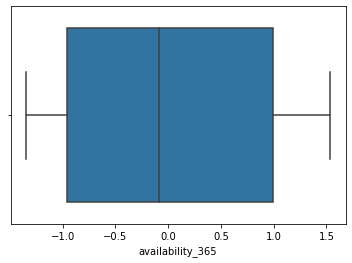

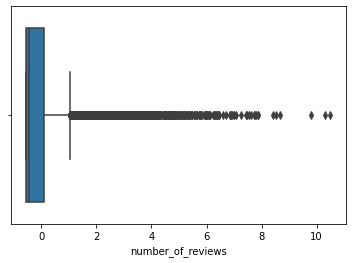

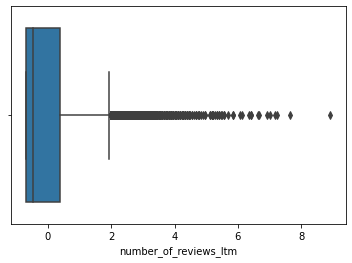

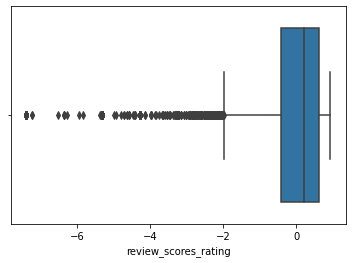

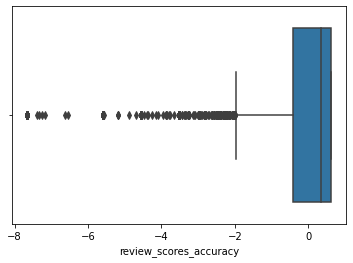

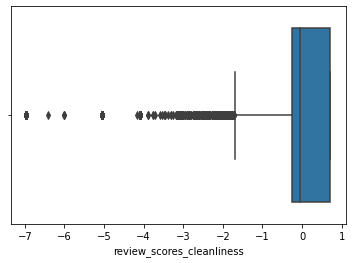

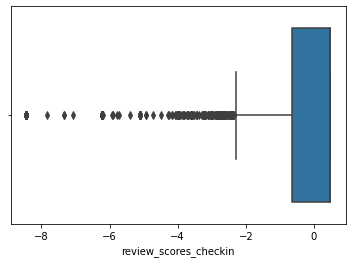

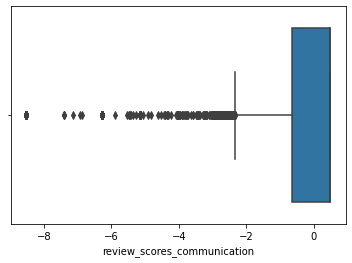

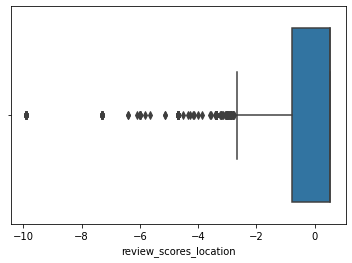

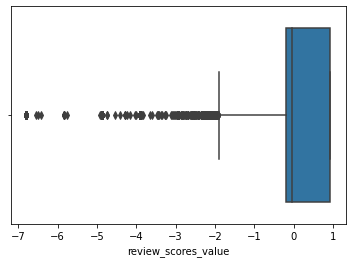

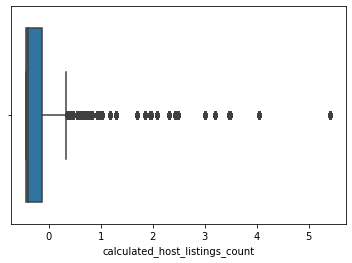

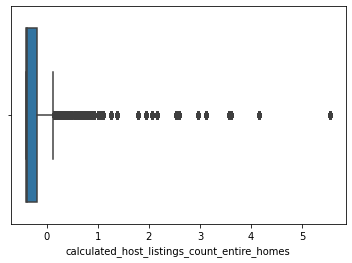

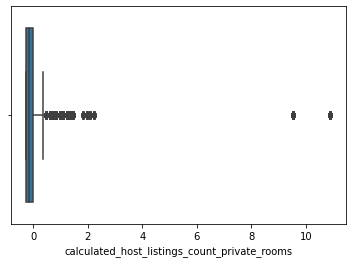

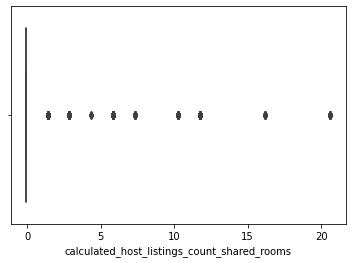

In [89]:
for i in df_num_imp.columns:
    sns.boxplot(df_num_imp[i])
    plt.show()

- We can see that there are outliers for the following features:

    
- upper bound outliers:

- accomodates,bedrooms,beds,price,security_deposit,cleaning_fee,guests_included
- extra_people,maximum_nights,number_of_reviews,number_of_reviews_ltm,
- calculated_host_listings_count,calculated_host_listings_entire_homes,calculated_host_listings_private_rooms,
- calculated_host_listings_shared_rooms


- lower bound outliers:

- host_reponse_rate,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,
- review_scores_communication,review_scores_lcoation,review_scores_value

In [90]:
# Capping all the outliers at the 99th quantile of thier respective features

for i in df_num_imp.columns:
    q3=df_num_imp[i].quantile(0.75)
    q1=df_num_imp[i].quantile(0.25)
    iqr = q3-q1
    ub= q3 + (1.5*iqr)
    lb= q1 - (1.5*iqr)
    uc= df_num_imp[i].quantile(0.99)
    lc= df_num_imp[i].quantile(0.01)
    
    for j in df_num_imp[i].index:
        if df_num_imp.loc[j,i]>ub:
            df_num_imp.loc[j,i] = uc
        if df_num_imp.loc[j,i]<lb:
            df_num_imp.loc[j,i] = lc

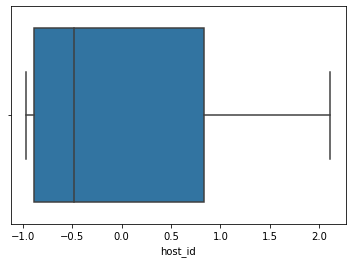

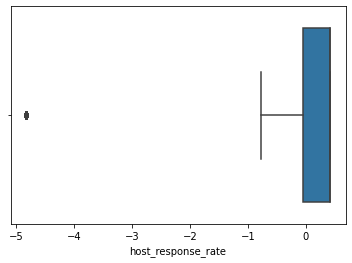

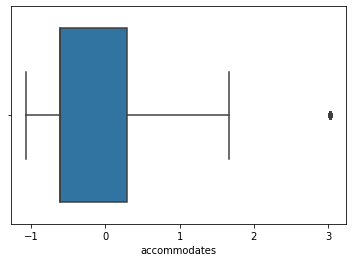

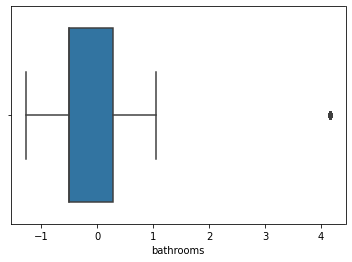

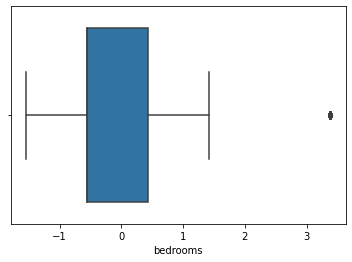

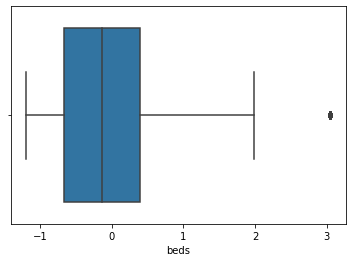

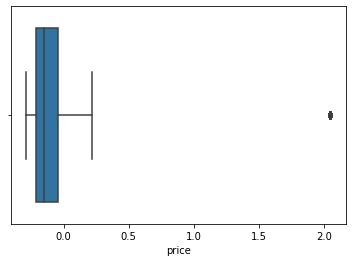

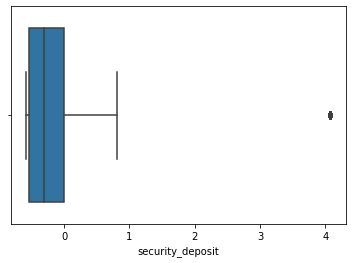

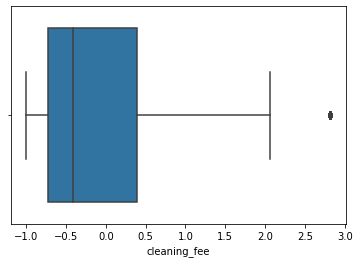

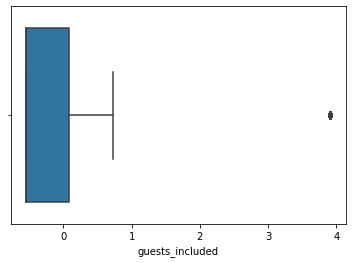

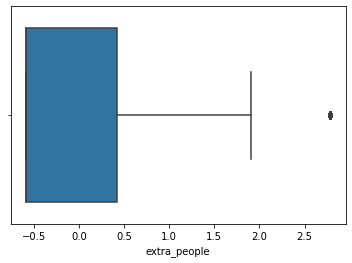

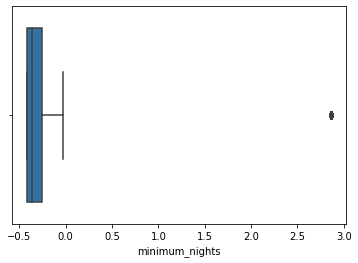

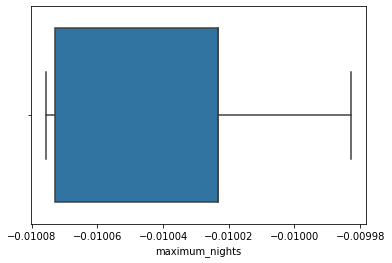

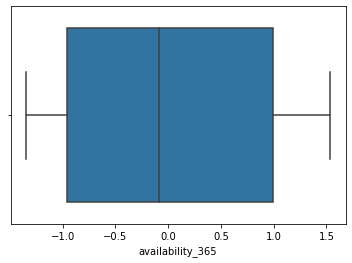

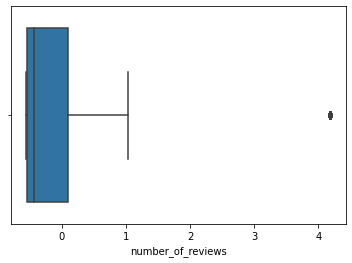

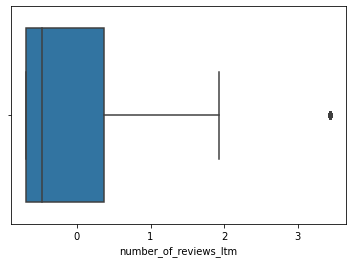

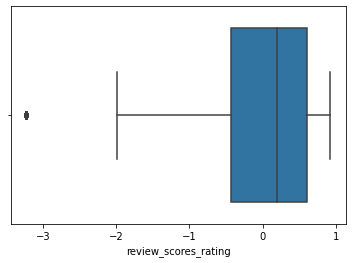

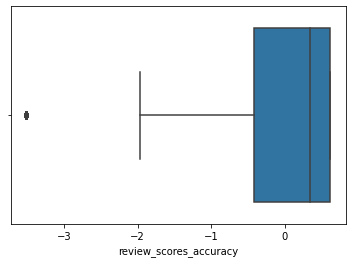

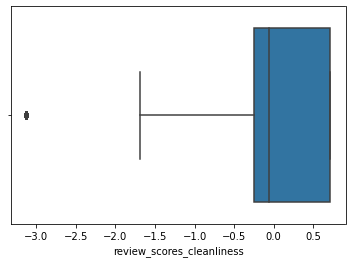

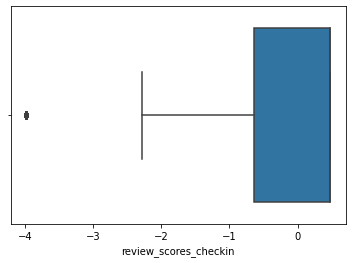

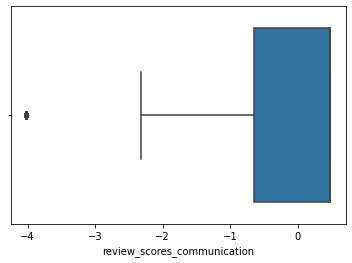

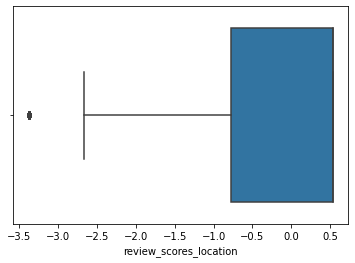

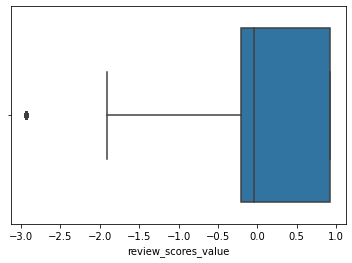

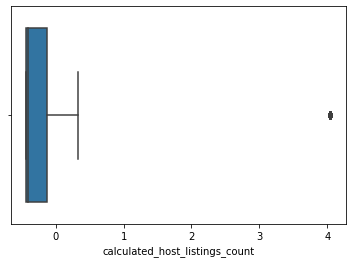

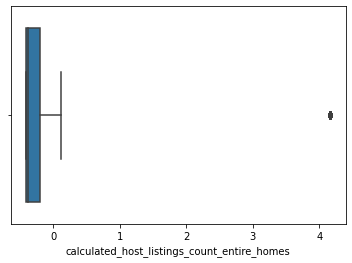

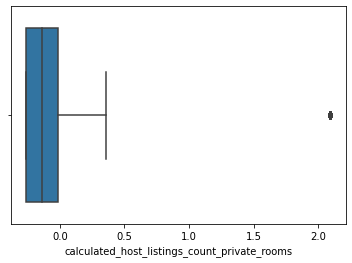

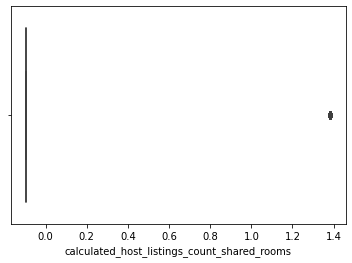

In [91]:
# Visualizing the effect of outlier treatment
for i in df_num_imp.columns:
    sns.boxplot(df_num_imp[i])
    plt.show()

- We can see that by capping the outliers at the 99th quantile we have reduced the presence of the outliers.

ONE HOT ENCODING FOR CATEGORICAL VARIABLES

In [92]:
df_cat.shape

(19833, 11)

In [93]:
dummies=pd.get_dummies(df_cat,drop_first=True)

In [94]:
dummies.head()

host_response_time_within a day  host_response_time_within a few hours  \
0                                0                                      0   
1                                0                                      0   
2                                0                                      0   
3                                0                                      0   
4                                0                                      0   

   host_response_time_within an hour  host_is_superhost_t  \
0                                  1                    1   
1                                  1                    1   
2                                  1                    0   
3                                  1                    0   
4                                  1                    0   

   neighbourhood_group_cleansed_Eixample  neighbourhood_group_cleansed_Gràcia  \
0                                      1                                    0   
1                                      1                                    0   
2                                      1                                    0   
3                                      1                                    0   
4                                      1                                    0   

   neighbourhood_group_cleansed_Horta-Guinardó  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   neighbourhood_group_cleansed_Les Corts  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   neighbourhood_group_cleansed_Nou Barris  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   neighbourhood_group_cleansed_Sant Andreu  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   neighbourhood_group_cleansed_Sant Martí  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   neighbourhood_group_cleansed_Sants-Montjuïc  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   neighbourhood_group_cleansed_Sarrià-Sant Gervasi  is_location_exact_t  \
0                                                 0                    1   
1                                                 0                    1   
2                                                 0                    1   
3                                                 0                    1   
4                                                 0                    1   

   property_type_Apartment  property_type_Barn  \
0                        1                   0   
1                        1                   0   
2                        1                   0   
3                        1                   0   
4                        0                   0   

   property_type_Bed and breakfast  property_type_Boat  \
0                                0                   0   
1                                0                   0   
2                                0          

In [95]:
dummies.shape

(19833, 55)

- After doing one hot encoding ,we have 55 dummy columns 

CONCATENATING ALL NUMERIC,CATEGORICAL AND DATETIME COLUMNS

In [96]:
num_cat=pd.concat([df_num_imp,dummies],axis=1)

treated_df=pd.concat([num_cat,df_date],axis=1)

In [97]:
treated_df.head()

host_id  host_response_rate  accommodates  bathrooms  bedrooms      beds  \
0 -0.939675           -0.234284      3.029053   1.060178  3.382397  3.052029   
1 -0.939675           -0.234284      3.029053   1.060178  1.411547  3.052029   
2 -0.927172           -0.234284      1.207751   1.060178  3.382397  1.457534   
3 -0.927172           -0.234284     -0.613552  -0.493987 -0.559302 -0.668460   
4 -0.927172           -0.234284      0.297099  -0.493987  0.426123  0.394537   

     price  security_deposit  cleaning_fee  guests_included  extra_people  \
0 2.050468         -0.352161     -1.004425         3.911374     -0.587585   
1 2.050468         -0.352161     -1.004425         3.911374     -0.587585   
2 2.050468          0.113936     -1.004425         0.087281      1.435487   
3 2.050468          0.113936     -1.004425        -0.550068      1.435487   
4 2.050468          0.113936     -1.004425        -0.550068      1.435487   

   minimum_nights  maximum_nights  availability_365  number_of_reviews  \
0       -0.307354       -0.010071          0.501265           0.843358   
1       -0.307354       -0.010071          0.335388          -0.116913   
2       -0.307354       -0.010059         -1.299686          -0.511309   
3       -0.307354       -0.010059         -0.012164          -0.374128   
4       -0.307354       -0.010059         -1.283889          -0.511309   

   number_of_reviews_ltm  review_scores_rating  review_scores_accuracy  \
0               1.206581              0.613679                0.620474   
1              -0.189980              0.821596                0.620474   
2              -0.581017              0.197845                0.620474   
3              -0.245842              0.197845               -0.415009   
4              -0.692741             -0.425907               -0.415009   

   review_scores_cleanliness  review_scores_checkin  \
0                   0.714223               0.479570   
1                   0.714223               0.479570   
2                  -0.246671               0.479570   
3                   0.714223               0.479570   
4                  -0.246671              -3.988062   

   review_scores_communication  review_scores_location  review_scores_value  \
0                     0.485780                0.535948             0.927602   
1                     0.485780                0.535948             0.927602   
2                    -1.769552               -0.769913            -0.038849   
3                     0.485780                0.535948            -0.038849   
4                    -4.024884               -0.769913            -1.005300   

   calculated_host_listings_count  \
0                       -0.378759   
1                       -0.378759   
2                       -0.073654   
3                       -0.073654   
4                       -0.073654   

   calculated_host_listings_count_entire_homes  \
0                                    -0.316136   
1                                    -0.316136   
2                                    -0.007203   
3                                    -0.007203   
4                                    -0.007203   

   calculated_host_listings_count_private_rooms  \
0                                     -0.262232   
1                                     -0.262232   
2                                     -0.262232   
3                                     -0.262232   
4                                     -0.262232   

   calculated_host_listings_count_shared_rooms  \
0                                    -0.095954   
1                                    -0.095954   
2                                    -0.095954   
3                                    -0.095954   
4                                    -0.095954   

   host_response_time_within a day  host_response_time_within a few hours  \
0                                0                                      0   
1                                0                                      0   
2

In [98]:
treated_df.shape

(19833, 83)

- We totally have 83 columns with which we can build a base model

### MODEL BUILDING

In [99]:
target=num_cat['price']
inpt=num_cat.drop('price',axis=1)

Building Model using Statsmodels library

In [68]:
X=sm.add_constant(inpt)
y=target
model=sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.346
Method:                 Least Squares   F-statistic:                     130.3
Date:                Wed, 06 Apr 2022   Prob (F-statistic):               0.00
Time:                        23:08:00   Log-Likelihood:                -13840.
No. Observations:               19833   AIC:                         2.784e+04
Df Residuals:                   19751   BIC:                         2.849e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                               -6.4458      1.545     -4.173      0.000      -9.474      -3.418
host_id                                             -0.0178      0.004     -4.524      0.000      -0.026      -0.010
host_response_rate                                  -0.0242      0.002     -9.948      0.000      -0.029      -0.019
accommodates                                         0.1099      0.008     13.320      0.000       0.094       0.126
bathrooms                                            0.0742      0.004     18.164      0.000       0.066       0.082
bedrooms                                             0.0413      0.006      6.637      0.000       0.029       0.053
beds                                                 0.0195      0.009      2.281      0.023       0.003       0.036
security_deposit                                     0.0141      0.004      3.847      0.000       0.007       0.021
cleaning_fee                                         0.0644      0.006     11.410      0.000       0.053       0.075
guests_included                                      0.0236      0.003      7.880      0.000       0.018       0.030
extra_people                                        -0.0264      0.005     -5.695      0.000      -0.036      -0.017
minimum_nights                                      -0.0931      0.004    -25.108      0.000      -0.100      -0.086
maximum_nights                                    -734.4111    151.152     -4.859      0.000   -1030.683    -438.140
availability_365                                     0.0486      0.004     12.846      0.000       0.041       0.056
number_of_reviews                                   -0.0182      0.004     -4.745      0.000      -0.026      -0.011
number_of_reviews_ltm                               -0.0337      0.005     -6.553      0.000      -0.044      -0.024
review_scores_rating                                 0.0434      0.008      5.666      0.000       0.028       0.058
review_scores_accuracy                              -0.0093      0.006     -1.506      0.132      -0.021       0.003
review_scores_cleanliness                            0.0185      0.005      3.492      0.000       0.008       0.029
review_scores_checkin                               -0.0236      0.006     -4.262      0.000      -0.034      -0.013
review_scores_communication                         -0.0075      0.006     -1.291      0.197      -0.019       0.004
review_scores_location                               0.0001      0.005      0.024      0.981      -0.010       0.010
review_scores_value                                 -0.0161      0.006     -2.528      0.011      -0.029      -0.004
calculated_host_listings_count           

COMPARING BIAS AND VARIANCE OF SEVERAL REGRESSION MODELS

SKLEARN LINEAR REGRESSION

In [69]:
# Weights of each feature in final prediction

linreg=LinearRegression()
linreg.fit(X,y)

imp_llr_df=pd.DataFrame({'columns': X.columns,'coefficients':linreg.coef_}).sort_values(by='coefficients',ascending=False)
imp_llr_df

columns  coefficients
62                        property_type_Nature lodge      1.650753
59                               property_type_Hotel      1.509858
45                      property_type_Boutique hotel      0.880579
67                               property_type_Villa      0.362302
44                                property_type_Boat      0.292408
64                  property_type_Serviced apartment      0.248035
58                              property_type_Hostel      0.210794
43                   property_type_Bed and breakfast      0.138318
52                          property_type_Dome house      0.128880
48              property_type_Casa particular (Cuba)      0.127843
26       calculated_host_listings_count_shared_rooms      0.127572
49                              property_type_Chalet      0.117446
3                                       accommodates      0.109949
42                                property_type_Barn      0.095488
65                          property_type_Tiny house      0.094561
66                           property_type_Townhouse      0.076068
4                                          bathrooms      0.074219
30                               host_is_superhost_t      0.073784
80                   require_guest_profile_picture_t      0.069671
8                                       cleaning_fee      0.064365
53                                property_type_Dorm      0.058125
61                                property_type_Loft      0.058026
29                 host_response_time_within an hour      0.055894
63                               property_type_Other      0.053193
74                                instant_bookable_t      0.051291
60                               property_type_House      0.049485
13                                  availability_365      0.048598
55                           property_type_Farm stay      0.048034
50                         property_type_Condominium      0.044735
16                              review_scores_rating      0.043398
5                                           bedrooms      0.041254
28             host_response_time_within a few hours      0.033260
31             neighbourhood_group_cleansed_Eixample      0.029266
9                                    guests_included      0.023637
54                         property_type_Earth house      0.021381
6                                               beds      0.019485
18                         review_scores_cleanliness      0.018509
24       calculated_host_listings_count_entire_homes      0.017864
7                                   security_deposit      0.014070
41                           property_type_Apartment      0.013746
78               cancellation_policy_super_strict_30      0.011737
25      calculated_host_listings_count_private_rooms      0.010488
51                             property_type_Cottage      0.004636
21                            review_scores_location      0.000127
0                                              const      0.000000
46                               property_type_Cabin     -0.000902
37           neighbourhood_group_cleansed_Sant Martí     -0.004899
20                       review_scores_communication     -0.007529
17                            review_scores_accuracy     -0.009323
40                               is_location_exact_t     -0.009880
75                      cancellation_policy_moderate     -0.015184
22                               review_scores_value     -0.016063
1                                            host_id     -0.017806
14                                 number_of_reviews     -0.018193
23                    calculated_host_listings_count     -0.019160
47                           property_type_Camper/RV     -0.020691
39  neighbourhood_group_cleansed_Sarrià-Sant Gervasi     -0.021533
19                             review_scores_checkin     -0.023613
2                                 host_response_rate     -0.024201
56                       

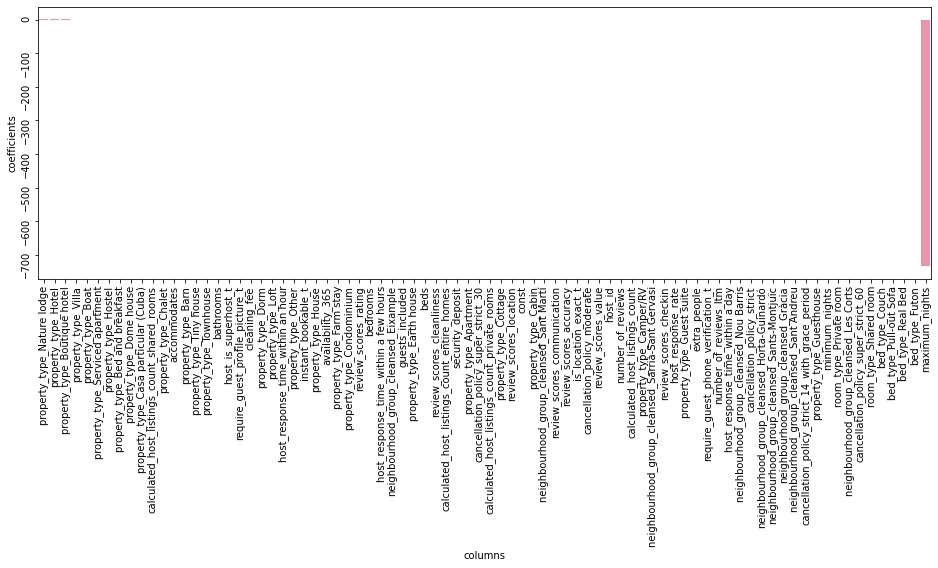

In [70]:
plt.figure(figsize=(16,5))
sns.barplot(x='columns',y='coefficients',data=imp_llr_df)
plt.tick_params(labelrotation=90)
plt.show()

In [52]:
# Doing 10-fold cross validation

linreg_gs_scores=cross_val_score(LinearRegression(),X,y,scoring='r2',cv=10,n_jobs=-1)

In [53]:
print('the r2 scores from cross_val_score are :',linreg_gs_scores)
print('\nThe bias error is :',np.mean(1-linreg_gs_scores))
print('The variance error is : ',np.std(linreg_gs_scores,ddof=1))

the r2 scores from cross_val_score are : [ -0.57576917  -0.13841372   0.52283225   0.43927251   0.53754134
   0.33965438   0.36095226   0.25825245 -14.97737601  -0.77619728]

The bias error is : 2.4009250983103376
The variance error is :  4.792547943074846


In [54]:
rmse_linreg=cross_val_score(linreg,X,y,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=10)

In [55]:
print('the rmse scores for linear regression are : \n',rmse_linreg)
print('the mean rmse score is  : ',np.mean(rmse_linreg))
print('the variance of the score is  : ',np.std(rmse_linreg,ddof=1))

the rmse scores for linear regression are : 
 [-0.46281612 -0.38005768 -0.35202908 -0.54712514 -0.39854209 -0.75666039
 -0.69099545 -0.52232677 -0.45647863 -0.47905132]
the mean rmse score is  :  -0.5046082675162126
the variance of the score is  :  0.13129761709479665


TABULATING RESULTS IN A SCORE CARD

In [56]:
# create dataframe 'score_card'
# columns: specifies the columns to be selected
score_card_new = pd.DataFrame(columns=['Model_Name', 'RMSE', 'Bias Error', 'Variance Error'])

# print the score card
score_card_new

Empty DataFrame
Columns: [Model_Name, RMSE, Bias Error, Variance Error]
Index: []

In [57]:
# Updating the results in scorecard

plain_linreg_scores=pd.Series({'Model_Name': "Multiple Linear Regression",
                         'RMSE':-0.5046082675159328,
                         'Bias Error': 2.400925098308721,
                         'Variance Error':4.792547943071662})

score_card_new = score_card_new.append(plain_linreg_scores, ignore_index=True)
score_card_new

Model_Name      RMSE  Bias Error  Variance Error
0  Multiple Linear Regression -0.504608    2.400925        4.792548

LASSO REGRESSION 

In [58]:
lasso_cv_scores=cross_val_score(Lasso(),X,y,scoring='r2',cv=10,n_jobs=-1)

In [59]:
print('the r2 scores from cross_val_score are :',lasso_cv_scores)
print('\nThe bias error is :',np.mean(1-lasso_cv_scores))
print('The variance error is : ',np.std(lasso_cv_scores,ddof=1))

the r2 scores from cross_val_score are : [-0.05049036 -0.13557549 -0.03350286 -0.00373923 -0.02599259 -0.06790359
 -0.0208958  -0.01445277 -0.20209429 -0.00789457]

The bias error is : 1.0562541552133706
The variance error is :  0.06434073387475502


GridSearch

In [60]:
params_lasso = {'alpha':[0,0.2,0.4,0.7,0.9,1,1.1,1.2,1.3,1.5,1.7,2,2.5,3,5,10]}

lasso_gs=GridSearchCV(Lasso(),params_lasso,scoring='r2',cv=10,n_jobs=-1)

In [61]:
#fitting the model
lasso_gs.fit(X,y)

GridSearchCV(cv=10, estimator=Lasso(), n_jobs=-1,
             param_grid={'alpha': [0, 0.2, 0.4, 0.7, 0.9, 1, 1.1, 1.2, 1.3, 1.5,
                                   1.7, 2, 2.5, 3, 5, 10]},
             scoring='r2')

In [62]:
#getting best params
lasso_gs.best_params_

{'alpha': 0.4}

In [63]:
#getting scores
lasso_cv_scores_gs=cross_val_score(Lasso(alpha=0.4),X,y,scoring='r2',cv=10,n_jobs=-1)

In [64]:
print('the r2 scores from cross_val_score are :',lasso_cv_scores_gs)
print('\nThe bias error is :',np.mean(1-lasso_cv_scores_gs))
print('The variance error is : ',np.std(lasso_cv_scores_gs,ddof=1))

the r2 scores from cross_val_score are : [-0.05049036 -0.13557549 -0.03350286 -0.00373923 -0.02599259 -0.06790359
 -0.0208958  -0.01445277 -0.20209429 -0.00789457]

The bias error is : 1.0562541552133706
The variance error is :  0.06434073387475502


In [65]:
# Weights of each feature in final prediction

llr=Lasso(alpha=0.4)
llr.fit(X,y)

impf_las_df=pd.DataFrame({'columns': X.columns,'coefficients':llr.coef_}).sort_values(by='coefficients',ascending=False)
impf_las_df

columns  coefficients
0                                              const      0.000000
61                                property_type_Loft     -0.000000
59                               property_type_Hotel      0.000000
58                              property_type_Hostel      0.000000
57                          property_type_Guesthouse     -0.000000
56                         property_type_Guest suite     -0.000000
55                           property_type_Farm stay     -0.000000
54                         property_type_Earth house     -0.000000
53                                property_type_Dorm     -0.000000
52                          property_type_Dome house     -0.000000
51                             property_type_Cottage     -0.000000
50                         property_type_Condominium     -0.000000
49                              property_type_Chalet      0.000000
48              property_type_Casa particular (Cuba)     -0.000000
47                           property_type_Camper/RV     -0.000000
46                               property_type_Cabin     -0.000000
45                      property_type_Boutique hotel      0.000000
44                                property_type_Boat      0.000000
43                   property_type_Bed and breakfast     -0.000000
60                               property_type_House     -0.000000
62                        property_type_Nature lodge      0.000000
1                                            host_id     -0.000000
63                               property_type_Other     -0.000000
80                   require_guest_profile_picture_t     -0.000000
79               cancellation_policy_super_strict_60      0.000000
78               cancellation_policy_super_strict_30      0.000000
77   cancellation_policy_strict_14_with_grace_period      0.000000
76                        cancellation_policy_strict     -0.000000
75                      cancellation_policy_moderate      0.000000
74                                instant_bookable_t      0.000000
73                                 bed_type_Real Bed      0.000000
72                            bed_type_Pull-out Sofa     -0.000000
71                                    bed_type_Futon     -0.000000
70                                    bed_type_Couch      0.000000
69                             room_type_Shared room     -0.000000
68                            room_type_Private room     -0.000000
67                               property_type_Villa      0.000000
66                           property_type_Townhouse      0.000000
65                          property_type_Tiny house     -0.000000
64                  property_type_Serviced apartment      0.000000
42                                property_type_Barn      0.000000
41                           property_type_Apartment     -0.000000
40                               is_location_exact_t      0.000000
39  neighbourhood_group_cleansed_Sarrià-Sant Gervasi      0.000000
18                         review_scores_cleanliness      0.000000
17                            review_scores_accuracy     -0.000000
16                              review_scores_rating     -0.000000
15                             number_of_reviews_ltm     -0.000000
14                                 number_of_reviews     -0.000000
13                                  availability_365      0.000000
12                                    maximum_nights      0.000000
11                                    minimum_nights     -0.000000
10                                      extra_people      0.000000
9                                    guests_included      0.000000
8                                       cleaning_fee      0.000000
7                                   security_deposit      0.000000
6                                               beds      0.000000
5                                           bedrooms      0.000000
4                                          bathrooms      0.000000
3                        

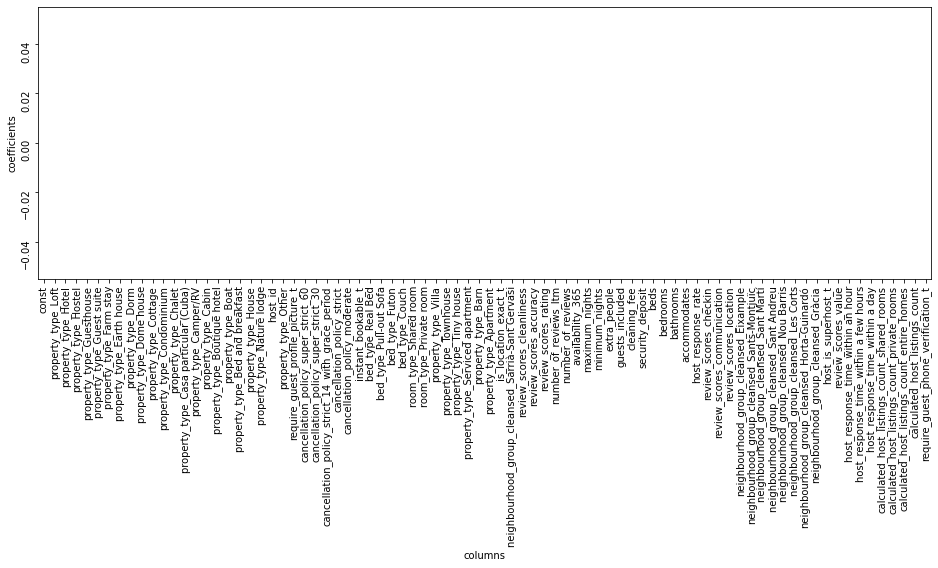

In [66]:
plt.figure(figsize=(16,5))
sns.barplot(x='columns',y='coefficients',data=impf_las_df)
plt.tick_params(labelrotation=90)
plt.show()

In [67]:
# rmse for lasso regularization regular
rmse_lasso=cross_val_score(Lasso(),X,y,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=10)

In [68]:
print('the rmse scores for lasso regularization are : \n',rmse_lasso)
print('the mean rmse score is  : ',np.mean(rmse_lasso))
print('the variance of the score is  : ',np.std(rmse_lasso,ddof=1))

the rmse scores for lasso regularization are : 
 [-0.37788375 -0.37958361 -0.51808241 -0.73201705 -0.59362182 -0.96223549
 -0.87337196 -0.61084376 -0.12520942 -0.36086436]
the mean rmse score is  :  -0.5533713625000485
the variance of the score is  :  0.25582822227377494


In [69]:
# rmse for lasso regularization with best params
rmse_lasso_best=cross_val_score(Lasso(alpha=0.4),X,y,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=10)

In [70]:
print('the rmse scores for lasso regularization are : \n',rmse_lasso_best)
print('the mean rmse score is  : ',np.mean(rmse_lasso_best))
print('the variance of the score is  : ',np.std(rmse_lasso_best,ddof=1))

the rmse scores for lasso regularization are : 
 [-0.37788375 -0.37958361 -0.51808241 -0.73201705 -0.59362182 -0.96223549
 -0.87337196 -0.61084376 -0.12520942 -0.36086436]
the mean rmse score is  :  -0.5533713625000485
the variance of the score is  :  0.25582822227377494


Updating scores in score card

In [71]:
# Updating the results in scorecard

lasso_regular=pd.Series({'Model_Name': "Lasso Regularization",
                         'RMSE': -0.5533713625000485,
                         'Bias Error': 1.0562541552133706,
                         'Variance Error':1.0562541552133706})

lasso_with_gridsearch=pd.Series({'Model_Name': "Lasso Regularization with best params",
                         'RMSE': -0.5533713625000485,
                         'Bias Error': 1.0562541552133706,
                         'Variance Error':0.06434073387475502})

score_card_new = score_card_new.append(lasso_regular, ignore_index=True)
score_card_new = score_card_new.append(lasso_with_gridsearch, ignore_index=True)
score_card_new

Model_Name      RMSE  Bias Error  Variance Error
0             Multiple Linear Regression -0.504608    2.400925        4.792548
1                   Lasso Regularization -0.553371    1.056254        1.056254
2  Lasso Regularization with best params -0.553371    1.056254        0.064341

RIDGE REGRESSION

In [72]:
ridge_cv_scores=cross_val_score(Ridge(),X,y,scoring='r2',cv=10,n_jobs=-1)

In [73]:
print('the r2 scores from cross_val_score are :',ridge_cv_scores)
print('\nThe bias error is :',np.mean(1-ridge_cv_scores))
print('The variance error is : ',np.std(ridge_cv_scores,ddof=1))

the r2 scores from cross_val_score are : [ -0.56330227  -0.1315829    0.51655441   0.44009212   0.53480996
   0.33880544   0.36187293   0.25962241 -14.92798471  -0.7711798 ]

The bias error is : 2.394229241202596
The variance error is :  4.7772027359266485


In [74]:
params_ridge = {'alpha':[0,0.2,0.4,0.7,0.9,1,1.1,1.2,1.3,1.5,1.7,2,2.5,3,5,10]}

ridge_gs=GridSearchCV(Ridge(),params_ridge,scoring='r2',cv=10,n_jobs=-1)

In [75]:
#fitting the model
ridge_gs.fit(X,y)

GridSearchCV(cv=10, estimator=Ridge(), n_jobs=-1,
             param_grid={'alpha': [0, 0.2, 0.4, 0.7, 0.9, 1, 1.1, 1.2, 1.3, 1.5,
                                   1.7, 2, 2.5, 3, 5, 10]},
             scoring='r2')

In [76]:
#getting best params
ridge_gs.best_params_

{'alpha': 10}

In [77]:
#getting scores
ridge_cv_scores_gs=cross_val_score(Ridge(alpha=10),X,y,scoring='r2',cv=10,n_jobs=-1)

In [78]:
print('the r2 scores from cross_val_score are :',ridge_cv_scores_gs)
print('\nThe bias error is :',np.mean(1-ridge_cv_scores_gs))
print('The variance error is : ',np.std(ridge_cv_scores_gs,ddof=1))

the r2 scores from cross_val_score are : [ -0.56178621  -0.12645865   0.49674723   0.43977773   0.53361581
   0.33883938   0.36313311   0.25992827 -14.51961899  -0.76451339]

The bias error is : 2.354033570552807
The variance error is :  4.64806400910046


In [79]:
# Weights of each feature in final prediction

rdg=Ridge(alpha=10)
rdg.fit(X,y)

impf_rd_df=pd.DataFrame({'columns': X.columns,'coefficients':rdg.coef_}).sort_values(by='coefficients',ascending=False)
impf_rd_df

columns  coefficients
59                               property_type_Hotel      1.084223
62                        property_type_Nature lodge      0.643421
45                      property_type_Boutique hotel      0.616137
67                               property_type_Villa      0.121681
3                                       accommodates      0.110098
26       calculated_host_listings_count_shared_rooms      0.104818
44                                property_type_Boat      0.082463
30                               host_is_superhost_t      0.075338
4                                          bathrooms      0.073474
8                                       cleaning_fee      0.064866
80                   require_guest_profile_picture_t      0.054283
29                 host_response_time_within an hour      0.053743
74                                instant_bookable_t      0.051326
64                  property_type_Serviced apartment      0.049242
13                                  availability_365      0.048041
16                              review_scores_rating      0.043958
5                                           bedrooms      0.042139
28             host_response_time_within a few hours      0.031836
31             neighbourhood_group_cleansed_Eixample      0.031818
9                                    guests_included      0.024738
18                         review_scores_cleanliness      0.018942
24       calculated_host_listings_count_entire_homes      0.018474
6                                               beds      0.018117
58                              property_type_Hostel      0.014259
7                                   security_deposit      0.013885
78               cancellation_policy_super_strict_30      0.013832
25      calculated_host_listings_count_private_rooms      0.012909
0                                              const      0.000000
21                            review_scores_location     -0.000231
12                                    maximum_nights     -0.000765
37           neighbourhood_group_cleansed_Sant Martí     -0.001131
70                                    bed_type_Couch     -0.002521
76                        cancellation_policy_strict     -0.002882
81                require_guest_phone_verification_t     -0.005784
40                               is_location_exact_t     -0.006599
20                       review_scores_communication     -0.007185
17                            review_scores_accuracy     -0.009276
53                                property_type_Dorm     -0.012770
51                             property_type_Cottage     -0.015156
46                               property_type_Cabin     -0.016628
22                               review_scores_value     -0.016644
1                                            host_id     -0.017960
14                                 number_of_reviews     -0.018071
23                    calculated_host_listings_count     -0.018629
75                      cancellation_policy_moderate     -0.019008
39  neighbourhood_group_cleansed_Sarrià-Sant Gervasi     -0.022774
19                             review_scores_checkin     -0.023341
2                                 host_response_rate     -0.024122
52                          property_type_Dome house     -0.025127
10                                      extra_people     -0.025880
49                              property_type_Chalet     -0.026999
55                           property_type_Farm stay     -0.027270
15                             number_of_reviews_ltm     -0.033165
65                          property_type_Tiny house     -0.039363
54                         property_type_Earth house     -0.040321
27                   host_response_time_within a day     -0.041011
35           neighbourhood_group_cleansed_Nou Barris     -0.044478
42                                property_type_Barn     -0.045312
33       neighbourhood_group_cleansed_Horta-Guinardó     -0.049775
38       neighbourhood_gr

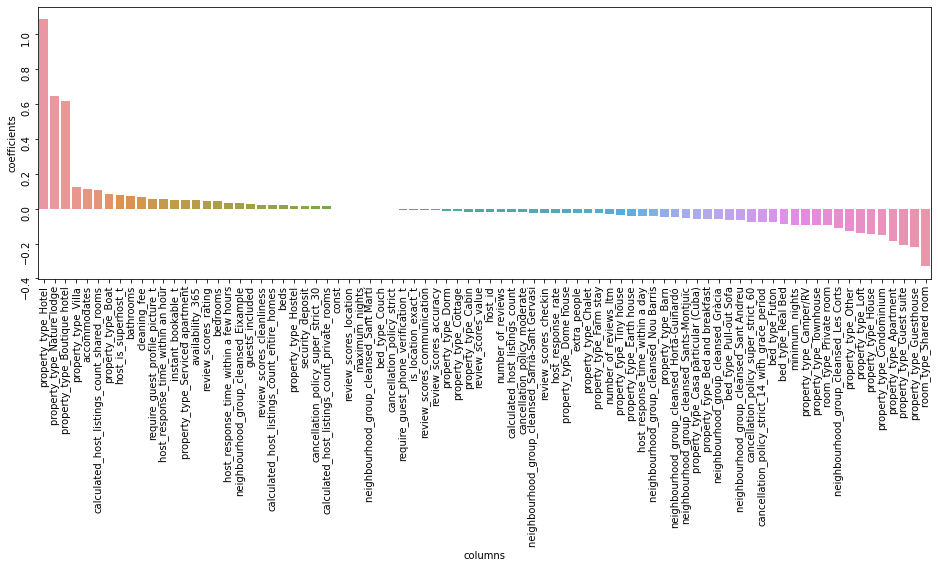

In [80]:
plt.figure(figsize=(16,5))
sns.barplot(x='columns',y='coefficients',data=impf_rd_df)
plt.tick_params(labelrotation=90)
plt.show()

In [81]:
#rmse for regular ridge
rmse_ridge=cross_val_score(Ridge(),X,y,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=10)

In [82]:
print('the rmse scores for ridge regularization are : \n',rmse_ridge)
print('the mean rmse score is  : ',np.mean(rmse_ridge))
print('the variance of the score is  : ',np.std(rmse_ridge,ddof=1))

the rmse scores for ridge regularization are : 
 [-0.46098167 -0.37891573 -0.35433724 -0.54672513 -0.3997173  -0.75714661
 -0.69049752 -0.5218442  -0.45577252 -0.47837422]
the mean rmse score is  :  -0.5044312143418048
the variance of the score is  :  0.1311316418051092


In [83]:
#rmse for regular ridge with best params
rmse_ridge_best=cross_val_score(Ridge(alpha= 10),X,y,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=10)

In [84]:
print('the rmse scores for ridge regularization with best params are : \n',rmse_ridge_best)
print('the mean rmse score is  : ',np.mean(rmse_ridge_best))
print('the variance of the score is  : ',np.std(rmse_ridge_best,ddof=1))

the rmse scores for ridge regularization with best params are : 
 [-0.46075809 -0.37805682 -0.36152313 -0.5468786  -0.40023001 -0.75712718
 -0.68981538 -0.52173639 -0.44989198 -0.47747311]
the mean rmse score is  :  -0.5043490699870958
the variance of the score is  :  0.13046218435005696


Updating scores in a score card

In [85]:
ridge_regular=pd.Series({'Model_Name': "Ridge Regularization",
                         'RMSE': -0.5044312143418048,
                         'Bias Error': 2.394229241202597,
                         'Variance Error':4.648064009100459})

ridge_with_best_params=pd.Series({'Model_Name': "Ridge Regularization with best params",
                         'RMSE':-0.5043490699870958,
                         'Bias Error': 2.354033570552807,
                         'Variance Error':4.777202735926653})

score_card_new = score_card_new.append(ridge_regular, ignore_index=True)
score_card_new = score_card_new.append(ridge_with_best_params, ignore_index=True)
score_card_new

Model_Name      RMSE  Bias Error  Variance Error
0             Multiple Linear Regression -0.504608    2.400925        4.792548
1                   Lasso Regularization -0.553371    1.056254        1.056254
2  Lasso Regularization with best params -0.553371    1.056254        0.064341
3                   Ridge Regularization -0.504431    2.394229        4.648064
4  Ridge Regularization with best params -0.504349    2.354034        4.777203

ELASTIC NET REGRESSION

In [547]:
elastic_cv_scores=cross_val_score(ElasticNet(),X,y,scoring='r2',cv=10,n_jobs=-1)

In [548]:
print('the r2 scores from cross_val_score are :',elastic_cv_scores)
print('\nThe bias error is :',np.mean(1-elastic_cv_scores))
print('The variance error is : ',np.std(elastic_cv_scores,ddof=1))

the r2 scores from cross_val_score are : [-0.05049036 -0.13557549 -0.03350286 -0.00373923 -0.02599259 -0.06790359
 -0.0208958  -0.01445277 -0.20209429 -0.00789457]

The bias error is : 1.0562541552133706
The variance error is :  0.06434073387475502


GridSearch

In [578]:
params_elastic = {'alpha':[0,0.2,0.4,0.7,0.9,1,1.1,1.2,1.3,1.5,1.7,2,2.5,3,5,10],
               'l1_ratio':[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}

elastic_gs=GridSearchCV(ElasticNet(),params_elastic,scoring='r2',cv=10,n_jobs=-1)

In [579]:
#fitting the model
elastic_gs.fit(X,y)

GridSearchCV(cv=10, estimator=ElasticNet(), n_jobs=-1,
             param_grid={'alpha': [0, 0.2, 0.4, 0.7, 0.9, 1, 1.1, 1.2, 1.3, 1.5,
                                   1.7, 2, 2.5, 3, 5, 10],
                         'l1_ratio': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8,
                                      0.9, 1]},
             scoring='r2')

In [580]:
#getting best params
elastic_gs.best_params_

{'alpha': 2.5, 'l1_ratio': 0.1}

In [581]:
#getting scores
elastic_cv_scores_gs=cross_val_score(ElasticNet(alpha=2.5,l1_ratio=0.1),X,y,scoring='r2',cv=10,n_jobs=-1)

In [582]:
print('the r2 scores from cross_val_score are :',elastic_cv_scores_gs)
print('\nThe bias error is :',np.mean(1-elastic_cv_scores_gs))
print('The variance error is : ',np.std(elastic_cv_scores_gs,ddof=1))

the r2 scores from cross_val_score are : [-0.07161873 -0.10310234  0.00890884  0.02394513  0.01686247 -0.06263792
 -0.00554663  0.0224115  -0.32970046 -0.02798637]

The bias error is : 1.0528464511802622
The variance error is :  0.10682858504699844


In [754]:
# Importance of each feature in final prediction

elst=ElasticNet(alpha=2.5,l1_ratio=0.1)
elst.fit(X,y)

impf_els_df=pd.DataFrame({'columns': X.columns,'coefficients':elst.coef_}).sort_values(by='coefficients',ascending=False)
impf_els_df

columns  coefficients
9                                    guests_included      0.015265
3                                       accommodates      0.007175
0                                              const      0.000000
52                          property_type_Dome house     -0.000000
60                               property_type_House     -0.000000
59                               property_type_Hotel      0.000000
58                              property_type_Hostel      0.000000
57                          property_type_Guesthouse     -0.000000
56                         property_type_Guest suite     -0.000000
55                           property_type_Farm stay     -0.000000
54                         property_type_Earth house     -0.000000
53                                property_type_Dorm     -0.000000
51                             property_type_Cottage     -0.000000
62                        property_type_Nature lodge      0.000000
50                         property_type_Condominium     -0.000000
49                              property_type_Chalet      0.000000
48              property_type_Casa particular (Cuba)     -0.000000
47                           property_type_Camper/RV     -0.000000
46                               property_type_Cabin     -0.000000
45                      property_type_Boutique hotel      0.000000
44                                property_type_Boat      0.000000
61                                property_type_Loft     -0.000000
63                               property_type_Other     -0.000000
42                                property_type_Barn      0.000000
73                                 bed_type_Real Bed      0.000000
80                   require_guest_profile_picture_t     -0.000000
79               cancellation_policy_super_strict_60      0.000000
78               cancellation_policy_super_strict_30      0.000000
77   cancellation_policy_strict_14_with_grace_period      0.000000
76                        cancellation_policy_strict     -0.000000
75                      cancellation_policy_moderate      0.000000
74                                instant_bookable_t      0.000000
72                            bed_type_Pull-out Sofa     -0.000000
64                  property_type_Serviced apartment      0.000000
71                                    bed_type_Futon     -0.000000
70                                    bed_type_Couch      0.000000
69                             room_type_Shared room     -0.000000
68                            room_type_Private room     -0.000000
67                               property_type_Villa      0.000000
66                           property_type_Townhouse      0.000000
65                          property_type_Tiny house     -0.000000
43                   property_type_Bed and breakfast     -0.000000
41                           property_type_Apartment     -0.000000
1                                            host_id     -0.000000
12                                    maximum_nights      0.000000
19                             review_scores_checkin     -0.000000
18                         review_scores_cleanliness      0.000000
17                            review_scores_accuracy     -0.000000
16                              review_scores_rating     -0.000000
15                             number_of_reviews_ltm     -0.000000
14                                 number_of_reviews     -0.000000
13                                  availability_365      0.000000
11                                    minimum_nights     -0.000000
21                            review_scores_location     -0.000000
10                                      extra_people      0.000000
8                                       cleaning_fee      0.000000
7                                   security_deposit      0.000000
6                                               beds      0.000000
5                                           bedrooms      0.000000
4                        

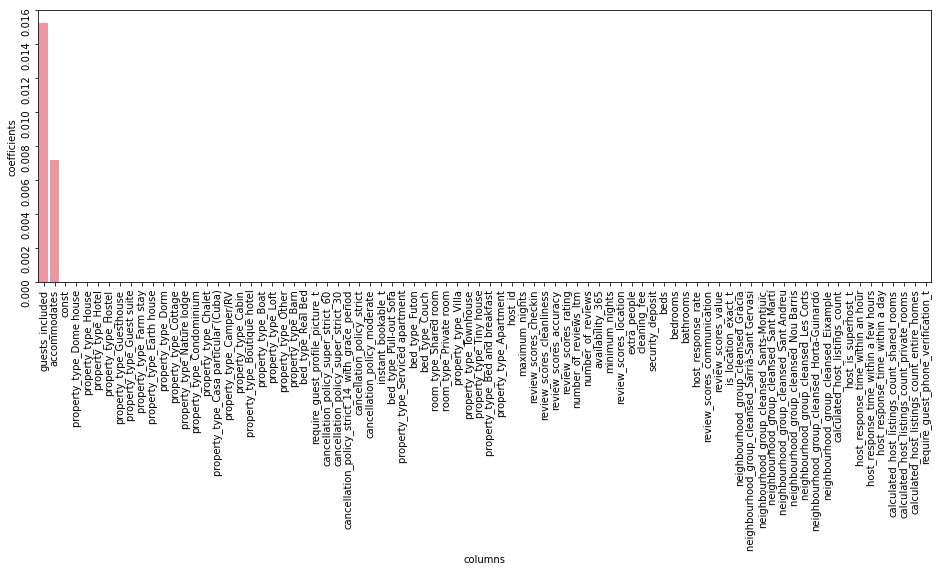

In [755]:
plt.figure(figsize=(16,5))
sns.barplot(x='columns',y='coefficients',data=impf_els_df)
plt.tick_params(labelrotation=90)
plt.show()

In [729]:
# RMSE SCORES

rmse_elastic=cross_val_score(ElasticNet(),X,y,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=10)

In [732]:
print('the rmse scores for ridge regularization are : \n',rmse_elastic)
print('the mean rmse score is  : ',np.mean(rmse_elastic))
print('the variance of the score is  : ',np.std(rmse_elastic,ddof=1))

the rmse scores for ridge regularization are : 
 [-0.37788375 -0.37958361 -0.51808241 -0.73201705 -0.59362182 -0.96223549
 -0.87337196 -0.61084376 -0.12520942 -0.36086436]
the mean rmse score is  :  -0.5533713625000485
the variance of the score is  :  0.25582822227377494


In [86]:
# RMSE SCORES with best params

rmse_elastic_best=cross_val_score(ElasticNet(alpha = 2.5, l1_ratio = 0.1),X,y,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=10)

In [87]:
print('the rmse scores for ridge regularization are : \n',rmse_elastic_best)
print('the mean rmse score is  : ',np.mean(rmse_elastic_best))
print('the variance of the score is  : ',np.std(rmse_elastic_best,ddof=1))

the rmse scores for ridge regularization are : 
 [-0.38166499 -0.37411692 -0.50734082 -0.7218515  -0.58109198 -0.95986024
 -0.86678152 -0.59964231 -0.13168752 -0.36444343]
the mean rmse score is  :  -0.5488481231560584
the variance of the score is  :  0.2520570048613767


Updating Score card

In [88]:
elasticnet_regular=pd.Series({'Model_Name': "ElasticNet Regularization",
                         'RMSE': -0.5533713625000485,
                         'Bias Error': 1.0562541552133706,
                         'Variance Error':0.06434073387475502})

elasticnet_with_best_params=pd.Series({'Model_Name': "ElasticNet Regularization with best params",
                         'RMSE':-0.5488481231560584,
                         'Bias Error':1.0528464511802622,
                         'Variance Error':1.0528464511802622})

score_card_new = score_card_new.append(elasticnet_regular, ignore_index=True)
score_card_new= score_card_new.append(elasticnet_with_best_params, ignore_index=True)
score_card_new

Model_Name      RMSE  Bias Error  \
0                  Multiple Linear Regression -0.504608    2.400925   
1                        Lasso Regularization -0.553371    1.056254   
2       Lasso Regularization with best params -0.553371    1.056254   
3                        Ridge Regularization -0.504431    2.394229   
4       Ridge Regularization with best params -0.504349    2.354034   
5                   ElasticNet Regularization -0.553371    1.056254   
6  ElasticNet Regularization with best params -0.548848    1.052846   

   Variance Error  
0        4.792548  
1        1.056254  
2        0.064341  
3        4.648064  
4        4.777203  
5        0.064341  
6        1.052846

DECISION TREE REGRESSOR

In [587]:
dt=DecisionTreeRegressor()
dt_cv_scores=cross_val_score(dt,X,y,scoring='r2',cv=10,n_jobs=-1)

In [588]:
print('the r2 scores from cross_val_score are :',dt_cv_scores)
print('\nThe bias error is :',np.mean(1-dt_cv_scores))
print('The variance error is : ',np.std(dt_cv_scores,ddof=1))

the r2 scores from cross_val_score are : [ -1.70469803  -0.8749773    0.11648692   0.33042688   0.56888796
   0.44070553   0.35593904  -0.64149687 -43.30681654  -2.28775704]

The bias error is : 5.700329944054402
The variance error is :  13.599973744482693


GridSearch

In [596]:
params_dt = {'splitter':["best", "random"],
             'max_depth':np.arange(2,11,2),
            'min_samples_split':[1,2,3,4],
            'min_samples_leaf':[1,2,3,4],
            'max_features':["auto", "sqrt", "log2"]}

dt_gs=GridSearchCV(DecisionTreeRegressor(),params_dt,scoring='r2',cv=10,n_jobs=-1)

In [597]:
#fitting the model
dt_gs.fit(X,y)

GridSearchCV(cv=10, estimator=DecisionTreeRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  4,  6,  8, 10]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4],
                         'splitter': ['best', 'random']},
             scoring='r2')

In [598]:
#getting best params
dt_gs.best_params_

{'max_depth': 2,
 'max_features': 'log2',
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'splitter': 'random'}

In [599]:
#getting scores
dt_cv_scores_gs=cross_val_score(DecisionTreeRegressor(splitter='random',max_depth=2,max_features='log2',
                                                      min_samples_leaf=4,min_samples_split=4),
                                X,y,scoring='r2',cv=10,n_jobs=-1)

In [600]:
print('the r2 scores from cross_val_score are :',dt_cv_scores_gs)
print('\nThe bias error is :',np.mean(1-dt_cv_scores_gs))
print('The variance error is : ',np.std(dt_cv_scores_gs,ddof=1))

the r2 scores from cross_val_score are : [-0.11982421 -0.12770516  0.10362421  0.11418283 -0.02046997 -0.04732062
 -0.00550642 -0.01255592 -3.37905911 -0.07618295]

The bias error is : 1.3570817319723587
The variance error is :  1.0648974406019138


In [750]:
# Importance of each feature in final prediction

dtr=DecisionTreeRegressor(splitter='random',max_depth=2,max_features='log2',
                                                      min_samples_leaf=4,min_samples_split=4)
dtr.fit(X,y)

impf_dt_df=pd.DataFrame({'columns': X.columns,'coefficients':dtr.feature_importances_}).sort_values(by='coefficients',ascending=False)
impf_dt_df

columns  coefficients
3                                       accommodates      0.883872
59                               property_type_Hotel      0.115225
74                                instant_bookable_t      0.000903
0                                              const      0.000000
52                          property_type_Dome house      0.000000
58                              property_type_Hostel      0.000000
57                          property_type_Guesthouse      0.000000
56                         property_type_Guest suite      0.000000
55                           property_type_Farm stay      0.000000
54                         property_type_Earth house      0.000000
53                                property_type_Dorm      0.000000
50                         property_type_Condominium      0.000000
51                             property_type_Cottage      0.000000
61                                property_type_Loft      0.000000
49                              property_type_Chalet      0.000000
48              property_type_Casa particular (Cuba)      0.000000
47                           property_type_Camper/RV      0.000000
46                               property_type_Cabin      0.000000
45                      property_type_Boutique hotel      0.000000
44                                property_type_Boat      0.000000
60                               property_type_House      0.000000
63                               property_type_Other      0.000000
62                        property_type_Nature lodge      0.000000
72                            bed_type_Pull-out Sofa      0.000000
80                   require_guest_profile_picture_t      0.000000
79               cancellation_policy_super_strict_60      0.000000
78               cancellation_policy_super_strict_30      0.000000
77   cancellation_policy_strict_14_with_grace_period      0.000000
76                        cancellation_policy_strict      0.000000
75                      cancellation_policy_moderate      0.000000
73                                 bed_type_Real Bed      0.000000
71                                    bed_type_Futon      0.000000
42                                property_type_Barn      0.000000
70                                    bed_type_Couch      0.000000
69                             room_type_Shared room      0.000000
68                            room_type_Private room      0.000000
67                               property_type_Villa      0.000000
66                           property_type_Townhouse      0.000000
65                          property_type_Tiny house      0.000000
64                  property_type_Serviced apartment      0.000000
43                   property_type_Bed and breakfast      0.000000
41                           property_type_Apartment      0.000000
1                                            host_id      0.000000
40                               is_location_exact_t      0.000000
19                             review_scores_checkin      0.000000
18                         review_scores_cleanliness      0.000000
17                            review_scores_accuracy      0.000000
16                              review_scores_rating      0.000000
15                             number_of_reviews_ltm      0.000000
14                                 number_of_reviews      0.000000
13                                  availability_365      0.000000
12                                    maximum_nights      0.000000
11                                    minimum_nights      0.000000
10                                      extra_people      0.000000
9                                    guests_included      0.000000
8                                       cleaning_fee      0.000000
7                                   security_deposit      0.000000
6                                               beds      0.000000
5                                           bedrooms      0.000000
4                        

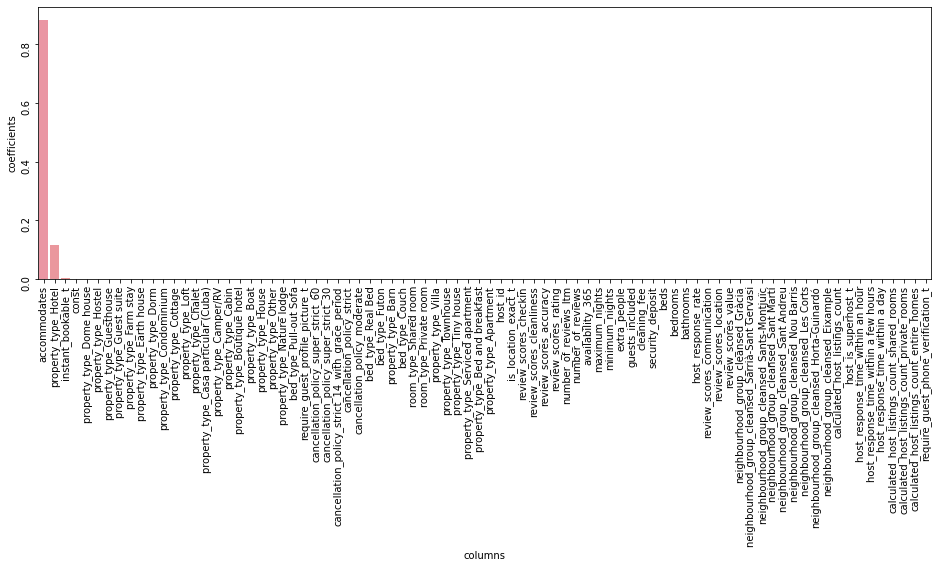

In [752]:
plt.figure(figsize=(16,5))
sns.barplot(x='columns',y='coefficients',data=impf_dt_df)
plt.tick_params(labelrotation=90)
plt.show()

In [89]:
# RMSE SCORES with best params

rmse_d_best=cross_val_score(DecisionTreeRegressor(splitter='random',max_depth=2,max_features='log2',
                                                      min_samples_leaf=4,min_samples_split=4),X,y,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=10)

In [90]:
print('the rmse scores for Decision Tree regression are : \n',rmse_d_best)
print('the mean rmse score is  : ',np.mean(rmse_d_best))
print('the variance of the score is  : ',np.std(rmse_d_best,ddof=1))

the rmse scores for Decision Tree regression are : 
 [-0.37223808 -0.38260097 -0.47363348 -0.68033253 -0.50039699 -0.87280129
 -0.80922062 -0.56877661 -0.20073978 -0.42240264]
the mean rmse score is  :  -0.5283143001178882
the variance of the score is  :  0.20822270750848593


In [91]:
# RMSE SCORES 

rmse_dt=cross_val_score(DecisionTreeRegressor(),X,y,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=10)

In [92]:
print('the rmse scores for Decision Tree regression are : \n',rmse_dt)
print('the mean rmse score is  : ',np.mean(rmse_dt))
print('the variance of the score is  : ',np.std(rmse_dt,ddof=1))

the rmse scores for Decision Tree regression are : 
 [-0.58506964 -0.48491574 -0.47984577 -0.60581087 -0.36058382 -0.69857583
 -0.69807019 -0.78529292 -0.74101233 -0.66589191]
the mean rmse score is  :  -0.6105069033151708
the variance of the score is  :  0.13418433133103527


Updating Score Card

In [95]:
Decision_Tree=pd.Series({'Model_Name': "Decision Tree Regressor",
                         'RMSE': -0.6105069033151708,
                         'Bias Error': 5.700329944054402,
                         'Variance Error':13.599973744482693})

DecisionTree_with_best_params=pd.Series({'Model_Name': "Decision Tree Regressor with best params",
                         'RMSE':-0.5283143001178882,
                         'Bias Error':1.3570817319723587,
                         'Variance Error':1.0648974406019138})

score_card_new = score_card_new.append(Decision_Tree, ignore_index=True)
score_card_new = score_card_new.append(DecisionTree_with_best_params, ignore_index=True)
score_card_new

Model_Name      RMSE  Bias Error  \
0                   Multiple Linear Regression -0.504608    2.400925   
1                         Lasso Regularization -0.553371    1.056254   
2        Lasso Regularization with best params -0.553371    1.056254   
3                         Ridge Regularization -0.504431    2.394229   
4        Ridge Regularization with best params -0.504349    2.354034   
5                    ElasticNet Regularization -0.553371    1.056254   
6   ElasticNet Regularization with best params -0.548848    1.052846   
7                      Decision Tree Regressor -0.610507    5.700330   
8     Decision Tree Regressor with best params -0.528314    1.357082   
9                      Decision Tree Regressor -0.610507    5.700330   
10    Decision Tree Regressor with best params -0.528314    1.357082   

    Variance Error  
0         4.792548  
1         1.056254  
2         0.064341  
3         4.648064  
4         4.777203  
5         0.064341  
6         1.052846  
7        13.599974  
8         1.064897  
9        13.599974  
10        1.064897

In [101]:
score_card_new=score_card_new.drop(index=[9,10])

In [102]:
score_card_new

Model_Name      RMSE  Bias Error  \
0                  Multiple Linear Regression -0.504608    2.400925   
1                        Lasso Regularization -0.553371    1.056254   
2       Lasso Regularization with best params -0.553371    1.056254   
3                        Ridge Regularization -0.504431    2.394229   
4       Ridge Regularization with best params -0.504349    2.354034   
5                   ElasticNet Regularization -0.553371    1.056254   
6  ElasticNet Regularization with best params -0.548848    1.052846   
7                     Decision Tree Regressor -0.610507    5.700330   
8    Decision Tree Regressor with best params -0.528314    1.357082   

   Variance Error  
0        4.792548  
1        1.056254  
2        0.064341  
3        4.648064  
4        4.777203  
5        0.064341  
6        1.052846  
7       13.599974  
8        1.064897

RANDOM FOREST REGRESSOR

In [602]:
rf=RandomForestRegressor()

rf_cv_scores=cross_val_score(rf,X,y,scoring='r2',cv=10,n_jobs=-1)

In [604]:
print('the r2 scores from cross_val_score are :\n',rf_cv_scores)
print('\nThe bias error is :',np.mean(1-rf_cv_scores))
print('The variance error is : ',np.std(rf_cv_scores,ddof=1))

the r2 scores from cross_val_score are :
 [-1.19384810e-02  3.43180754e-01  6.08122425e-01  5.77689964e-01
  7.90742768e-01  5.53362345e-01  5.02772363e-01  2.12857734e-01
 -1.35734623e+01 -2.72785322e-01]

The bias error is : 2.0269457773664756
The variance error is :  4.419881114651205


GridSearch

In [606]:
params_rf = {'n_estimators' : [10,20,30,50,70,90,110],
            'max_depth':np.arange(2,11,2),
            'min_samples_split':[1,2,3,4],
            'min_samples_leaf':[1,2,3,4],
            'max_features':["auto", "sqrt", "log2"]}

rf_gs = GridSearchCV(RandomForestRegressor(),params_rf,scoring='r2',cv=10,n_jobs=-1)

In [607]:
#fitting the data
rf_gs.fit(X,y)

GridSearchCV(cv=10, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': array([ 2,  4,  6,  8, 10]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [10, 20, 30, 50, 70, 90, 110]},
             scoring='r2')

In [608]:
#getting best params
rf_gs.best_params_

{'max_depth': 2,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 3,
 'n_estimators': 50}

In [610]:
#getting scores
rf_cv_scores_gs=cross_val_score(RandomForestRegressor(n_estimators=50,max_depth=2,max_features='log2',
                                                      min_samples_leaf=3,min_samples_split=3),
                                X,y,scoring='r2',cv=10,n_jobs=-1)

In [611]:
print('the r2 scores from cross_val_score are :',rf_cv_scores_gs)
print('\nThe bias error is :',np.mean(1-rf_cv_scores_gs))
print('The variance error is : ',np.std(rf_cv_scores_gs,ddof=1))

the r2 scores from cross_val_score are : [-0.22342055 -0.0570463   0.15172559  0.18888877  0.27638278  0.11799229
  0.16666136  0.17034304 -1.85667017 -0.20278422]

The bias error is : 1.1267927406771394
The variance error is :  0.6312733679077159


In [740]:
# Importance of each feature in final prediction

rfr=RandomForestRegressor(n_estimators=50,max_depth=2,max_features='log2',
                                                      min_samples_leaf=3,min_samples_split=3)
rfr.fit(X,y)

impf_rf_df=pd.DataFrame({'columns': X.columns,'coefficients':rfr.feature_importances_}).sort_values(by='coefficients',ascending=False)
impf_rf_df

columns  coefficients
3                                       accommodates      0.163427
5                                           bedrooms      0.118651
68                            room_type_Private room      0.111978
8                                       cleaning_fee      0.090899
6                                               beds      0.083139
4                                          bathrooms      0.071679
9                                    guests_included      0.066931
25      calculated_host_listings_count_private_rooms      0.038295
7                                   security_deposit      0.033030
1                                            host_id      0.025248
24       calculated_host_listings_count_entire_homes      0.020991
13                                  availability_365      0.020452
10                                      extra_people      0.019807
22                               review_scores_value      0.018653
59                               property_type_Hotel      0.017174
64                  property_type_Serviced apartment      0.016768
23                    calculated_host_listings_count      0.013983
2                                 host_response_rate      0.011361
19                             review_scores_checkin      0.009242
74                                instant_bookable_t      0.008644
11                                    minimum_nights      0.008029
31             neighbourhood_group_cleansed_Eixample      0.005736
15                             number_of_reviews_ltm      0.005557
41                           property_type_Apartment      0.003426
35           neighbourhood_group_cleansed_Nou Barris      0.002937
12                                    maximum_nights      0.002595
20                       review_scores_communication      0.002426
18                         review_scores_cleanliness      0.001973
16                              review_scores_rating      0.001754
44                                property_type_Boat      0.000853
58                              property_type_Hostel      0.000814
39  neighbourhood_group_cleansed_Sarrià-Sant Gervasi      0.000782
38       neighbourhood_group_cleansed_Sants-Montjuïc      0.000686
17                            review_scores_accuracy      0.000664
21                            review_scores_location      0.000499
78               cancellation_policy_super_strict_30      0.000454
30                               host_is_superhost_t      0.000320
32               neighbourhood_group_cleansed_Gràcia      0.000144
67                               property_type_Villa      0.000000
80                   require_guest_profile_picture_t      0.000000
60                               property_type_House      0.000000
61                                property_type_Loft      0.000000
62                        property_type_Nature lodge      0.000000
63                               property_type_Other      0.000000
65                          property_type_Tiny house      0.000000
66                           property_type_Townhouse      0.000000
69                             room_type_Shared room      0.000000
79               cancellation_policy_super_strict_60      0.000000
70                                    bed_type_Couch      0.000000
71                                    bed_type_Futon      0.000000
72                            bed_type_Pull-out Sofa      0.000000
73                                 bed_type_Real Bed      0.000000
57                          property_type_Guesthouse      0.000000
76                        cancellation_policy_strict      0.000000
75                      cancellation_policy_moderate      0.000000
77   cancellation_policy_strict_14_with_grace_period      0.000000
0                                              const      0.000000
56                         property_type_Guest suite      0.000000
42                                property_type_Barn      0.000000
14                       

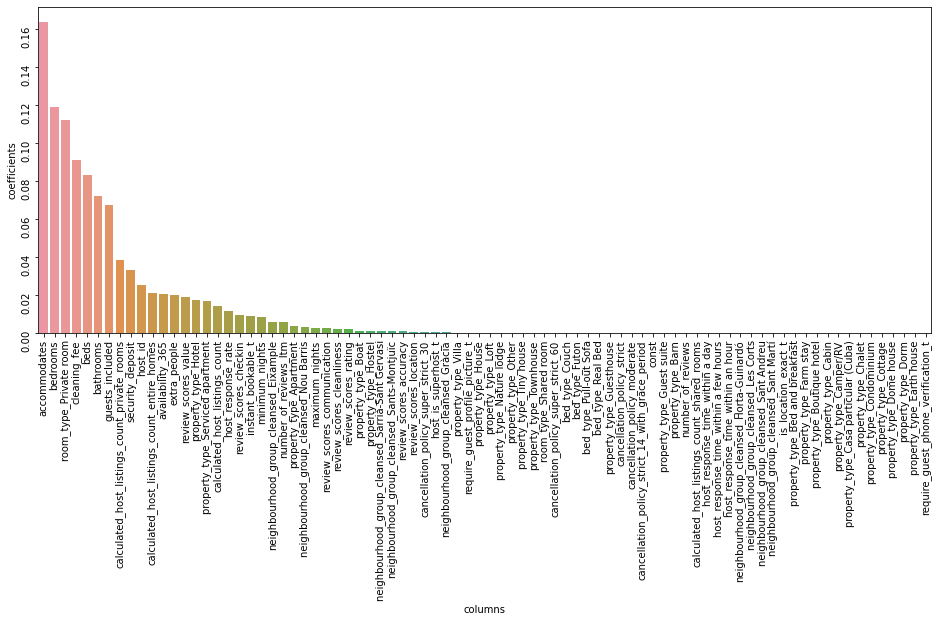

In [749]:
plt.figure(figsize=(16,6))
sns.barplot(x='columns',y='coefficients',data=impf_rf_df)
plt.tick_params(labelrotation=90)
plt.show()

In [103]:
# RMSE SCORES

rmse_rf_best=cross_val_score(RandomForestRegressor(n_estimators=50,max_depth=2,max_features='log2',
                                                      min_samples_leaf=3,min_samples_split=3),X,y,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=10)

In [104]:
print('the rmse scores for Decision Tree regression are : \n',rmse_rf_best)
print('the mean rmse score is  : ',np.mean(rmse_rf_best))
print('the variance of the score is  : ',np.std(rmse_rf_best,ddof=1))

the rmse scores for Decision Tree regression are : 
 [-0.39909446 -0.36059623 -0.47390076 -0.65777048 -0.49445994 -0.87170024
 -0.79201451 -0.55445353 -0.20754399 -0.38765762]
the mean rmse score is  :  -0.5199191758572999
the variance of the score is  :  0.2043420467986879


In [105]:
# RMSE SCORES

rmse_rf=cross_val_score(RandomForestRegressor(),X,y,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=10)

In [106]:
print('the rmse scores for Decision Tree regression are : \n',rmse_rf)
print('the mean rmse score is  : ',np.mean(rmse_rf))
print('the variance of the score is  : ',np.std(rmse_rf,ddof=1))

the rmse scores for Decision Tree regression are : 
 [-0.36488194 -0.28909296 -0.32066848 -0.47312945 -0.26684345 -0.61677949
 -0.61089954 -0.54774145 -0.44746167 -0.40756349]
the mean rmse score is  :  -0.43450618925915385
the variance of the score is  :  0.12763153015605705


Updating scores in Score card

In [108]:
Random_forest_regular=pd.Series({'Model_Name': "Random forest Regressor",
                         'RMSE': -0.43450618925915385,
                         'Bias Error':2.0269457773664756,
                         'Variance Error':4.419881114651205})

Random_forest_with_best_params=pd.Series({'Model_Name': "Random forest Regressor with best params",
                         'RMSE':-0.5199191758572999,
                         'Bias Error':1.1267927406771394,
                         'Variance Error':0.6312733679077159})

score_card_new = score_card_new.append(Random_forest_regular, ignore_index=True)
score_card_new = score_card_new.append(Random_forest_with_best_params, ignore_index=True)
score_card_new

Model_Name      RMSE  Bias Error  \
0                   Multiple Linear Regression -0.504608    2.400925   
1                         Lasso Regularization -0.553371    1.056254   
2        Lasso Regularization with best params -0.553371    1.056254   
3                         Ridge Regularization -0.504431    2.394229   
4        Ridge Regularization with best params -0.504349    2.354034   
5                    ElasticNet Regularization -0.553371    1.056254   
6   ElasticNet Regularization with best params -0.548848    1.052846   
7                      Decision Tree Regressor -0.610507    5.700330   
8     Decision Tree Regressor with best params -0.528314    1.357082   
9                      Random forest Regressor -0.434506    2.026946   
10    Random forest Regressor with best params -0.519919    1.126793   

    Variance Error  
0         4.792548  
1         1.056254  
2         0.064341  
3         4.648064  
4         4.777203  
5         0.064341  
6         1.052846  
7        13.599974  
8         1.064897  
9         4.419881  
10        0.631273

BAGGING REGRESSOR

In [653]:
# doing a cross validation score
bgr=BaggingRegressor()

bgr_cv_scores=cross_val_score(bgr,X,y,scoring='r2',cv=10,n_jobs=-1)

In [654]:
print('the r2 scores from cross_val_score are :\n',bgr_cv_scores)
print('\nThe bias error is :',np.mean(1-bgr_cv_scores))
print('The variance error is : ',np.std(bgr_cv_scores,ddof=1))

the r2 scores from cross_val_score are :
 [ -0.20927406   0.22702469   0.62239159   0.57585856   0.74431884
   0.55448583   0.48943404   0.14726044 -17.16995224  -0.49812438]

The bias error is : 2.4516576686913494
The variance error is :  5.536939633224448


GridSearch

In [681]:
params_bgr = {
            'n_estimators':[3,6,9,12,15,18,25,50],
            'max_samples':[1,2,3],
            'max_features':[1,2,3],
            'bootstrap': ['True','False'],
            'bootstrap_features': ['True','False']}

bgr_gs = GridSearchCV(BaggingRegressor(base_estimator=DecisionTreeRegressor()),params_bgr,scoring='r2',cv=5,n_jobs=-1)

In [682]:
#fitting the data
bgr_gs.fit(X,y)

GridSearchCV(cv=5,
             estimator=BaggingRegressor(base_estimator=DecisionTreeRegressor()),
             n_jobs=-1,
             param_grid={'bootstrap': ['True', 'False'],
                         'bootstrap_features': ['True', 'False'],
                         'max_features': [1, 2, 3], 'max_samples': [1, 2, 3],
                         'n_estimators': [3, 6, 9, 12, 15, 18, 25, 50]},
             scoring='r2')

In [683]:
#getting best params
bgr_gs.best_params_

{'bootstrap': 'False',
 'bootstrap_features': 'True',
 'max_features': 3,
 'max_samples': 3,
 'n_estimators': 15}

In [686]:
#getting scores
bgr_cv_scores_gs=cross_val_score(BaggingRegressor(n_estimators=15,max_features=3,bootstrap_features=True,
                                                      max_samples=3,bootstrap=False),
                                X,y,scoring='r2',cv=10,n_jobs=-1)

In [687]:
print('the r2 scores from cross_val_score are :',bgr_cv_scores_gs)
print('\nThe bias error is :',np.mean(1-bgr_cv_scores_gs))
print('The variance error is : ',np.std(bgr_cv_scores_gs,ddof=1))

the r2 scores from cross_val_score are : [-0.42972739 -0.21473956  0.02298861  0.03734292  0.01560912  0.00956982
  0.08375784  0.14807512 -2.00729353 -0.23236663]

The bias error is : 1.2566783670944595
The variance error is :  0.6399967216356056


In [109]:
rmse_bgr_best=cross_val_score(BaggingRegressor(n_estimators=15,max_features=3,bootstrap_features=True,
                                                      max_samples=3,bootstrap=False),X,y,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=10)

print('the rmse scores for Bagging regression are : \n',rmse_bgr_best)
print('the mean rmse score is  : ',np.mean(rmse_bgr_best))
print('the variance of the score is  : ',np.std(rmse_bgr_best,ddof=1))

the rmse scores for Bagging regression are : 
 [-0.41499082 -0.38646855 -0.50714258 -0.76004512 -0.59570209 -0.97745773
 -0.86604466 -0.59528753 -0.40012122 -0.4089569 ]
the mean rmse score is  :  -0.5912217200587577
the variance of the score is  :  0.2116165826905784


In [110]:
rmse_bgr=cross_val_score(BaggingRegressor(),X,y,scoring='neg_root_mean_squared_error',n_jobs=-1,cv=10)

print('the rmse scores for Bagging regression are : \n',rmse_bgr)
print('the mean rmse score is  : ',np.mean(rmse_bgr))
print('the variance of the score is  : ',np.std(rmse_bgr,ddof=1))

the rmse scores for Bagging regression are : 
 [-0.3857578  -0.3266224  -0.3376229  -0.4975614  -0.2884344  -0.63771244
 -0.60778855 -0.57630877 -0.49419367 -0.4307069 ]
the mean rmse score is  :  -0.458270921735951
the variance of the score is  :  0.12385993289571316


Updating scores in a Score card

In [111]:
Bagging_regressor_regular=pd.Series({'Model_Name': "Bagging Regressor basic",
                         'RMSE': -0.458270921735951,
                         'Bias Error':2.4516576686913494,
                         'Variance Error':5.536939633224448})

Bagging_regressor_with_best_params=pd.Series({'Model_Name': "Bagging Regressor with best params",
                         'RMSE':-0.5912217200587577,
                         'Bias Error':1.2566783670944595,
                         'Variance Error':0.6399967216356056})

score_card_new = score_card_new.append(Bagging_regressor_regular, ignore_index=True)
score_card_new = score_card_new.append(Bagging_regressor_with_best_params, ignore_index=True)
score_card_new

Model_Name      RMSE  Bias Error  \
0                   Multiple Linear Regression -0.504608    2.400925   
1                         Lasso Regularization -0.553371    1.056254   
2        Lasso Regularization with best params -0.553371    1.056254   
3                         Ridge Regularization -0.504431    2.394229   
4        Ridge Regularization with best params -0.504349    2.354034   
5                    ElasticNet Regularization -0.553371    1.056254   
6   ElasticNet Regularization with best params -0.548848    1.052846   
7                      Decision Tree Regressor -0.610507    5.700330   
8     Decision Tree Regressor with best params -0.528314    1.357082   
9                      Random forest Regressor -0.434506    2.026946   
10    Random forest Regressor with best params -0.519919    1.126793   
11                     Bagging Regressor basic -0.458271    2.451658   
12          Bagging Regressor with best params -0.591222    1.256678   

    Variance Error  
0         4.792548  
1         1.056254  
2         0.064341  
3         4.648064  
4         4.777203  
5         0.064341  
6         1.052846  
7        13.599974  
8         1.064897  
9         4.419881  
10        0.631273  
11        5.536940  
12        0.639997

GRADIENT BOOST REGRESSOR

In [698]:
# doing a cross validation score
gbr=GradientBoostingRegressor()

gbr_cv_scores=cross_val_score(gbr,X,y,scoring='r2',cv=10,n_jobs=-1)

In [699]:
print('the r2 scores from cross_val_score are :\n',gbr_cv_scores)
print('\nThe bias error is :',np.mean(1-gbr_cv_scores))
print('The variance error is : ',np.std(gbr_cv_scores,ddof=1))

the r2 scores from cross_val_score are :
 [  0.02694867   0.30473345   0.64754182   0.53038324   0.72345142
   0.46414292   0.40947881   0.23738058 -13.25660534  -0.45825678]

The bias error is : 2.0370801203448767
The variance error is :  4.3069616917374125


GridSearch

In [708]:
params_gbr = {'loss':['ls', 'lad', 'huber', 'quantile'],
            'learning_rate':[0.05,0.1,0.15,0.20],
            'n_estimators':[25,50,75,100],
            'subsample': [0.8,1,1.2],
            'min_samples_split': [1,2,3],
             'min_samples_leaf':[1,2],
             'max_depth':[2,3,4]
}

gbr_gs = GridSearchCV(GradientBoostingRegressor(),params_gbr,scoring='r2',cv=5,n_jobs=-1)

In [709]:
#fitting the data
gbr_gs.fit(X,y)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.1, 0.15, 0.2],
                         'loss': ['ls', 'lad', 'huber', 'quantile'],
                         'max_depth': [2, 3, 4], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [1, 2, 3],
                         'n_estimators': [25, 50, 75, 100],
                         'subsample': [0.8, 1, 1.2]},
             scoring='r2')

In [710]:
#getting best params
gbr_gs.best_params_

{'learning_rate': 0.15,
 'loss': 'lad',
 'max_depth': 4,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 50,
 'subsample': 0.8}

In [711]:
#getting r 2 scores
gbr_cv_scores_gs=cross_val_score(GradientBoostingRegressor(learning_rate=0.15,loss='lad',max_depth=4,min_samples_split=3,
                                                      min_samples_leaf=1,n_estimators=50,subsample=0.8),
                                X,y,scoring='r2',cv=10,n_jobs=-1)

In [716]:
print('the r2 scores from cross_val_score are :\n',gbr_cv_scores_gs)
print('\nThe bias error is :',np.mean(1-gbr_cv_scores_gs))
print('The variance error is : ',np.std(gbr_cv_scores_gs,ddof=1))

the r2 scores from cross_val_score are :
 [ 0.19481452  0.31038396  0.42270031  0.32833849  0.55691826  0.21550869
  0.18004851  0.14851715 -3.38088821 -0.07694171]

The bias error is : 1.1100600012530044
The variance error is :  1.1617535821902663


In [112]:
# Getting rmse value with best params

gbr_cv_scores_gs_rmse_best=cross_val_score(GradientBoostingRegressor(learning_rate=0.15,loss='lad',max_depth=4,min_samples_split=3,
                                                      min_samples_leaf=1,n_estimators=50,subsample=0.8),
                                X,y,scoring='neg_root_mean_squared_error',cv=10,n_jobs=-1)

In [113]:
print('the rmse scores from cross_val_score are :\n',gbr_cv_scores_gs_rmse_best)
print('\nThe mean rmse score is :',np.mean(gbr_cv_scores_gs_rmse_best))
print('The variance in rmse score is : ',np.std(gbr_cv_scores_gs_rmse_best,ddof=1))

the rmse scores from cross_val_score are :
 [-0.34097519 -0.29704597 -0.40042432 -0.60088855 -0.39082509 -0.85911282
 -0.78390461 -0.56096043 -0.25148085 -0.37239051]

The mean rmse score is : -0.4858008327807674
The variance in rmse score is :  0.20757917312239257


In [114]:
# Getting rmse value

gbr_cv_scores_gs_rmse=cross_val_score(GradientBoostingRegressor(),
                                X,y,scoring='neg_root_mean_squared_error',cv=10,n_jobs=-1)

In [115]:
print('the rmse scores from cross_val_score are :\n',gbr_cv_scores_gs_rmse)
print('\nThe mean rmse score is :',np.mean(gbr_cv_scores_gs_rmse))
print('The variance in rmse score is : ',np.std(gbr_cv_scores_gs_rmse,ddof=1))

the rmse scores from cross_val_score are :
 [-0.36394116 -0.29707475 -0.30254975 -0.50070571 -0.30829694 -0.68153421
 -0.66411527 -0.52958393 -0.43119705 -0.43406368]

The mean rmse score is : -0.4513062444100056
The variance in rmse score is :  0.14203370251164849


Updating scores in a score card

In [117]:
Gradientboosting_regular=pd.Series({'Model_Name': "Gradient Boosting Regressor basic",
                         'RMSE': -0.4513062444100056,
                         'Bias Error':2.0370801203448767,
                         'Variance Error':4.3069616917374125})

Gradientboosting_with_best_params=pd.Series({'Model_Name': "Gradient Boosting Regressor with best params",
                         'RMSE':-0.4858008327807674,
                         'Bias Error':1.1100600012530044,
                         'Variance Error':1.1617535821902663})

score_card_new = score_card_new.append(Gradientboosting_regular, ignore_index=True)
score_card_new = score_card_new.append(Gradientboosting_with_best_params, ignore_index=True)
score_card_new

Model_Name      RMSE  Bias Error  \
0                     Multiple Linear Regression -0.504608    2.400925   
1                           Lasso Regularization -0.553371    1.056254   
2          Lasso Regularization with best params -0.553371    1.056254   
3                           Ridge Regularization -0.504431    2.394229   
4          Ridge Regularization with best params -0.504349    2.354034   
5                      ElasticNet Regularization -0.553371    1.056254   
6     ElasticNet Regularization with best params -0.548848    1.052846   
7                        Decision Tree Regressor -0.610507    5.700330   
8       Decision Tree Regressor with best params -0.528314    1.357082   
9                        Random forest Regressor -0.434506    2.026946   
10      Random forest Regressor with best params -0.519919    1.126793   
11                       Bagging Regressor basic -0.458271    2.451658   
12            Bagging Regressor with best params -0.591222    1.256678   
13             Gradient Boosting Regressor basic -0.451306    2.037080   
14  Gradient Boosting Regressor with best params -0.485801    1.110060   

    Variance Error  
0         4.792548  
1         1.056254  
2         0.064341  
3         4.648064  
4         4.777203  
5         0.064341  
6         1.052846  
7        13.599974  
8         1.064897  
9         4.419881  
10        0.631273  
11        5.536940  
12        0.639997  
13        4.306962  
14        1.161754

BUILDING A MODEL WITH BEST FEATURES

LINEAR REGRESSION

In [118]:
sfs_linreg=SequentialFeatureSelector(LinearRegression(),k_features='best',cv=10,n_jobs=-1)
sfs_linreg.fit(X,y)

SequentialFeatureSelector(cv=10, estimator=LinearRegression(),
                          k_features='best', n_jobs=-1)

In [119]:
# Best features
sfs_linreg.k_feature_names_

('security_deposit',
 'neighbourhood_group_cleansed_Nou Barris',
 'neighbourhood_group_cleansed_Sant Andreu',
 'neighbourhood_group_cleansed_Sants-Montjuïc',
 'property_type_Casa particular (Cuba)',
 'property_type_Guesthouse',
 'property_type_Nature lodge')

In [120]:
# creating input feature dataset with best features from sfs
sfs_linreg_X=X[list(sfs_linreg.k_feature_names_)]
y=target

In [121]:
# Cross validation
cvs_linreg_sfs=cross_val_score(LinearRegression(),sfs_linreg_X,y,scoring='r2',cv=10,n_jobs=-1)

In [122]:
print('the r2 scores from cross_val_score are :\n',cvs_linreg_sfs)
print('\nThe bias error is :',np.mean(1-cvs_linreg_sfs))
print('The variance error is : ',np.std(cvs_linreg_sfs,ddof=1))

the r2 scores from cross_val_score are :
 [-0.05570125 -0.14816193 -0.05149382 -0.0003123  -0.01413364 -0.05813613
 -0.00771378  0.01216363 -0.16870951  0.00072867]

The bias error is : 1.0491470058338184
The variance error is :  0.06307180324185117


In [123]:
sfs_best_lnr=X[['security_deposit',
 'neighbourhood_group_cleansed_Nou Barris',
 'neighbourhood_group_cleansed_Sant Andreu',
 'neighbourhood_group_cleansed_Sants-Montjuïc',
 'property_type_Casa particular (Cuba)',
 'property_type_Guesthouse',
 'property_type_Nature lodge']]

In [124]:
# Getting rmse value

sfs_best_lnr_rmse=cross_val_score(LinearRegression(),
                                sfs_best_lnr,y,scoring='neg_root_mean_squared_error',cv=10,n_jobs=-1)

In [125]:
print('the rmse scores are :\n',sfs_best_lnr_rmse)
print('\nThe mean rmse score is :',np.mean(sfs_best_lnr_rmse))
print('The variance in rmse score is : ',np.std(sfs_best_lnr_rmse,ddof=1))

the rmse scores are :
 [-0.37881982 -0.38168142 -0.52257227 -0.73076637 -0.59018115 -0.95782489
 -0.86771506 -0.60277708 -0.1234585  -0.35931732]

The mean rmse score is : -0.5515113902646227
The variance in rmse score is :  0.25407811490647353


Updating scores in a score card

In [126]:
Linreg_regular_with_bestfeatures = pd.Series({'Model_Name': "Linear Regression with best features selection",
                         'RMSE':-0.5515113902646227,
                         'Bias Error':1.0491470058338184,
                         'Variance Error':0.06307180324185117})


score_card_new = score_card_new.append(Linreg_regular_with_bestfeatures, ignore_index=True)
score_card_new

Model_Name      RMSE  Bias Error  \
0                       Multiple Linear Regression -0.504608    2.400925   
1                             Lasso Regularization -0.553371    1.056254   
2            Lasso Regularization with best params -0.553371    1.056254   
3                             Ridge Regularization -0.504431    2.394229   
4            Ridge Regularization with best params -0.504349    2.354034   
5                        ElasticNet Regularization -0.553371    1.056254   
6       ElasticNet Regularization with best params -0.548848    1.052846   
7                          Decision Tree Regressor -0.610507    5.700330   
8         Decision Tree Regressor with best params -0.528314    1.357082   
9                          Random forest Regressor -0.434506    2.026946   
10        Random forest Regressor with best params -0.519919    1.126793   
11                         Bagging Regressor basic -0.458271    2.451658   
12              Bagging Regressor with best params -0.591222    1.256678   
13               Gradient Boosting Regressor basic -0.451306    2.037080   
14    Gradient Boosting Regressor with best params -0.485801    1.110060   
15  Linear Regression with best features selection -0.551511    1.049147   

    Variance Error  
0         4.792548  
1         1.056254  
2         0.064341  
3         4.648064  
4         4.777203  
5         0.064341  
6         1.052846  
7        13.599974  
8         1.064897  
9         4.419881  
10        0.631273  
11        5.536940  
12        0.639997  
13        4.306962  
14        1.161754  
15        0.063072

In [128]:
score_card_new.sort_values(by='RMSE',ascending=True)

Model_Name      RMSE  Bias Error  \
7                          Decision Tree Regressor -0.610507    5.700330   
12              Bagging Regressor with best params -0.591222    1.256678   
1                             Lasso Regularization -0.553371    1.056254   
2            Lasso Regularization with best params -0.553371    1.056254   
5                        ElasticNet Regularization -0.553371    1.056254   
15  Linear Regression with best features selection -0.551511    1.049147   
6       ElasticNet Regularization with best params -0.548848    1.052846   
8         Decision Tree Regressor with best params -0.528314    1.357082   
10        Random forest Regressor with best params -0.519919    1.126793   
0                       Multiple Linear Regression -0.504608    2.400925   
3                             Ridge Regularization -0.504431    2.394229   
4            Ridge Regularization with best params -0.504349    2.354034   
14    Gradient Boosting Regressor with best params -0.485801    1.110060   
11                         Bagging Regressor basic -0.458271    2.451658   
13               Gradient Boosting Regressor basic -0.451306    2.037080   
9                          Random forest Regressor -0.434506    2.026946   

    Variance Error  
7        13.599974  
12        0.639997  
1         1.056254  
2         0.064341  
5         0.064341  
15        0.063072  
6         1.052846  
8         1.064897  
10        0.631273  
0         4.792548  
3         4.648064  
4         4.777203  
14        1.161754  
11        5.536940  
13        4.306962  
9         4.419881

In [129]:
score_card_new['RMSE']=abs(score_card_new['RMSE'])

In [130]:
score_card_new

Model_Name     RMSE  Bias Error  \
0                       Multiple Linear Regression 0.504608    2.400925   
1                             Lasso Regularization 0.553371    1.056254   
2            Lasso Regularization with best params 0.553371    1.056254   
3                             Ridge Regularization 0.504431    2.394229   
4            Ridge Regularization with best params 0.504349    2.354034   
5                        ElasticNet Regularization 0.553371    1.056254   
6       ElasticNet Regularization with best params 0.548848    1.052846   
7                          Decision Tree Regressor 0.610507    5.700330   
8         Decision Tree Regressor with best params 0.528314    1.357082   
9                          Random forest Regressor 0.434506    2.026946   
10        Random forest Regressor with best params 0.519919    1.126793   
11                         Bagging Regressor basic 0.458271    2.451658   
12              Bagging Regressor with best params 0.591222    1.256678   
13               Gradient Boosting Regressor basic 0.451306    2.037080   
14    Gradient Boosting Regressor with best params 0.485801    1.110060   
15  Linear Regression with best features selection 0.551511    1.049147   

    Variance Error  
0         4.792548  
1         1.056254  
2         0.064341  
3         4.648064  
4         4.777203  
5         0.064341  
6         1.052846  
7        13.599974  
8         1.064897  
9         4.419881  
10        0.631273  
11        5.536940  
12        0.639997  
13        4.306962  
14        1.161754  
15        0.063072

In [131]:
score_card_new.sort_values(by='RMSE',ascending=True)

Model_Name     RMSE  Bias Error  \
9                          Random forest Regressor 0.434506    2.026946   
13               Gradient Boosting Regressor basic 0.451306    2.037080   
11                         Bagging Regressor basic 0.458271    2.451658   
14    Gradient Boosting Regressor with best params 0.485801    1.110060   
4            Ridge Regularization with best params 0.504349    2.354034   
3                             Ridge Regularization 0.504431    2.394229   
0                       Multiple Linear Regression 0.504608    2.400925   
10        Random forest Regressor with best params 0.519919    1.126793   
8         Decision Tree Regressor with best params 0.528314    1.357082   
6       ElasticNet Regularization with best params 0.548848    1.052846   
15  Linear Regression with best features selection 0.551511    1.049147   
1                             Lasso Regularization 0.553371    1.056254   
2            Lasso Regularization with best params 0.553371    1.056254   
5                        ElasticNet Regularization 0.553371    1.056254   
12              Bagging Regressor with best params 0.591222    1.256678   
7                          Decision Tree Regressor 0.610507    5.700330   

    Variance Error  
9         4.419881  
13        4.306962  
11        5.536940  
14        1.161754  
4         4.777203  
3         4.648064  
0         4.792548  
10        0.631273  
8         1.064897  
6         1.052846  
15        0.063072  
1         1.056254  
2         0.064341  
5         0.064341  
12        0.639997  
7        13.599974

In [132]:
score_card_new.sort_values(by='Bias Error',ascending=True)

Model_Name     RMSE  Bias Error  \
15  Linear Regression with best features selection 0.551511    1.049147   
6       ElasticNet Regularization with best params 0.548848    1.052846   
1                             Lasso Regularization 0.553371    1.056254   
2            Lasso Regularization with best params 0.553371    1.056254   
5                        ElasticNet Regularization 0.553371    1.056254   
14    Gradient Boosting Regressor with best params 0.485801    1.110060   
10        Random forest Regressor with best params 0.519919    1.126793   
12              Bagging Regressor with best params 0.591222    1.256678   
8         Decision Tree Regressor with best params 0.528314    1.357082   
9                          Random forest Regressor 0.434506    2.026946   
13               Gradient Boosting Regressor basic 0.451306    2.037080   
4            Ridge Regularization with best params 0.504349    2.354034   
3                             Ridge Regularization 0.504431    2.394229   
0                       Multiple Linear Regression 0.504608    2.400925   
11                         Bagging Regressor basic 0.458271    2.451658   
7                          Decision Tree Regressor 0.610507    5.700330   

    Variance Error  
15        0.063072  
6         1.052846  
1         1.056254  
2         0.064341  
5         0.064341  
14        1.161754  
10        0.631273  
12        0.639997  
8         1.064897  
9         4.419881  
13        4.306962  
4         4.777203  
3         4.648064  
0         4.792548  
11        5.536940  
7        13.599974